In [1]:
# good accuracy for 0 and 1
# class balanced
# classification model
# Feature Selection - RFE, DT, RF
# High accyracy, high TPR, low FPR

In [2]:
# change the cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import pandas as pd
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns', None)

In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.style.use('ggplot')

In [5]:
import os
os.getcwd()

'C:\\Users\\Lenovo\\Desktop\\GitHub_projects\\IITR\\Assignements'

# Problem statement

# Data Acquisition

In [6]:
df = pd.read_csv("Attrition-1.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
print("Number of Rows:" , df.shape[0])
print("Number of Columns:" , df.shape[1])

Number of Rows: 1470
Number of Columns: 35


In [9]:
categorical = list(df.select_dtypes(include="object").columns)
print("Categorical features:\n", categorical)
print("\n")
numerical = list(df.select_dtypes (exclude = "object").columns)
print ("Continous features:\n", numerical)

Categorical features:
 ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


Continous features:
 ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [10]:
# Five point Summary of numerical attributes
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [11]:
# Five point Summary of cattegorical attributes
df.describe(include="object").T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


# Data Preparation

## Null Values

In [12]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [13]:
df.isnull().sum()[df.isnull().sum()!=0]

Series([], dtype: int64)

In [14]:
# As we have seen, that there are no Null values in the dataset 

# Univariate Analysis

## Converting Categoric to Numeric

In [15]:
for i in df.describe(include="object"):
    print(" ")
    print("**********",i,"**********")
    print(df[i].value_counts(normalize=True)*100)
    print(" ")

 
********** Attrition **********
No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64
 
 
********** BusinessTravel **********
Travel_Rarely        70.952381
Travel_Frequently    18.843537
Non-Travel           10.204082
Name: BusinessTravel, dtype: float64
 
 
********** Department **********
Research & Development    65.374150
Sales                     30.340136
Human Resources            4.285714
Name: Department, dtype: float64
 
 
********** EducationField **********
Life Sciences       41.224490
Medical             31.564626
Marketing           10.816327
Technical Degree     8.979592
Other                5.578231
Human Resources      1.836735
Name: EducationField, dtype: float64
 
 
********** Gender **********
Male      60.0
Female    40.0
Name: Gender, dtype: float64
 
 
********** JobRole **********
Sales Executive              22.176871
Research Scientist           19.863946
Laboratory Technician        17.619048
Manufacturing Director        9.863946
Healthcare 

In [16]:
# Nominal: Attrition, MaritalStatus, Department, EducationField, Gender, JobRole, Over18, OverTime 
# Ordinal: BusinessTravel

# We will use One Hot Encoding to handle Nominal data, as we dont want to induce order to the data using Label Encoding
# The only feature which is Ordinal is BusinessTravel which we will handle using Label Encoding
# Either Nominal or Ordinal data, we can use replace() to handle dichotomous categorical data

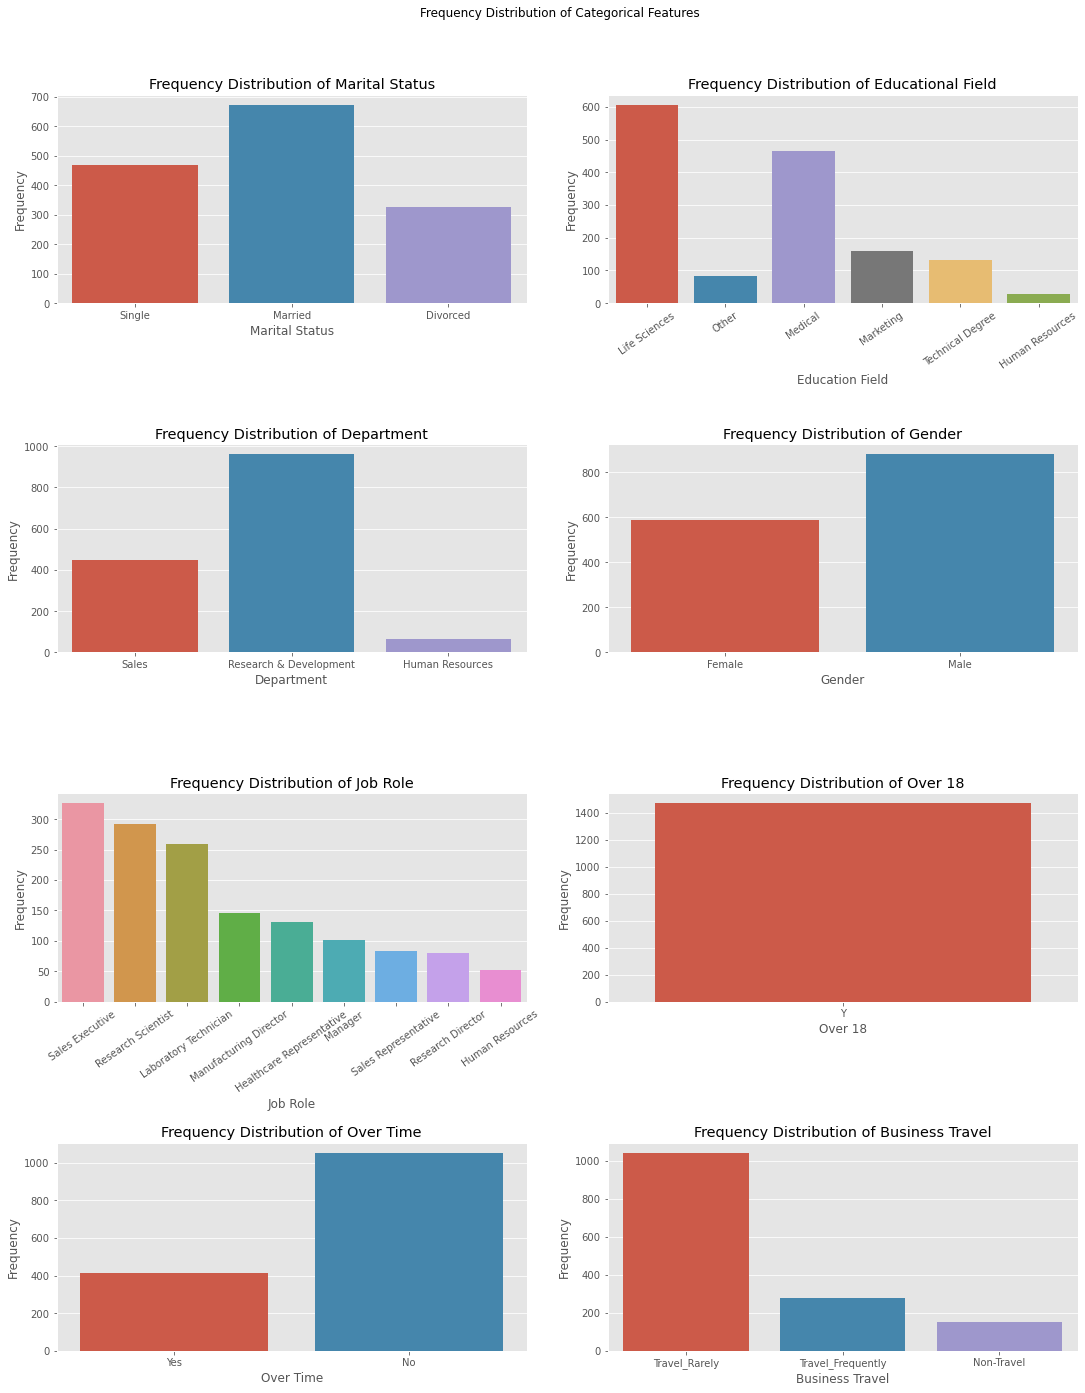

In [17]:
fig, ax= plt.subplots(4,2,figsize=(16,20))

plt.suptitle("Frequency Distribution of Categorical Features")

plt.tight_layout(pad=5, h_pad=12)

sns.countplot(df['MaritalStatus'], ax=ax[0][0])
ax[0][0].set_xlabel('Marital Status')
ax[0][0].set_ylabel('Frequency')
ax[0][0].set_title('Frequency Distribution of Marital Status')

sns.countplot(df['EducationField'], ax=ax[0][1])
ax[0][1].set_xlabel('Education Field')
ax[0][1].set_ylabel('Frequency')
ax[0][1].set_title('Frequency Distribution of Educational Field')
ax[0][1].set_xticklabels(ax[0][1].get_xticklabels(), rotation="35")


sns.countplot(df['Department'], ax=ax[1][0])
ax[1][0].set_xlabel('Department')
ax[1][0].set_ylabel('Frequency',size=12)
ax[1][0].set_title('Frequency Distribution of Department')

sns.countplot(df['Gender'], ax=ax[1][1])
ax[1][1].set_xlabel('Gender')
ax[1][1].set_ylabel('Frequency',size=12)
ax[1][1].set_title('Frequency Distribution of Gender')

sns.countplot(df['JobRole'], ax=ax[2][0])
ax[2][0].set_xlabel('Job Role')
ax[2][0].set_ylabel('Frequency',size=12)
ax[2][0].set_title('Frequency Distribution of Job Role')
ax[2][0].set_xticklabels(ax[2][0].get_xticklabels(), rotation="35")

sns.countplot(df['Over18'], ax=ax[2][1])
ax[2][1].set_xlabel('Over 18')
ax[2][1].set_ylabel('Frequency',size=12)
ax[2][1].set_title('Frequency Distribution of Over 18')

sns.countplot(df['OverTime'], ax=ax[3][0])
ax[3][0].set_xlabel('Over Time')
ax[3][0].set_ylabel('Frequency',size=12)
ax[3][0].set_title('Frequency Distribution of Over Time')

sns.countplot(df['BusinessTravel'], ax=ax[3][1])
ax[3][1].set_xlabel('Business Travel')
ax[3][1].set_ylabel('Frequency',size=12)
ax[3][1].set_title('Frequency Distribution of Business Travel')

plt.show()

Insights from Categoric Predictors:
* Majority of the employees are Married followed by single marital status. 
* Most of the employees are from the Life Sciences and Medical sector and the least number of employees are from the HR department.
* Looks like most of the employees work in the R&D department in the organization followed by Sales. Least number of employees from the HR departemnt in the survey.
* Males are the ones who are in majority.
* The job roles of employees mostly comprise of Sales, research scientist and lab technicians and few people from management.
* All the employees aree above 18 years.
* Most people do not work overtime.
* Most employees travel rarely.

---------- Age ----------


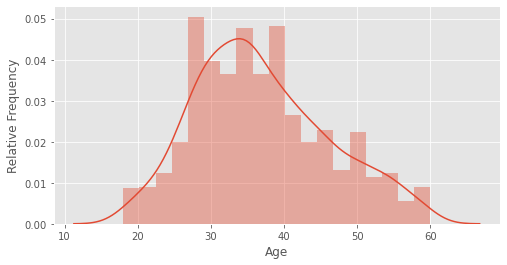

Mean:  36.923809523809524
Median:  36.0

---------- DailyRate ----------


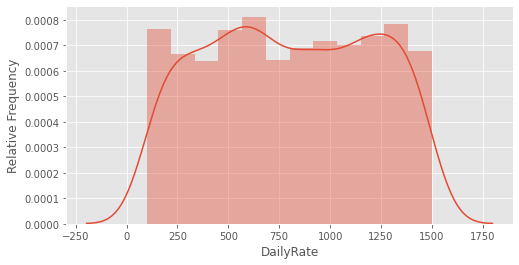

Mean:  802.4857142857143
Median:  802.0

---------- DistanceFromHome ----------


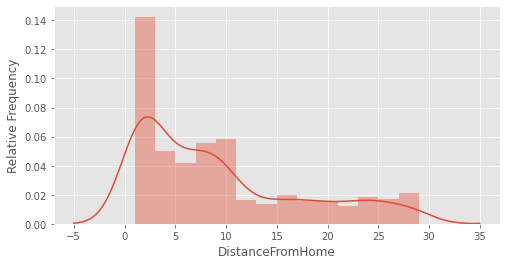

Mean:  9.19251700680272
Median:  7.0

---------- Education ----------


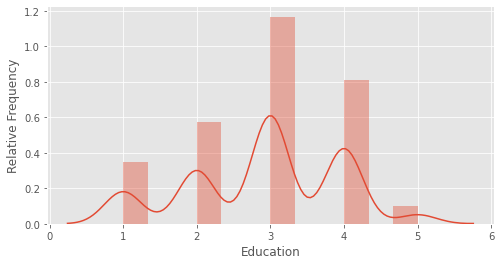

Mean:  2.912925170068027
Median:  3.0

---------- EmployeeCount ----------


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


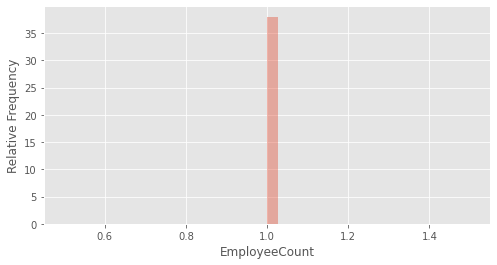

Mean:  1.0
Median:  1.0

---------- EmployeeNumber ----------


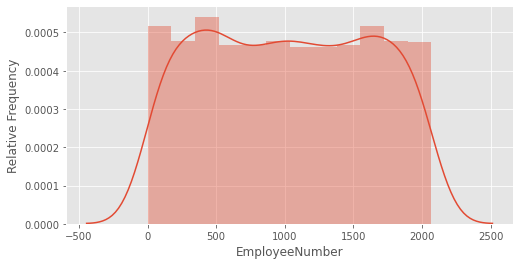

Mean:  1024.865306122449
Median:  1020.5

---------- EnvironmentSatisfaction ----------


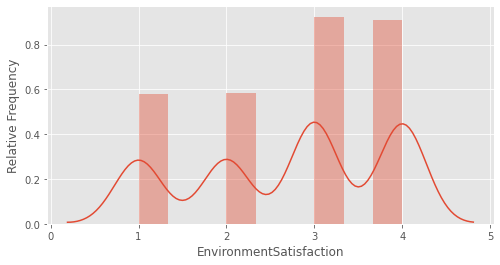

Mean:  2.721768707482993
Median:  3.0

---------- HourlyRate ----------


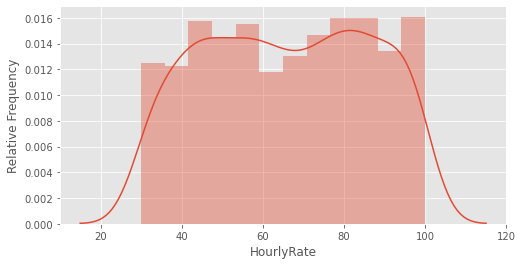

Mean:  65.89115646258503
Median:  66.0

---------- JobInvolvement ----------


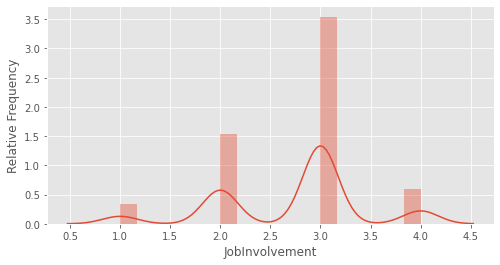

Mean:  2.7299319727891156
Median:  3.0

---------- JobLevel ----------


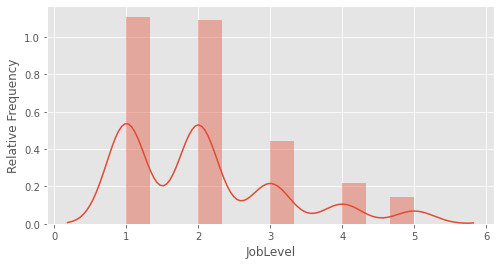

Mean:  2.0639455782312925
Median:  2.0

---------- JobSatisfaction ----------


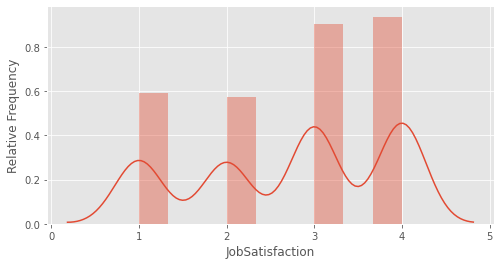

Mean:  2.7285714285714286
Median:  3.0

---------- MonthlyIncome ----------


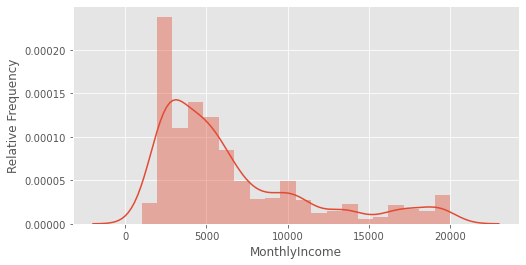

Mean:  6502.931292517007
Median:  4919.0

---------- MonthlyRate ----------


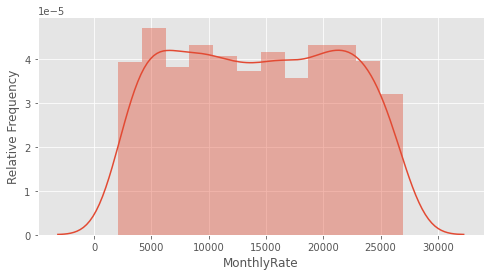

Mean:  14313.103401360544
Median:  14235.5

---------- NumCompaniesWorked ----------


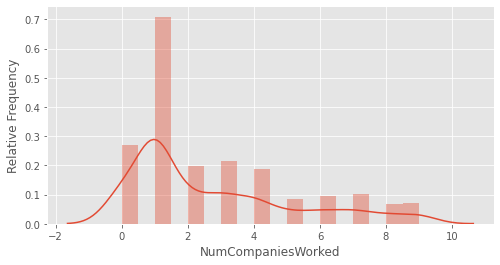

Mean:  2.6931972789115646
Median:  2.0

---------- PercentSalaryHike ----------


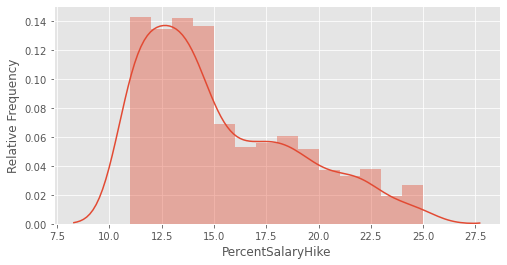

Mean:  15.209523809523809
Median:  14.0

---------- PerformanceRating ----------


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


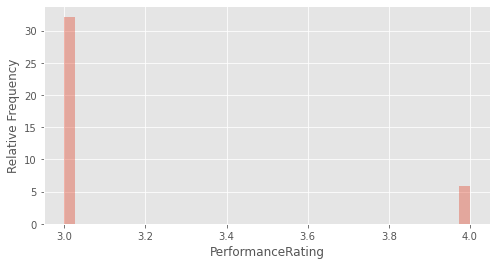

Mean:  3.1537414965986397
Median:  3.0

---------- RelationshipSatisfaction ----------


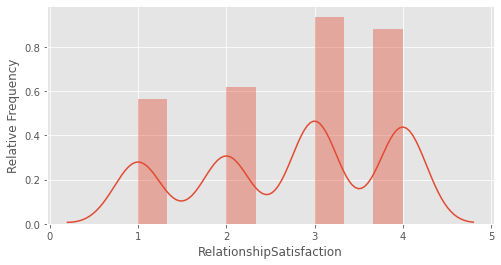

Mean:  2.7122448979591836
Median:  3.0

---------- StandardHours ----------


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


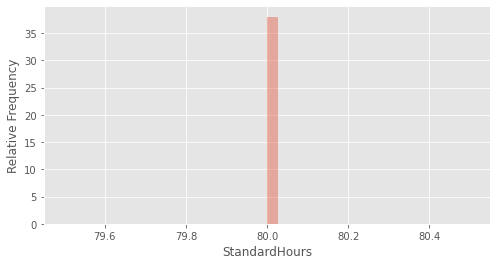

Mean:  80.0
Median:  80.0

---------- StockOptionLevel ----------


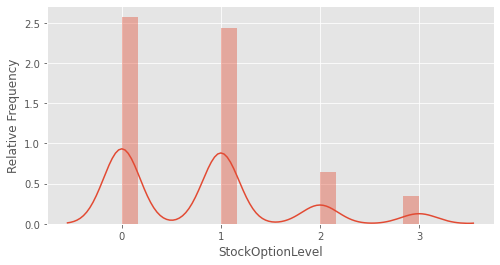

Mean:  0.7938775510204081
Median:  1.0

---------- TotalWorkingYears ----------


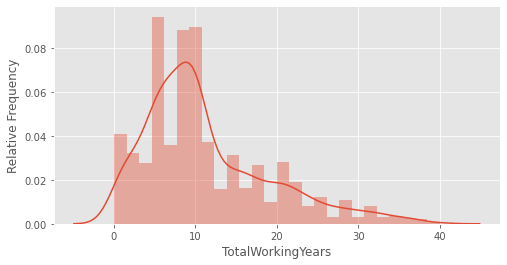

Mean:  11.279591836734694
Median:  10.0

---------- TrainingTimesLastYear ----------


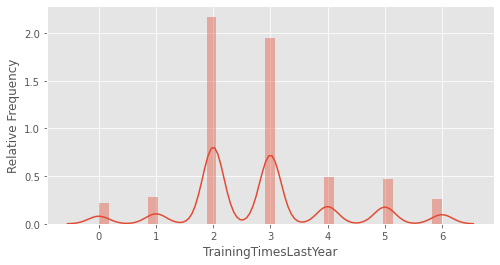

Mean:  2.7993197278911564
Median:  3.0

---------- WorkLifeBalance ----------


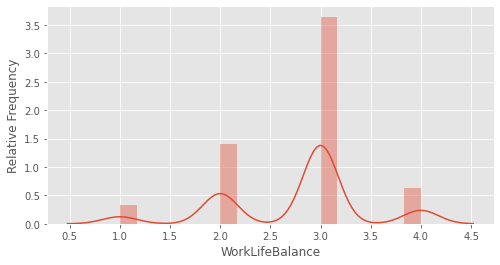

Mean:  2.7612244897959184
Median:  3.0

---------- YearsAtCompany ----------


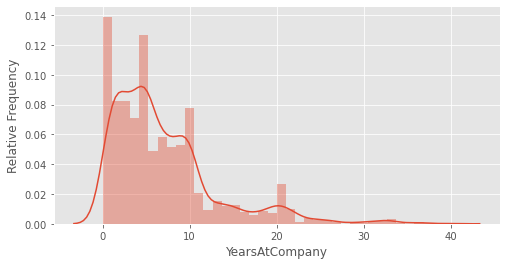

Mean:  7.0081632653061225
Median:  5.0

---------- YearsInCurrentRole ----------


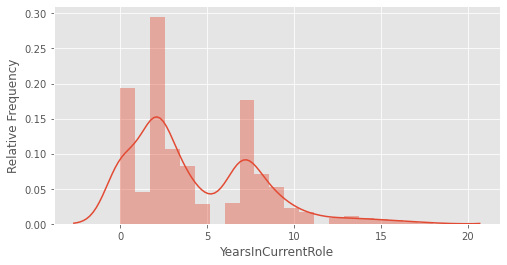

Mean:  4.229251700680272
Median:  3.0

---------- YearsSinceLastPromotion ----------


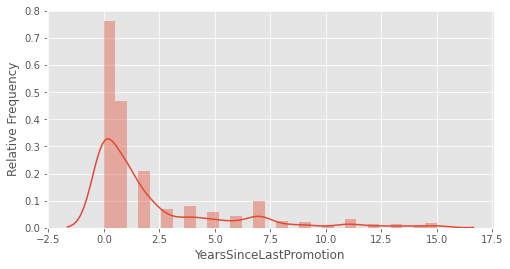

Mean:  2.1877551020408164
Median:  1.0

---------- YearsWithCurrManager ----------


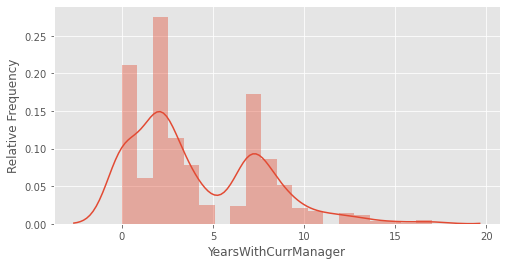

Mean:  4.12312925170068
Median:  3.0



In [18]:
for i in df.describe().columns:
    print("----------",i,"----------")
    plt.figure(figsize=(8, 4))
    sns.distplot(df[i])
    plt.ylabel("Relative Frequency")
    plt.show()
    print("Mean: ", df[i].mean())
    print("Median: ", df[i].median())
    print("")

Insights from Continuous Predictors:
* Most employees are around 36-37 years of age.
* The daily rate follows almost a uniform uniform distribution with mean 802
* Most people travel around 7 km from home but as there are quite a bit of employees traveling far distances, it brings the mean to 9 km. It s highly right-skewed.
* Education is discrete and mean years of experience is 3 years.
* Employee Number seems to be more of a uniform distribution with general count of employees being 1020
* On a 4 point scale generally satisfaction level is 3-4
* Hourly Rate follows a uniform distribution with average hourly rate being 66
* Job Involvement generally seems to be 3 on a 4 point scale which is above average. Most people are involved in their job.
* Job Level is discrete and most people seem to be at 1,2 job levels (they are probably employee who work at lower level roles)
* Job Satisfaction seems seems relatively high with 3-4 being most common on a 4 point scale.
*  General monthly income seems to be around 5000, but considering that there are employees are higher job roles the average income is 6500 rupees.
* Monthly rate also shows a uniform distribution with general figure being 14313.
* Most people have 1 year of work experience. The data being discrete.
* Percentage hike shows a right-skewed distribution, which basically means that most employees get a salary hike of 14% on their previous salary but since the data is highly right-skewed there are quite a few employees getting much higher salary hikes making the average salary hike 15%.
* Most employee have a 3.0 performance rating.
* relationship satisfaction is between 3-4 for most employees on a 4 point scale.
* Standard hours is 80 hrs.
* Stock options of most employees is 0 or 1.
* Most people have total working experience of 11 years, considering the data is right-skewed.
* Training Times Last Year is mostly 2-3.
* Most employees have an above average work life balance (3 out of 4)
* Most employees have around 7 years working in the company. 
* Employees have 3-4 years work experience in a current role before they decide to switch. Data is right-skewed.
* Most employees get a promotion in 1-2 years time.
* Most employees have 3-4 years working with their current manager.

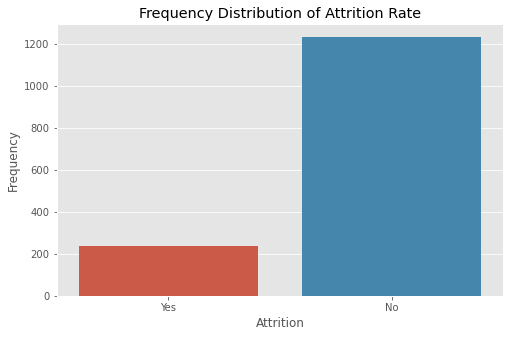

In [19]:
# target variable: Attrition

plt.figure(figsize=(8, 5))
sns.countplot(df["Attrition"])
plt.xlabel("Attrition")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Attrition Rate")
plt.show()

Observations:
* We see that the target variable, Attrition has majority of values of 0 (No Attrition)
* Which means that the class is imbalanced. 
* We need to balance it using class weights / Upsampling: SMOTE, so that we can train our model properly on the target labels so that the model can effetively predict the target labels .

### Ordinal

In [20]:
# We will use replace() rather than LabelEncoder() to handle Ordinal data as we will have more control on the data.
df["BusinessTravel"].replace(to_replace=["Non-Travel", "Travel_Rarely", "Travel_Frequently"], value=[0,1,2], inplace=True)

In [21]:
df["BusinessTravel"].value_counts()

1    1043
2     277
0     150
Name: BusinessTravel, dtype: int64

### Nominal

In [22]:
# We can use the replace() to convert "Y" to 1 in Over18 and for OverTime
df["Over18"].replace({"Y":1}, inplace=True)

In [23]:
df["Over18"].value_counts()

1    1470
Name: Over18, dtype: int64

In [24]:
df["OverTime"].replace({"No":0, "Yes":1}, inplace=True)

In [25]:
df["OverTime"].value_counts()

0    1054
1     416
Name: OverTime, dtype: int64

In [26]:
df["Attrition"].replace({"Yes":1, "No":0}, inplace=True)

In [27]:
df["Attrition"].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [28]:
df["Gender"].replace({"Male":0, "Female":1}, inplace=True)

In [29]:
df["Gender"].value_counts()

0    882
1    588
Name: Gender, dtype: int64

In [30]:
# We are left with Department, EducationField and JobRole, MaritalStatus
# These Nominal Features have multiple levels, so we will use One Hot Encoding to handle them.
# We use drop_first=true to avoid curse of dimensionality.

In [31]:
df1 = pd.get_dummies(data=df, columns=["Department", "EducationField", "MaritalStatus", "JobRole"], drop_first=True)
df1.head(10)

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Married,MaritalStatus_Single,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,41,1,1,1102,1,2,1,1,2,1,94,3,2,4,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,49,0,2,279,8,1,1,2,3,0,61,2,2,2,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,37,1,1,1373,2,2,1,4,4,0,92,2,1,3,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
3,33,0,2,1392,3,4,1,5,4,1,56,3,1,3,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,27,0,1,591,2,1,1,7,1,0,40,3,1,2,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0
5,32,0,2,1005,2,2,1,8,4,0,79,3,1,4,3068,11864,0,1,0,13,3,3,80,0,8,2,2,7,7,3,6,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0
6,59,0,1,1324,3,3,1,10,3,1,81,4,1,1,2670,9964,4,1,1,20,4,1,80,3,12,3,2,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0
7,30,0,1,1358,24,1,1,11,4,0,67,3,1,3,2693,13335,1,1,0,22,4,2,80,1,1,2,3,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8,38,0,2,216,23,3,1,12,4,0,44,2,3,3,9526,8787,0,1,0,21,4,2,80,0,10,2,3,9,7,1,8,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
9,36,0,1,1299,27,3,1,13,3,0,94,3,2,3,5237,16577,6,1,0,13,3,2,80,2,17,3,2,7,7,7,7,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


# Multi-Variate Analysis

In [32]:
# correlation between variables of type "int64" or "float64"
corr = df1.corr()
corr

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Married,MaritalStatus_Single,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
Age,1.000000,-0.159205,-0.011807,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.036311,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,NaN,0.028062,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,0.017883,-0.027549,0.016824,0.038162,-0.006354,-0.041466,-0.027604,0.083919,-0.119185,-0.029856,-0.143176,0.294248,0.049726,0.185891,-0.146518,-0.002001,-0.175785
Attrition,-0.159205,1.000000,0.127006,-0.056652,0.077924,-0.031373,NaN,-0.010577,-0.103369,-0.029453,-0.006846,-0.130016,-0.169105,-0.103481,-0.159840,0.015170,0.043494,NaN,0.246118,-0.013478,0.002889,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199,-0.085293,0.080855,-0.032703,0.055781,-0.046999,-0.017898,0.069355,-0.090984,0.175419,0.036215,0.098290,-0.083316,-0.082994,-0.088870,-0.000360,0.019774,0.157234
BusinessTravel,-0.011807,0.127006,1.000000,-0.015539,-0.009696,-0.008670,NaN,-0.018538,-0.011310,0.044896,-0.004164,0.029300,-0.011696,0.008666,-0.013450,-0.008440,-0.030743,NaN,0.042752,-0.025727,0.001683,0.008926,NaN,-0.028257,0.007972,0.016357,0.004209,0.005212,-0.005336,0.005222,-0.000229,0.005308,-0.004261,0.019860,0.005201,-0.011245,-0.000470,-0.019699,0.002198,0.023017,0.010435,0.002094,-0.039312,0.014893,-0.005138,0.002477,-0.025131,0.059995
DailyRate,0.010661,-0.056652,-0.015539,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.011716,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,NaN,0.009135,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,0.014871,-0.003616,0.004028,-0.064449,0.034202,-0.003893,0.030869,0.040035,-0.075835,-0.021156,-0.006728,-0.013224,-0.005302,-0.000021,-0.002624,-0.000513,0.005375
DistanceFromHome,-0.001686,0.077924,-0.009696,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.001851,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,NaN,0.025514,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,-0.008117,0.014085,-0.024499,0.039294,0.013486,-0.007969,-0.014802,0.030232,-0.027445,-0.024089,0.012369,-0.039190,0.011848,-0.022351,-0.010986,0.030761,-0.015994
Education,0.208034,-0.031373,-0.008670,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016547,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,NaN,-0.020322,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,-0.018604,0.014215,0.013184,0.072405,-0.072335,0.038043,-0.026742,-0.001865,0.004168,-0.005295,-0.063566,0.028453,-0.005290,0.049694,0.000709,0.053398,-0.091465
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.018538,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,-0.022556,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,NaN,-0.024037,-0.012944,-0.0

In [33]:
# np.zeros_like() returns an array of zeros with the same shape and type as the given array. By passing in the correlation matrix, we get an array of zeros
# The dtype=np.bool parameter overrides the data type, so our array is an array of booleans.
mask = np.zeros_like(corr, dtype=np.bool)
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [34]:
# np.triu_indices_from(mask) returns the indices for the upper triangle of the array.
# we set the upper values of the triangle to True
mask[np.triu_indices_from(mask)]= True
mask[np.triu_indices_from(mask)]

array([ True,  True,  True, ...,  True,  True,  True])

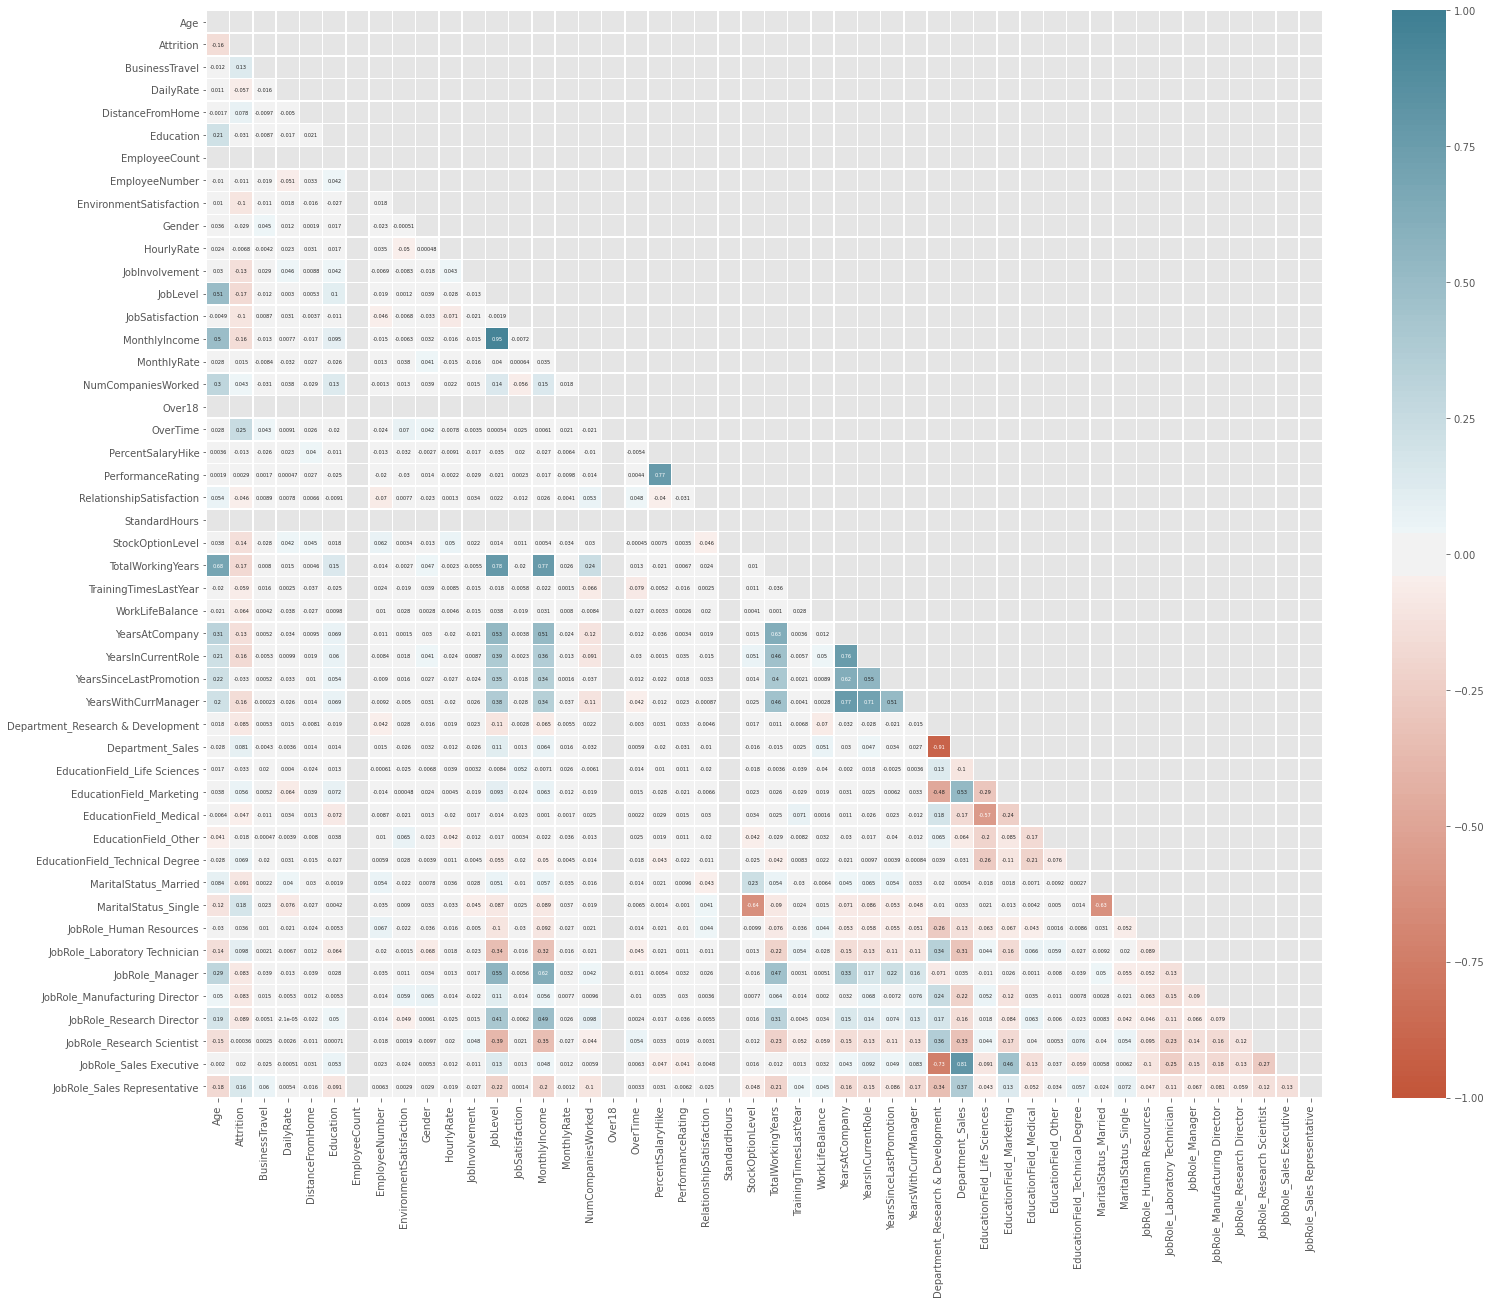

In [35]:
plt.figure(figsize=(25,20))
ax = sns.heatmap(corr,
                      mask = mask,
                      #square = True,
                      linewidths = .5,
                      #cmap = 'coolwarm',
                      cmap=sns.diverging_palette(20, 220, n=200),
                      #cbar_kws = {'shrink': .4,'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 5})
ax.set_xticklabels(ax.get_xticklabels());
ax.set_yticklabels(ax.get_yticklabels());

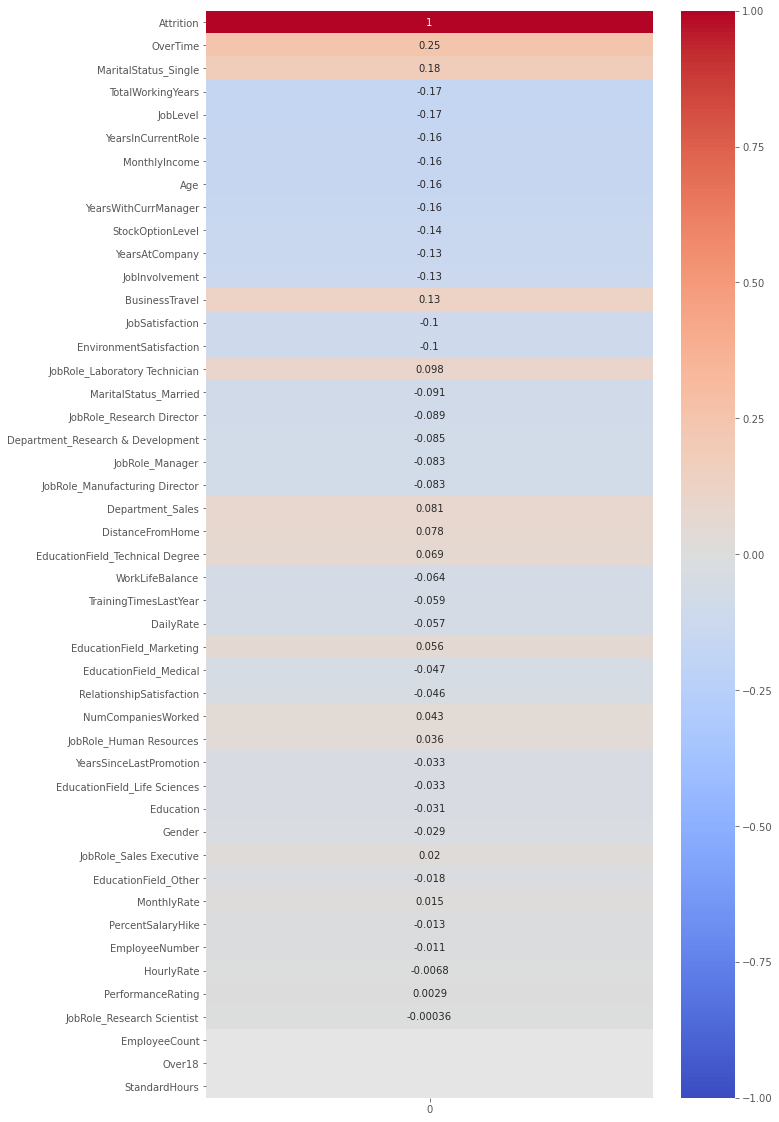

In [36]:
correlations = df1.corrwith(df1['Attrition']).iloc[:-1].to_frame()
correlations['abs'] = correlations[0].abs()    # return absolute value of a number
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]
fig, ax = plt.subplots(figsize=(10,20))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);

# Outliers

-------------------- Age --------------------


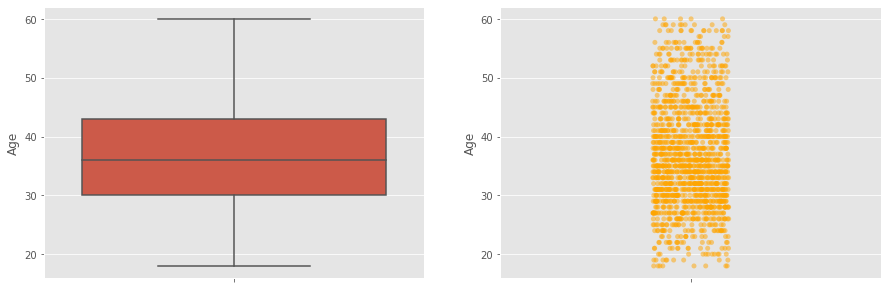


-------------------- Attrition --------------------


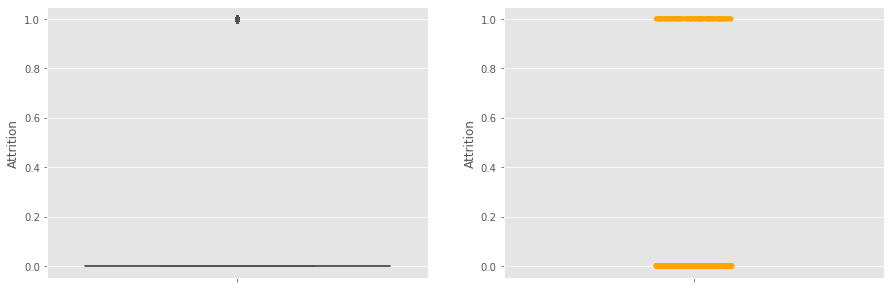


-------------------- BusinessTravel --------------------


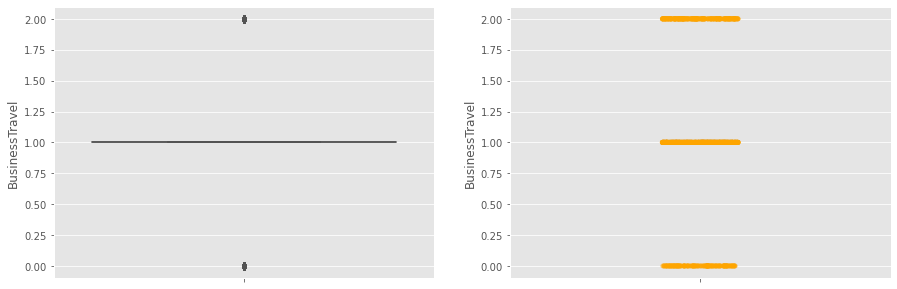


-------------------- DailyRate --------------------


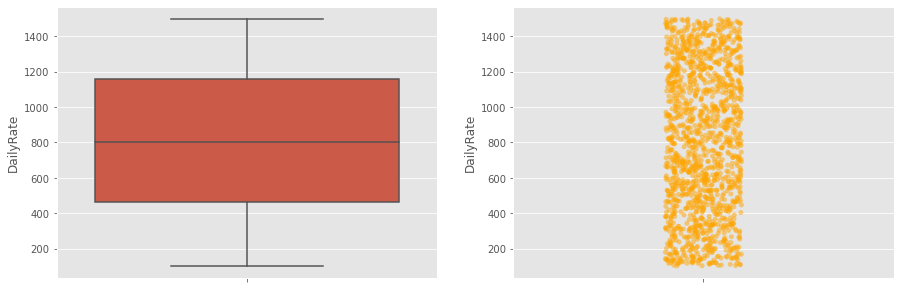


-------------------- DistanceFromHome --------------------


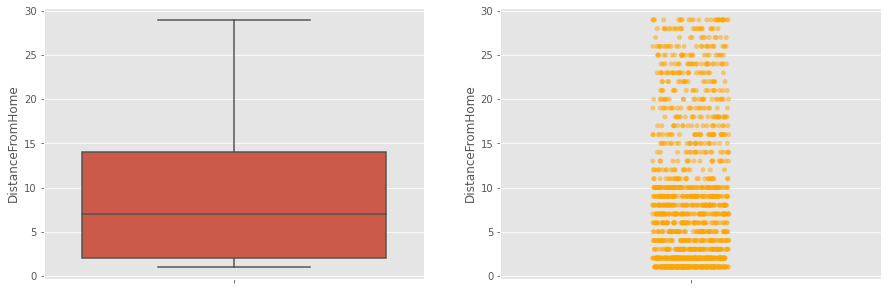


-------------------- Education --------------------


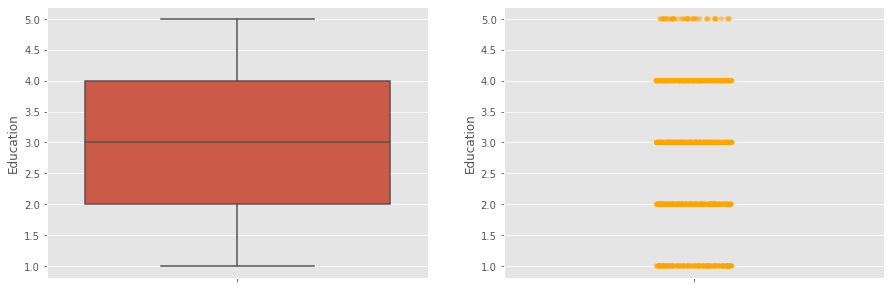


-------------------- EmployeeCount --------------------


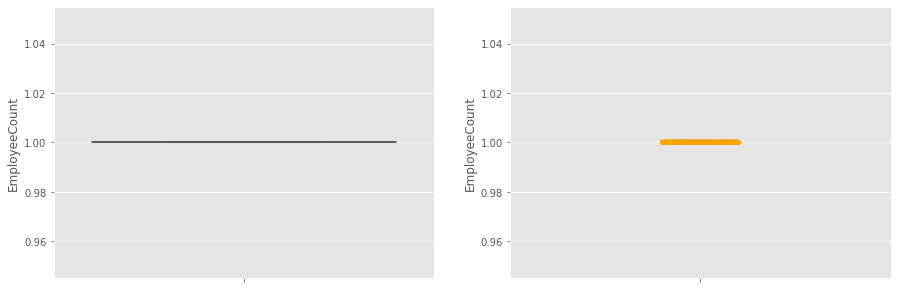


-------------------- EmployeeNumber --------------------


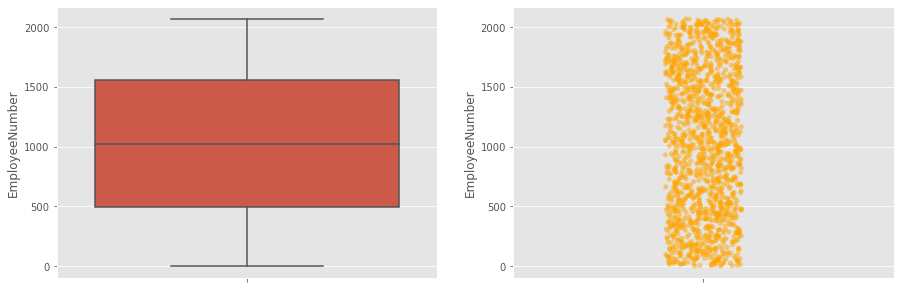


-------------------- EnvironmentSatisfaction --------------------


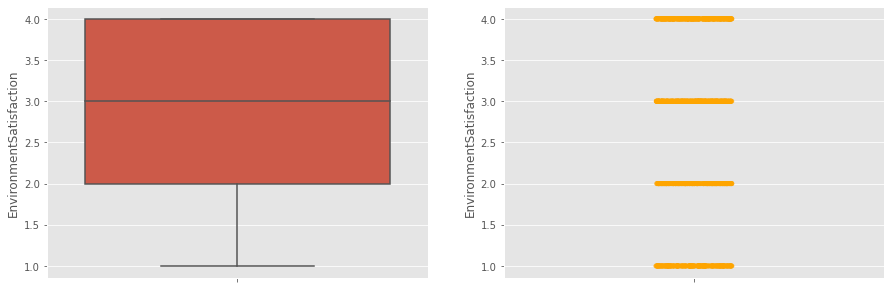


-------------------- Gender --------------------


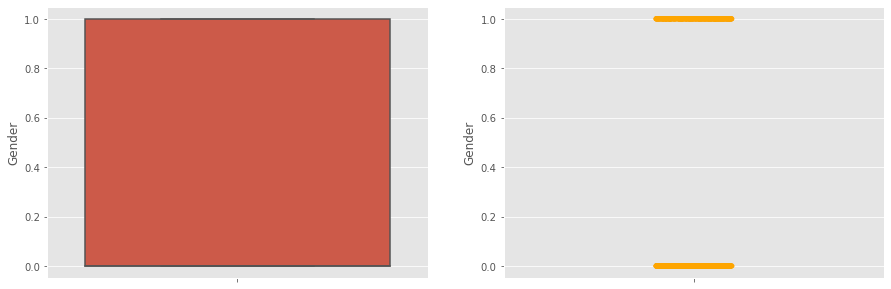


-------------------- HourlyRate --------------------


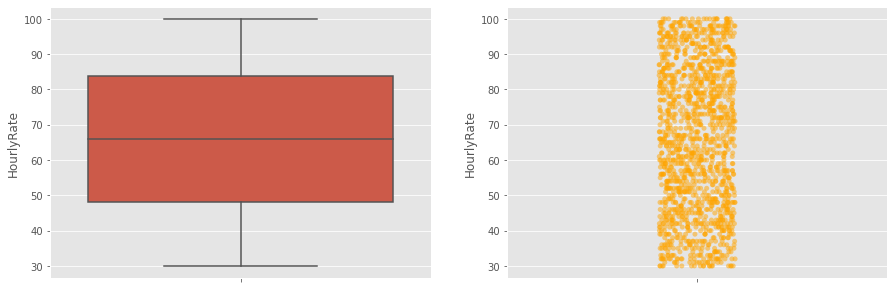


-------------------- JobInvolvement --------------------


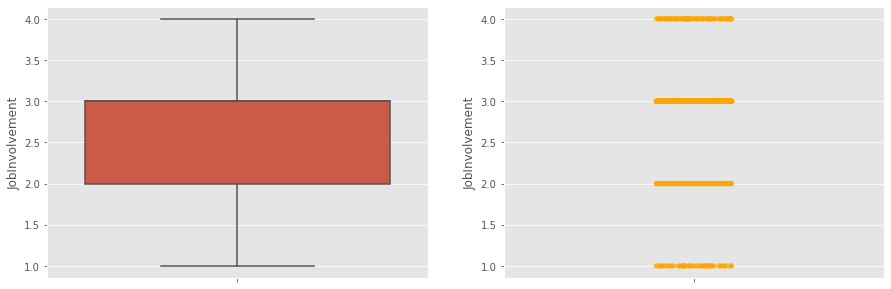


-------------------- JobLevel --------------------


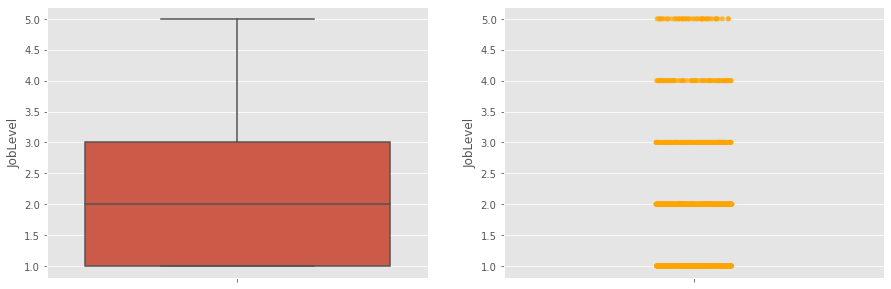


-------------------- JobSatisfaction --------------------


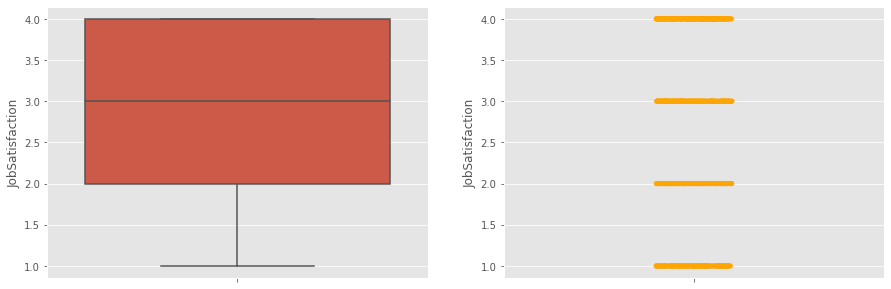


-------------------- MonthlyIncome --------------------


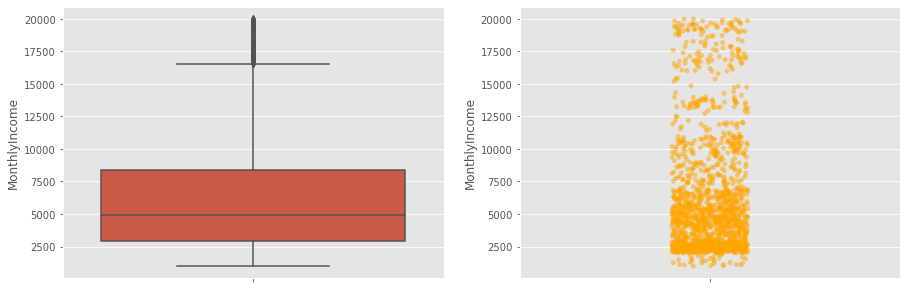


-------------------- MonthlyRate --------------------


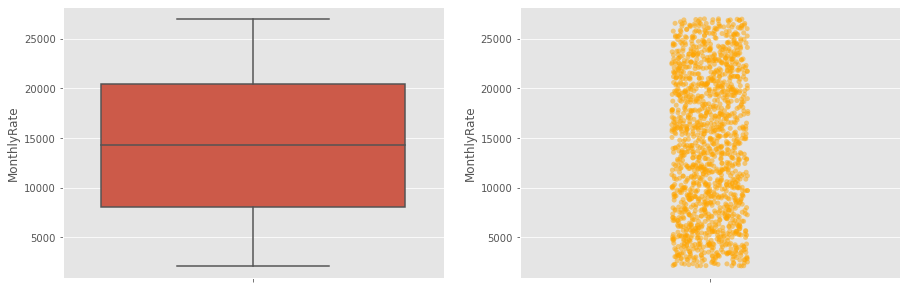


-------------------- NumCompaniesWorked --------------------


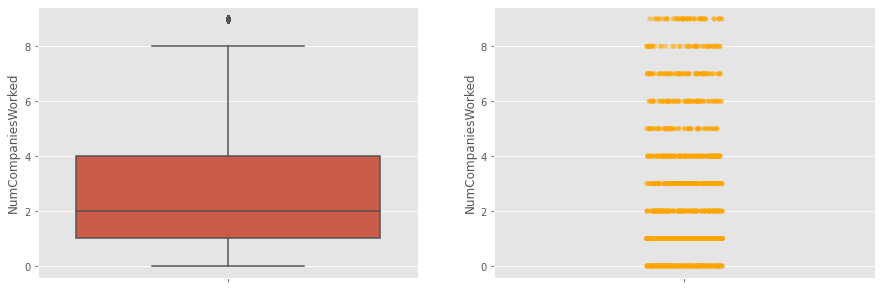


-------------------- Over18 --------------------


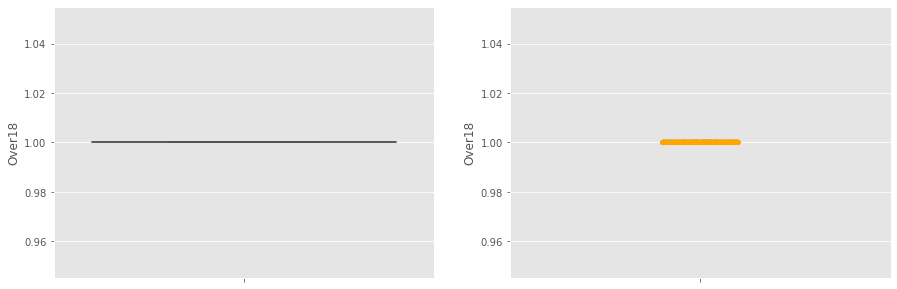


-------------------- OverTime --------------------


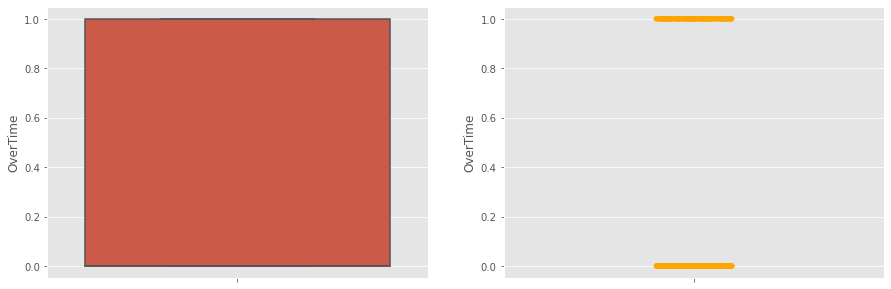


-------------------- PercentSalaryHike --------------------


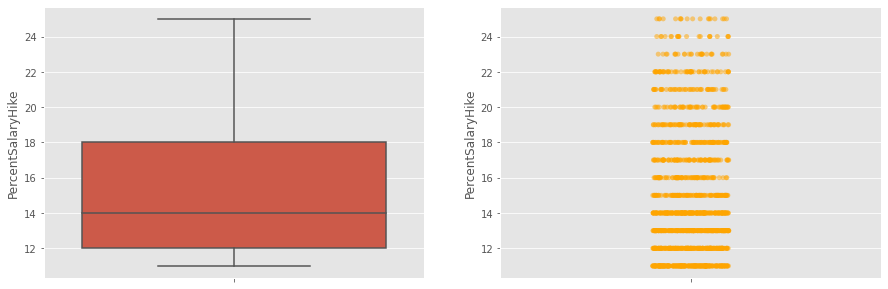


-------------------- PerformanceRating --------------------


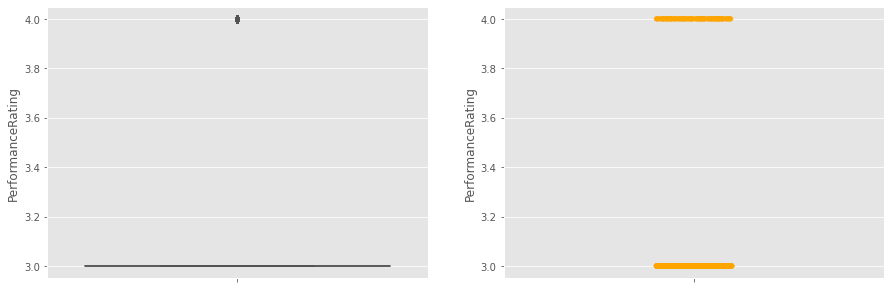


-------------------- RelationshipSatisfaction --------------------


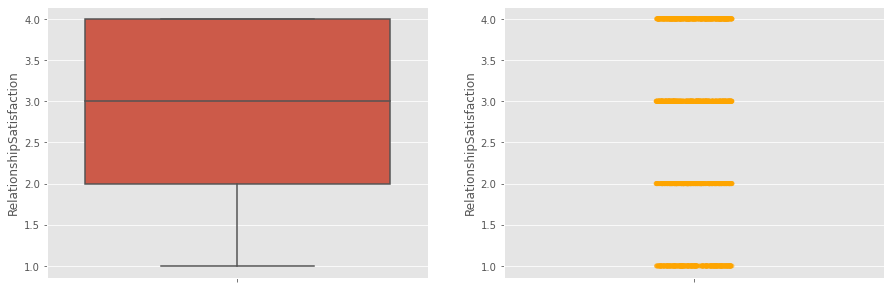


-------------------- StandardHours --------------------


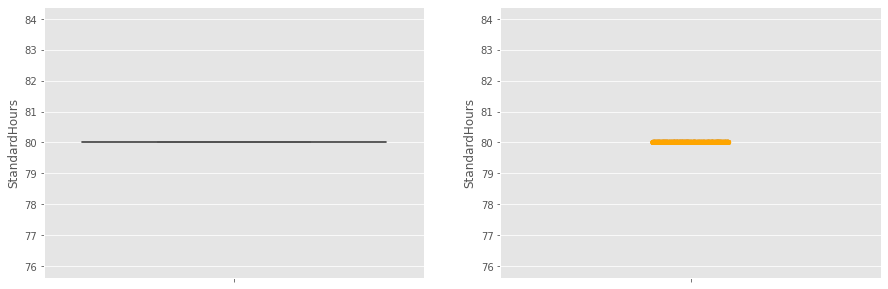


-------------------- StockOptionLevel --------------------


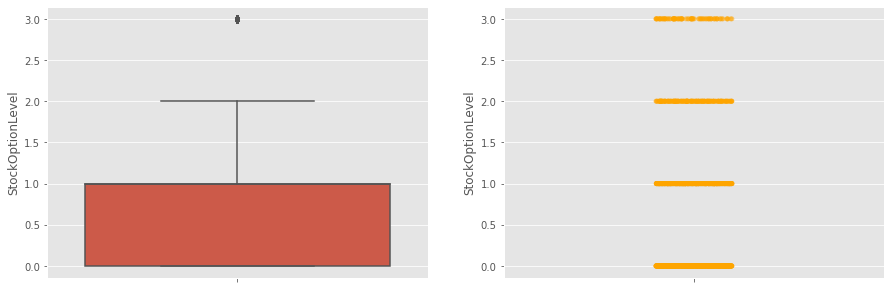


-------------------- TotalWorkingYears --------------------


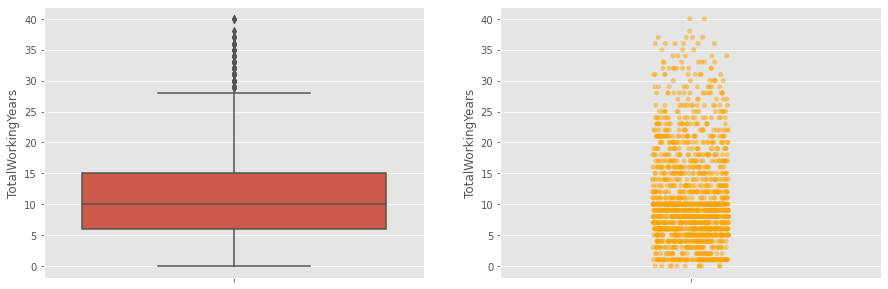


-------------------- TrainingTimesLastYear --------------------


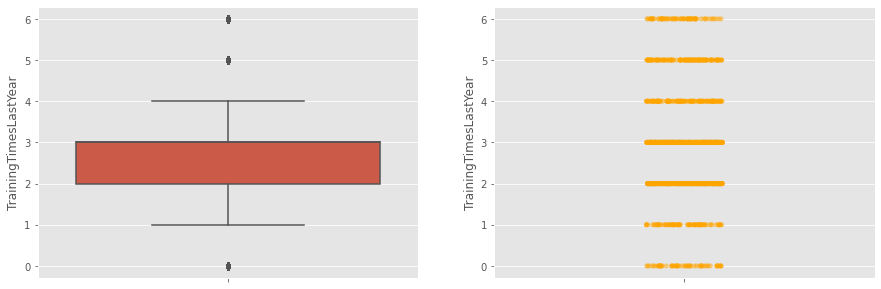


-------------------- WorkLifeBalance --------------------


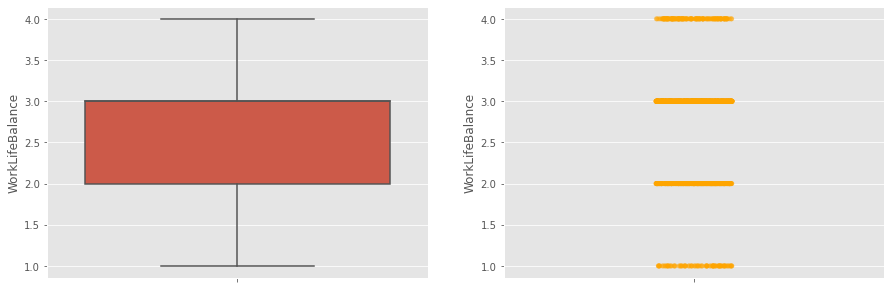


-------------------- YearsAtCompany --------------------


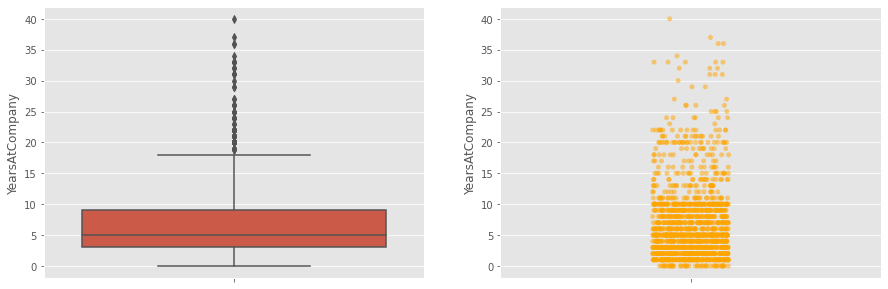


-------------------- YearsInCurrentRole --------------------


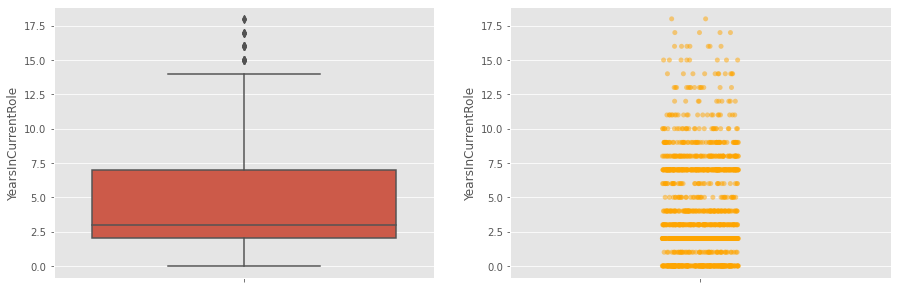


-------------------- YearsSinceLastPromotion --------------------


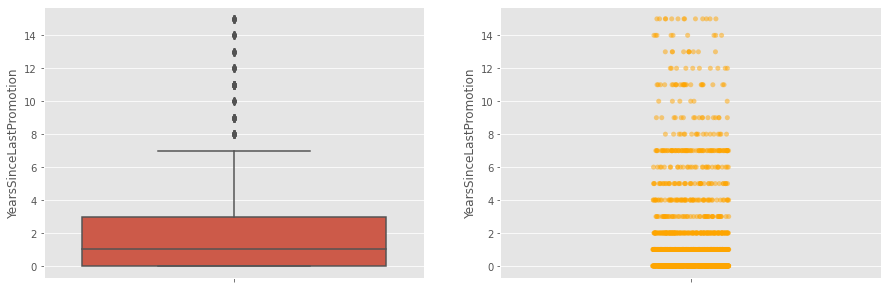


-------------------- YearsWithCurrManager --------------------


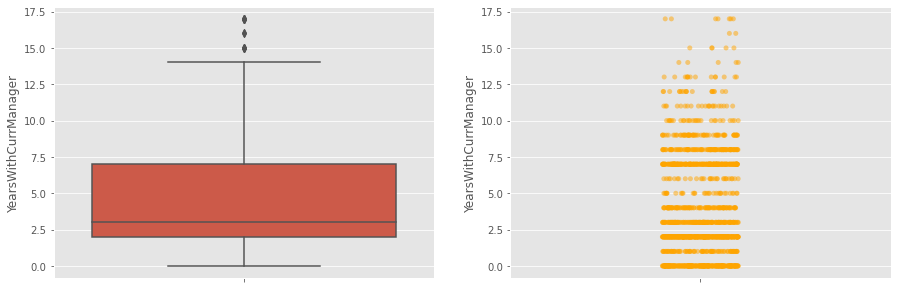


-------------------- Department_Research & Development --------------------


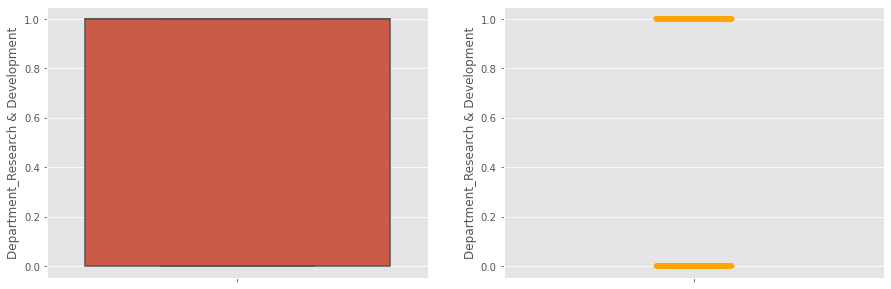


-------------------- Department_Sales --------------------


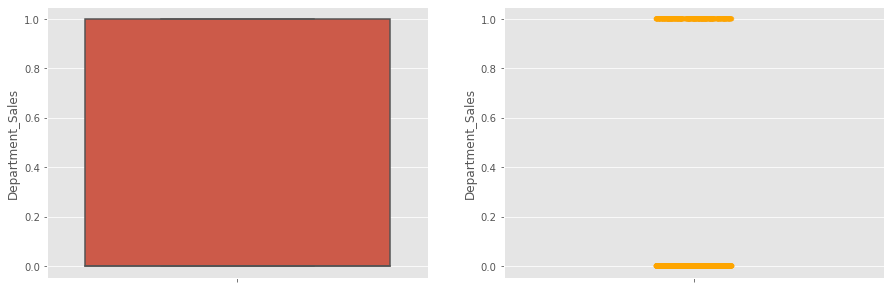


-------------------- EducationField_Life Sciences --------------------


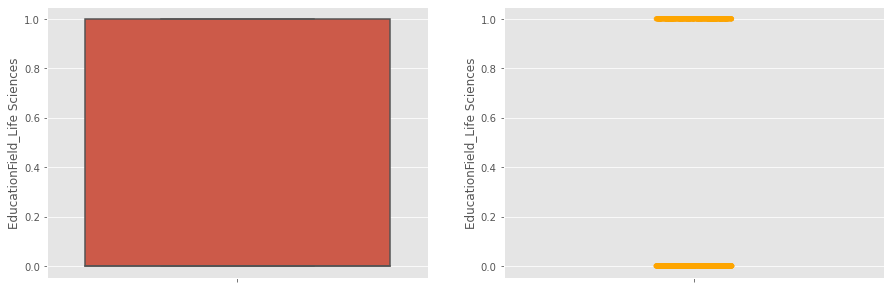


-------------------- EducationField_Marketing --------------------


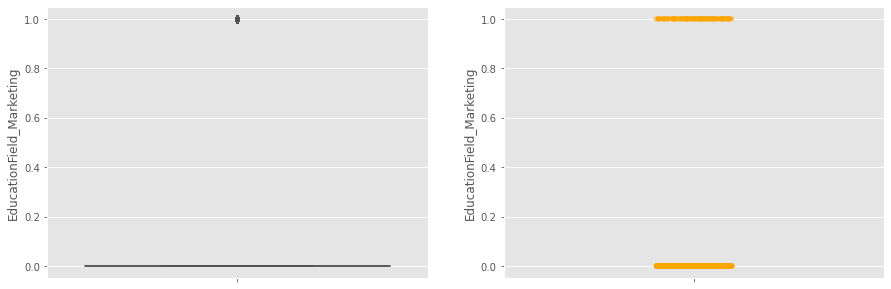


-------------------- EducationField_Medical --------------------


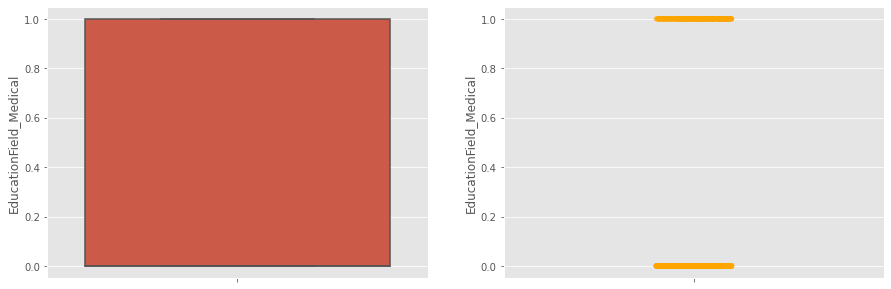


-------------------- EducationField_Other --------------------


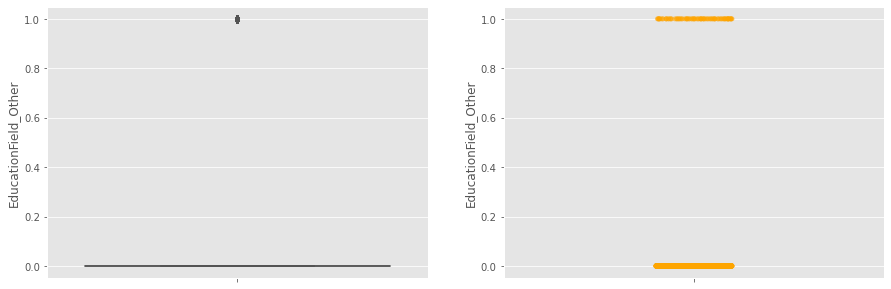


-------------------- EducationField_Technical Degree --------------------


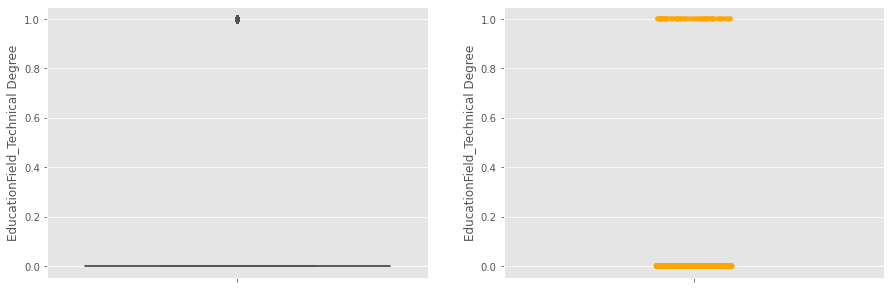


-------------------- MaritalStatus_Married --------------------


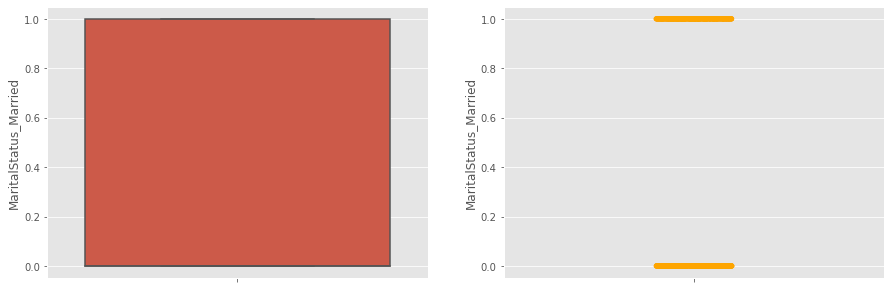


-------------------- MaritalStatus_Single --------------------


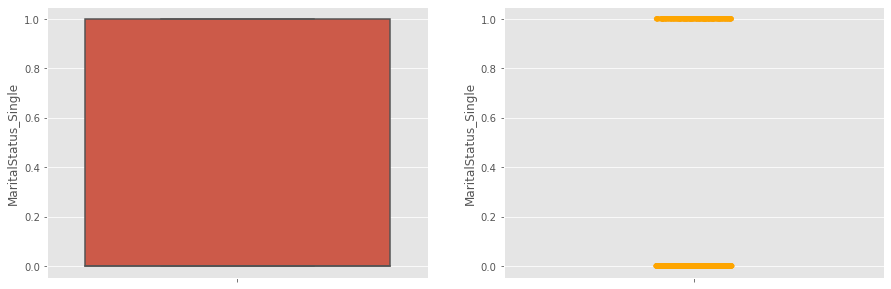


-------------------- JobRole_Human Resources --------------------


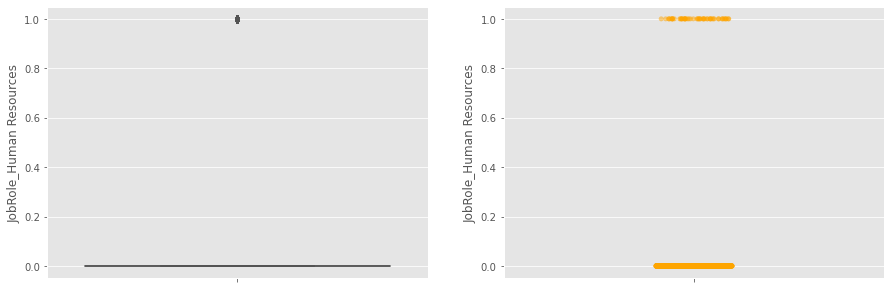


-------------------- JobRole_Laboratory Technician --------------------


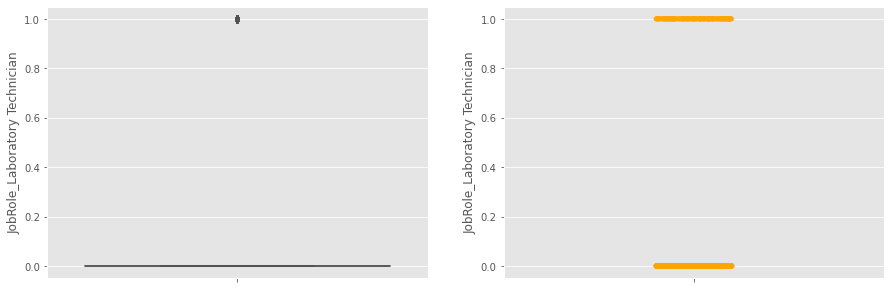


-------------------- JobRole_Manager --------------------


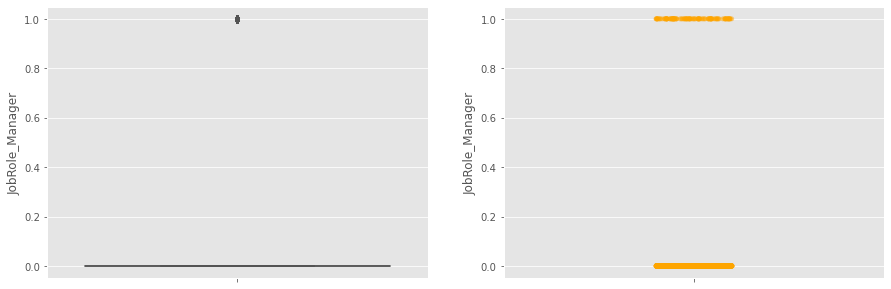


-------------------- JobRole_Manufacturing Director --------------------


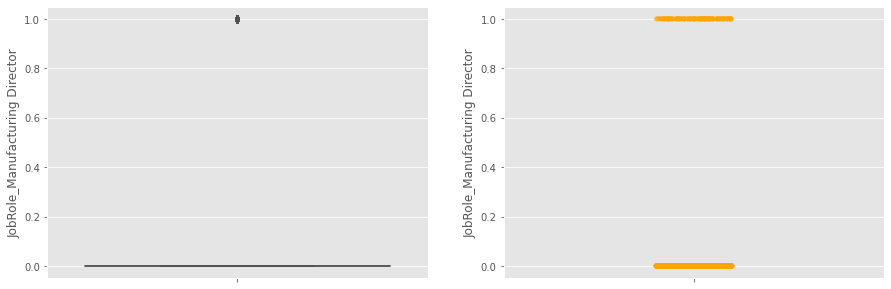


-------------------- JobRole_Research Director --------------------


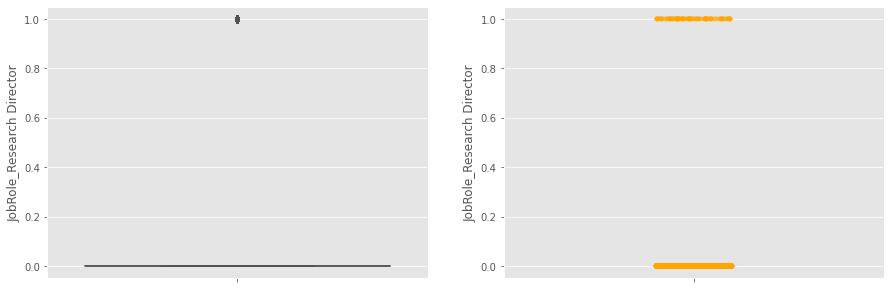


-------------------- JobRole_Research Scientist --------------------


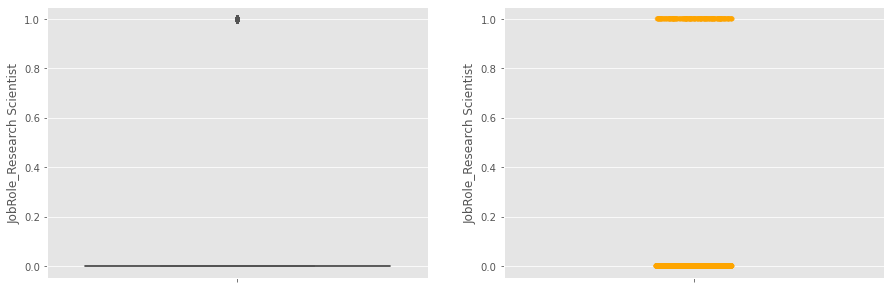


-------------------- JobRole_Sales Executive --------------------


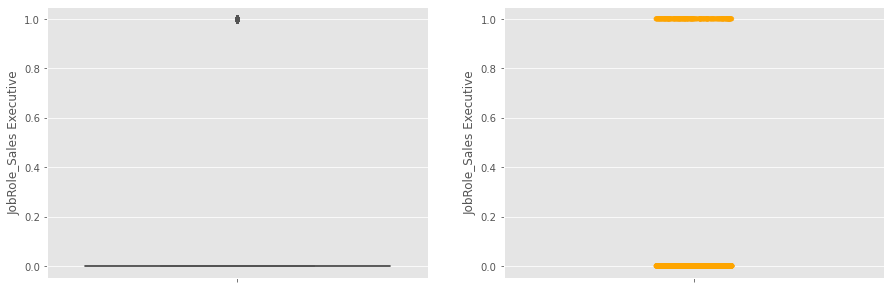


-------------------- JobRole_Sales Representative --------------------


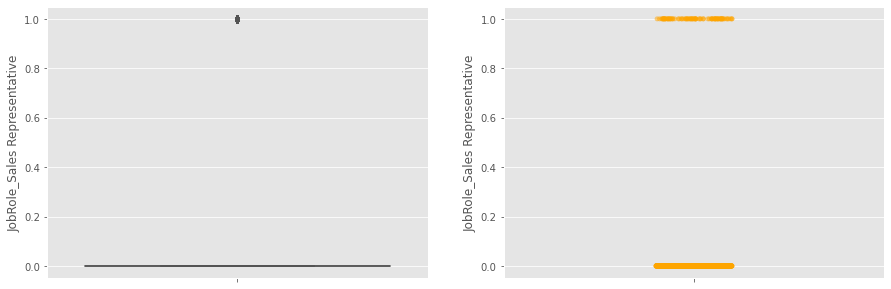

In [37]:
# show 2 graphs at the same time using subplots

for column in df1.corr().columns:
    print("--------------------",column,"--------------------")
    fig, axes = plt.subplots(1,2, figsize=(15,5))
    sns.boxplot(y=column, data=df1, ax=axes[0])
    sns.stripplot(y=column, data=df1, jitter=True, dodge=True, marker='o', alpha=0.5, color="orange", ax=axes[1])
    plt.show()
    print("")

In [38]:
df_i = df1.copy()
df_i.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Married,MaritalStatus_Single,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,41,1,1,1102,1,2,1,1,2,1,94,3,2,4,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,49,0,2,279,8,1,1,2,3,0,61,2,2,2,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,37,1,1,1373,2,2,1,4,4,0,92,2,1,3,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
3,33,0,2,1392,3,4,1,5,4,1,56,3,1,3,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,27,0,1,591,2,1,1,7,1,0,40,3,1,2,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0


In [39]:
df_i.shape

(1470, 48)

In [40]:
# Inter-Quartile range for each column
Q1 = df_i.quantile(0.25)
Q3 = df_i.quantile(0.75)
IQR = Q3 - Q1
lower_range = Q1 - (1.5 * IQR)
upper_range = Q3 + (1.5 * IQR)
print(IQR)

Age                                     13.00
Attrition                                0.00
BusinessTravel                           0.00
DailyRate                              692.00
DistanceFromHome                        12.00
Education                                2.00
EmployeeCount                            0.00
EmployeeNumber                        1064.50
EnvironmentSatisfaction                  2.00
Gender                                   1.00
HourlyRate                              35.75
JobInvolvement                           1.00
JobLevel                                 2.00
JobSatisfaction                          2.00
MonthlyIncome                         5468.00
MonthlyRate                          12414.50
NumCompaniesWorked                       3.00
Over18                                   0.00
OverTime                                 1.00
PercentSalaryHike                        6.00
PerformanceRating                        0.00
RelationshipSatisfaction          

In [41]:
# The columns having non 0, 1 columns are the continuous columns which need to be considered for outlier detection.

In [42]:
Q1 = df_i.quantile(0.25)
Q3 = df_i.quantile(0.75)
IQR = Q3 - Q1
lower_range = Q1 - (1.5 * IQR)
upper_range = Q3 + (1.5 * IQR)
df_i = df_i[~((df_i < lower_range) | (df_i > upper_range)).any(axis=1)]
df_i.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Married,MaritalStatus_Single,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
9,36,0,1,1299,27,3,1,13,3,0,94,3,2,3,5237,16577,6,1,0,13,3,2,80,2,17,3,2,7,7,7,7,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
163,57,0,1,334,24,2,1,223,3,0,83,4,3,4,9439,23402,3,1,1,16,3,2,80,1,12,2,1,5,3,1,4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
209,46,0,1,644,1,4,1,288,4,0,97,3,3,1,9396,12368,7,1,0,16,3,3,80,1,17,3,3,4,2,0,3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
302,28,0,1,1476,16,2,1,412,2,0,68,4,2,1,5661,4824,0,1,0,19,3,3,80,0,9,2,3,8,3,0,7,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
333,43,0,1,1001,7,3,1,451,3,1,43,3,3,1,9985,9262,8,1,0,16,3,1,80,1,10,1,2,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [43]:
df_i.shape

(41, 48)

In [44]:
# We see that most of our data is removed, hence we wont remove the outliers, as they might be important.

# Sampling (Train and Test)

In [45]:
import scipy.stats as stats
from scipy.stats import zscore
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, binarize, MinMaxScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV, KFold, cross_val_score, GridSearchCV, StratifiedKFold, cross_val_predict
from sklearn.metrics import roc_curve,roc_auc_score, accuracy_score, cohen_kappa_score, jaccard_score, confusion_matrix, plot_confusion_matrix, precision_score, recall_score, classification_report, f1_score
from scipy.stats import shapiro , levene , mannwhitneyu , chi2_contingency , chisquare, f_oneway
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC

from warnings import filterwarnings
filterwarnings('ignore')

In [46]:
X = df1.drop("Attrition", axis=1)
y = df1["Attrition"]

In [47]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()#instantiate
X_scaled = scaler.fit_transform(X)
X_scaled_df1 = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df1.head()

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Married,MaritalStatus_Single,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,0.547619,0.5,0.715820,0.000000,0.25,0.0,0.000000,0.333333,1.0,0.914286,0.666667,0.25,1.000000,0.262454,0.698053,0.888889,0.0,1.0,0.000000,0.0,0.000000,0.0,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.738095,1.0,0.126700,0.250000,0.00,0.0,0.000484,0.666667,0.0,0.442857,0.333333,0.25,0.333333,0.217009,0.916001,0.111111,0.0,0.0,0.857143,1.0,1.000000,0.0,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.452381,0.5,0.909807,0.035714,0.25,0.0,0.001451,1.000000,0.0,0.885714,0.333333,0.00,0.666667,0.056925,0.012126,0.666667,0.0,1.0,0.285714,0.0,0.333333,0.0,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.357143,1.0,0.923407,0.071429,0.75,0.0,0.001935,1.000000,1.0,0.371429,0.666667,0.00,0.666667,0.100053,0.845814,0.111111,0.0,1.0,0.000000,0.0,0.666667,0.0,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.214286,0.5,0.350036,0.035714,0.00,0.0,0.002903,0.000000,0.0,0.142857,0.666667,0.00,0.333333,0.129489,0.583738,1.000000,0.0,0.0,0.071429,0.0,1.000000,0.0,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df1, y, test_size=0.2, random_state=0)

In [49]:
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("--------------------")
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (1176, 47)
y_train:  (1176,)
--------------------
X_test:  (294, 47)
y_test:  (294,)


# Logistic Regression: OLS

In [50]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
log_ols = logit_model.fit()
log_ols.summary()

         Current function value: 0.291863
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1425
Method:                           MLE   Df Model:                           44
Date:                Thu, 17 Sep 2020   Pseudo R-squ.:                  0.3392
Time:                        11:50:19   Log-Likelihood:                -429.04
converged:                      False   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 7.617e-67
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age                                  -0.0318      0.014     -2.339      0.019      -0.058      -0.005
BusinessTravel                        0.9207      0.174      5.305      0.000       0.581       1.261
DailyRate                            -0.0003      0.000     -1.292      0.196      -0.001       0.000
DistanceFromHome                      0.0456      0.011      4.240      0.000       0.025       0.067
Education                             0.0118      0.088      0.134      0.893      -0.161       0.184
EmployeeCount                        -0.0021        nan        nan        nan         nan         nan
EmployeeNumber                       -0.0002      0.000     -1.020      0.307      -0.000       0.000
EnvironmentSatisfaction              -0.4330      0.083     -5.222      0.000      -0.596      -0.270
Gender                               -0.3982      0.185     -2.156      0.031      -0.760      -0.036
HourlyRate                            0.0011      0.004      0.256      0.798      -0.008       0.010
JobInvolvement                       -0.5258      0.123     -4.287      0.000      -0.766      -0.285
JobLevel                             -0.0973      0.316     -0.308      0.758      -0.717       0.522
JobSatisfaction                      -0.4153      0.081     -5.095      0.000      -0.575      -0.256
MonthlyIncome                      1.394e-05   8.14e-05      0.171      0.864      -0.000       0.000
MonthlyRate                        5.696e-06   1.25e-05      0.455      0.649   -1.89e-05    3.02e-05
NumCompaniesWorked                    0.1945      0.039      5.009      0.000       0.118       0.271
Over18                               -0.0021        nan        nan        nan         nan         nan
OverTime                              1.9795      0.194     10.213      0.000       1.600       2.359
PercentSalaryHike                    -0.0239      0.039     -0.608      0.543      -0.101       0.053
PerformanceRating                     0.1183      0.399      0.296      0.767      -0.664       0.901
RelationshipSatisfaction             -0.2657      0.083     -3.206      0.001      -0.428      -0.103
StandardHours                        -0.1668   2.03e+04  -8.23e-06      1.000   -3.97e+04    3.97e+04
StockOptionLevel                     -0.1921      0.159     -1.211      0.226      -0.503       0.119
TotalWorkingYears                    -0.0594      0.029     -2.028      0.043      -0.117      -0.002
TrainingTimesLastYear                -0.1879      0.073     -2.569      0.010      -0.331      -0.045
WorkLifeBalance                      -0.3746      0.124     -3.019      0.003      -0.618      -0.131
YearsAtCompany                        0.0955      0.039      2.459      0.014       0.019       0.172
YearsInCurrentRole                   -0.1501      0.045     -3.309      0.001      -0.239      -0.061
YearsSinceLastPromotion               0.1729      0.042      4.080      0.000  

In [51]:
X = X.drop(["EmployeeCount"], axis=1)

In [52]:
logit_model=sm.Logit(y,X)
log_ols = logit_model.fit()
log_ols.summary()

         Current function value: 0.291863
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1425
Method:                           MLE   Df Model:                           44
Date:                Thu, 17 Sep 2020   Pseudo R-squ.:                  0.3392
Time:                        11:50:19   Log-Likelihood:                -429.04
converged:                      False   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 7.617e-67
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age                                  -0.0318      0.014     -2.339      0.019      -0.058      -0.005
BusinessTravel                        0.9207      0.174      5.305      0.000       0.581       1.261
DailyRate                            -0.0003      0.000     -1.292      0.196      -0.001       0.000
DistanceFromHome                      0.0456      0.011      4.240      0.000       0.025       0.067
Education                             0.0118      0.088      0.134      0.893      -0.161       0.184
EmployeeNumber                       -0.0002      0.000     -1.020      0.307      -0.000       0.000
EnvironmentSatisfaction              -0.4330      0.083     -5.222      0.000      -0.596      -0.270
Gender                               -0.3982      0.185     -2.156      0.031      -0.760      -0.036
HourlyRate                            0.0011      0.004      0.256      0.798      -0.008       0.010
JobInvolvement                       -0.5258      0.123     -4.287      0.000      -0.766      -0.285
JobLevel                             -0.0973      0.316     -0.308      0.758      -0.717       0.522
JobSatisfaction                      -0.4153      0.081     -5.095      0.000      -0.575      -0.256
MonthlyIncome                      1.394e-05   8.14e-05      0.171      0.864      -0.000       0.000
MonthlyRate                        5.696e-06   1.25e-05      0.455      0.649   -1.89e-05    3.02e-05
NumCompaniesWorked                    0.1945      0.039      5.009      0.000       0.118       0.271
Over18                               -0.0019   5.72e+06  -3.37e-10      1.000   -1.12e+07    1.12e+07
OverTime                              1.9795      0.194     10.213      0.000       1.600       2.359
PercentSalaryHike                    -0.0239      0.039     -0.608      0.543      -0.101       0.053
PerformanceRating                     0.1183      0.399      0.296      0.767      -0.664       0.901
RelationshipSatisfaction             -0.2657      0.083     -3.206      0.001      -0.428      -0.103
StandardHours                        -0.1544   7.15e+04  -2.16e-06      1.000    -1.4e+05     1.4e+05
StockOptionLevel                     -0.1921      0.159     -1.211      0.226      -0.503       0.119
TotalWorkingYears                    -0.0594      0.029     -2.028      0.043      -0.117      -0.002
TrainingTimesLastYear                -0.1879      0.073     -2.569      0.010      -0.331      -0.045
WorkLifeBalance                      -0.3746      0.124     -3.019      0.003      -0.618      -0.131
YearsAtCompany                        0.0955      0.039      2.459      0.014       0.019       0.172
YearsInCurrentRole                   -0.1501      0.045     -3.309      0.001      -0.239      -0.061
YearsSinceLastPromotion               0.1729      0.042      4.080      0.000       0.090       0.256
YearsWithCurrManager                 -0.1372      0.047     -2.921      0.003  

In [53]:
X = X.drop(["Over18"], axis=1)

In [54]:
logit_model=sm.Logit(y,X)
log_ols = logit_model.fit()
log_ols.summary()

         Current function value: 0.291863
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1425
Method:                           MLE   Df Model:                           44
Date:                Thu, 17 Sep 2020   Pseudo R-squ.:                  0.3392
Time:                        11:50:19   Log-Likelihood:                -429.04
converged:                      False   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 7.617e-67
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age                                  -0.0318      0.014     -2.339      0.019      -0.058      -0.005
BusinessTravel                        0.9207      0.174      5.305      0.000       0.581       1.261
DailyRate                            -0.0003      0.000     -1.292      0.196      -0.001       0.000
DistanceFromHome                      0.0456      0.011      4.240      0.000       0.025       0.067
Education                             0.0118      0.088      0.134      0.893      -0.161       0.184
EmployeeNumber                       -0.0002      0.000     -1.020      0.307      -0.000       0.000
EnvironmentSatisfaction              -0.4330      0.083     -5.222      0.000      -0.596      -0.270
Gender                               -0.3982      0.185     -2.156      0.031      -0.760      -0.036
HourlyRate                            0.0011      0.004      0.256      0.798      -0.008       0.010
JobInvolvement                       -0.5258      0.123     -4.287      0.000      -0.766      -0.285
JobLevel                             -0.0973      0.316     -0.308      0.758      -0.717       0.522
JobSatisfaction                      -0.4153      0.081     -5.095      0.000      -0.575      -0.256
MonthlyIncome                      1.394e-05   8.14e-05      0.171      0.864      -0.000       0.000
MonthlyRate                        5.696e-06   1.25e-05      0.455      0.649   -1.89e-05    3.02e-05
NumCompaniesWorked                    0.1945      0.039      5.009      0.000       0.118       0.271
OverTime                              1.9795      0.194     10.213      0.000       1.600       2.359
PercentSalaryHike                    -0.0239      0.039     -0.608      0.543      -0.101       0.053
PerformanceRating                     0.1183      0.399      0.296      0.767      -0.664       0.901
RelationshipSatisfaction             -0.2657      0.083     -3.206      0.001      -0.428      -0.103
StandardHours                        -0.1556     28.306     -0.005      0.996     -55.634      55.323
StockOptionLevel                     -0.1921      0.159     -1.211      0.226      -0.503       0.119
TotalWorkingYears                    -0.0594      0.029     -2.028      0.043      -0.117      -0.002
TrainingTimesLastYear                -0.1879      0.073     -2.569      0.010      -0.331      -0.045
WorkLifeBalance                      -0.3746      0.124     -3.019      0.003      -0.618      -0.131
YearsAtCompany                        0.0955      0.039      2.459      0.014       0.019       0.172
YearsInCurrentRole                   -0.1501      0.045     -3.309      0.001      -0.239      -0.061
YearsSinceLastPromotion               0.1729      0.042      4.080      0.000       0.090       0.256
YearsWithCurrManager                 -0.1372      0.047     -2.921      0.003      -0.229      -0.045
Department_Research & Development    15.2722   2264.482      0.007      0.995  

In [55]:
X = X.drop(["StandardHours"], axis=1)

In [56]:
logit_model=sm.Logit(y,X)
log_ols = logit_model.fit()
log_ols.summary()

Optimization terminated successfully.
         Current function value: 0.291895
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1426
Method:                           MLE   Df Model:                           43
Date:                Thu, 17 Sep 2020   Pseudo R-squ.:                  0.3391
Time:                        11:50:19   Log-Likelihood:                -429.09
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 2.462e-67
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age                                  -0.0319      0.014     -2.353      0.019      -0.059      -0.005
BusinessTravel                        0.9200      0.174      5.302      0.000       0.580       1.260
DailyRate                            -0.0003      0.000     -1.297      0.195      -0.001       0.000
DistanceFromHome                      0.0456      0.011      4.238      0.000       0.024       0.067
Education                             0.0111      0.088      0.126      0.900      -0.161       0.183
EmployeeNumber                       -0.0002      0.000     -1.031      0.303      -0.000       0.000
EnvironmentSatisfaction              -0.4338      0.083     -5.234      0.000      -0.596      -0.271
Gender                               -0.3982      0.185     -2.155      0.031      -0.760      -0.036
HourlyRate                            0.0011      0.004      0.244      0.807      -0.008       0.010
JobInvolvement                       -0.5274      0.122     -4.308      0.000      -0.767      -0.287
JobLevel                             -0.1013      0.316     -0.321      0.748      -0.720       0.518
JobSatisfaction                      -0.4164      0.081     -5.117      0.000      -0.576      -0.257
MonthlyIncome                      1.371e-05   8.14e-05      0.168      0.866      -0.000       0.000
MonthlyRate                        5.572e-06   1.25e-05      0.445      0.656    -1.9e-05    3.01e-05
NumCompaniesWorked                    0.1945      0.039      5.008      0.000       0.118       0.271
OverTime                              1.9806      0.194     10.218      0.000       1.601       2.361
PercentSalaryHike                    -0.0232      0.039     -0.593      0.553      -0.100       0.054
PerformanceRating                     0.1038      0.394      0.263      0.792      -0.669       0.876
RelationshipSatisfaction             -0.2665      0.083     -3.217      0.001      -0.429      -0.104
StockOptionLevel                     -0.1940      0.158     -1.224      0.221      -0.505       0.117
TotalWorkingYears                    -0.0592      0.029     -2.022      0.043      -0.117      -0.002
TrainingTimesLastYear                -0.1883      0.073     -2.575      0.010      -0.332      -0.045
WorkLifeBalance                      -0.3763      0.124     -3.039      0.002      -0.619      -0.134
YearsAtCompany                        0.0953      0.039      2.456      0.014       0.019       0.171
YearsInCurrentRole                   -0.1500      0.045     -3.307      0.001      -0.239      -0.061
YearsSinceLastPromotion               0.1731      0.042      4.085      0.000       0.090       0.256
YearsWithCurrManager                 -0.1371      0.047     -2.918      0.004      -0.229      -0.045
Department_Research & Development     2.9239      1.535      1.905      0.057      -0.085       5.932
Department_Sales                      2.8095      1.833      1.533      0.125  

In [57]:
X = X.drop(["Education"], axis=1)

In [58]:
logit_model=sm.Logit(y,X)
log_ols = logit_model.fit()
log_ols.summary()

Optimization terminated successfully.
         Current function value: 0.291900
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1427
Method:                           MLE   Df Model:                           42
Date:                Thu, 17 Sep 2020   Pseudo R-squ.:                  0.3391
Time:                        11:50:20   Log-Likelihood:                -429.09
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 7.593e-68
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age                                  -0.0317      0.013     -2.357      0.018      -0.058      -0.005
BusinessTravel                        0.9211      0.173      5.314      0.000       0.581       1.261
DailyRate                            -0.0003      0.000     -1.297      0.195      -0.001       0.000
DistanceFromHome                      0.0457      0.011      4.251      0.000       0.025       0.067
EmployeeNumber                       -0.0002      0.000     -1.024      0.306      -0.000       0.000
EnvironmentSatisfaction              -0.4342      0.083     -5.241      0.000      -0.597      -0.272
Gender                               -0.3972      0.185     -2.152      0.031      -0.759      -0.035
HourlyRate                            0.0011      0.004      0.243      0.808      -0.008       0.010
JobInvolvement                       -0.5270      0.122     -4.305      0.000      -0.767      -0.287
JobLevel                             -0.1029      0.316     -0.326      0.744      -0.721       0.516
JobSatisfaction                      -0.4165      0.081     -5.119      0.000      -0.576      -0.257
MonthlyIncome                      1.395e-05   8.14e-05      0.171      0.864      -0.000       0.000
MonthlyRate                        5.505e-06   1.25e-05      0.440      0.660    -1.9e-05       3e-05
NumCompaniesWorked                    0.1948      0.039      5.025      0.000       0.119       0.271
OverTime                              1.9808      0.194     10.219      0.000       1.601       2.361
PercentSalaryHike                    -0.0232      0.039     -0.591      0.555      -0.100       0.054
PerformanceRating                     0.1039      0.394      0.264      0.792      -0.669       0.876
RelationshipSatisfaction             -0.2663      0.083     -3.215      0.001      -0.429      -0.104
StockOptionLevel                     -0.1932      0.158     -1.220      0.222      -0.504       0.117
TotalWorkingYears                    -0.0592      0.029     -2.022      0.043      -0.117      -0.002
TrainingTimesLastYear                -0.1883      0.073     -2.574      0.010      -0.332      -0.045
WorkLifeBalance                      -0.3764      0.124     -3.040      0.002      -0.619      -0.134
YearsAtCompany                        0.0952      0.039      2.455      0.014       0.019       0.171
YearsInCurrentRole                   -0.1498      0.045     -3.305      0.001      -0.239      -0.061
YearsSinceLastPromotion               0.1734      0.042      4.099      0.000       0.090       0.256
YearsWithCurrManager                 -0.1369      0.047     -2.918      0.004      -0.229      -0.045
Department_Research & Development     2.9416      1.530      1.923      0.054      -0.056       5.940
Department_Sales                      2.8280      1.828      1.547      0.122      -0.755       6.411
EducationField_Life Sciences         -0.7502      0.802     -0.936      0.349  

In [59]:
X = X.drop(["MonthlyIncome"], axis=1)

In [60]:
logit_model=sm.Logit(y,X)
log_ols = logit_model.fit()
log_ols.summary()

Optimization terminated successfully.
         Current function value: 0.291910
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1428
Method:                           MLE   Df Model:                           41
Date:                Thu, 17 Sep 2020   Pseudo R-squ.:                  0.3391
Time:                        11:50:20   Log-Likelihood:                -429.11
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 2.328e-68
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age                                  -0.0317      0.013     -2.358      0.018      -0.058      -0.005
BusinessTravel                        0.9210      0.173      5.313      0.000       0.581       1.261
DailyRate                            -0.0003      0.000     -1.297      0.195      -0.001       0.000
DistanceFromHome                      0.0456      0.011      4.247      0.000       0.025       0.067
EmployeeNumber                       -0.0002      0.000     -1.018      0.309      -0.000       0.000
EnvironmentSatisfaction              -0.4341      0.083     -5.240      0.000      -0.596      -0.272
Gender                               -0.3980      0.185     -2.157      0.031      -0.760      -0.036
HourlyRate                            0.0011      0.004      0.244      0.807      -0.008       0.010
JobInvolvement                       -0.5272      0.122     -4.305      0.000      -0.767      -0.287
JobLevel                             -0.0659      0.230     -0.286      0.775      -0.518       0.386
JobSatisfaction                      -0.4167      0.081     -5.122      0.000      -0.576      -0.257
MonthlyRate                          5.4e-06   1.25e-05      0.432      0.666   -1.91e-05    2.99e-05
NumCompaniesWorked                    0.1952      0.039      5.040      0.000       0.119       0.271
OverTime                              1.9816      0.194     10.226      0.000       1.602       2.361
PercentSalaryHike                    -0.0229      0.039     -0.584      0.559      -0.100       0.054
PerformanceRating                     0.0995      0.393      0.253      0.800      -0.671       0.870
RelationshipSatisfaction             -0.2662      0.083     -3.215      0.001      -0.429      -0.104
StockOptionLevel                     -0.1936      0.158     -1.223      0.221      -0.504       0.117
TotalWorkingYears                    -0.0587      0.029     -2.016      0.044      -0.116      -0.002
TrainingTimesLastYear                -0.1886      0.073     -2.579      0.010      -0.332      -0.045
WorkLifeBalance                      -0.3762      0.124     -3.040      0.002      -0.619      -0.134
YearsAtCompany                        0.0953      0.039      2.457      0.014       0.019       0.171
YearsInCurrentRole                   -0.1495      0.045     -3.302      0.001      -0.238      -0.061
YearsSinceLastPromotion               0.1738      0.042      4.114      0.000       0.091       0.257
YearsWithCurrManager                 -0.1376      0.047     -2.941      0.003      -0.229      -0.046
Department_Research & Development     2.9555      1.528      1.934      0.053      -0.039       5.950
Department_Sales                      2.8408      1.827      1.555      0.120      -0.740       6.422
EducationField_Life Sciences         -0.7463      0.801     -0.932      0.352      -2.316       0.824
EducationField_Marketing             -0.3483      0.848     -0.411      0.681  

In [61]:
X = X.drop(["EducationField_Technical Degree"], axis=1)

In [62]:
logit_model=sm.Logit(y,X)
log_ols = logit_model.fit()
log_ols.summary()

Optimization terminated successfully.
         Current function value: 0.291926
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1429
Method:                           MLE   Df Model:                           40
Date:                Thu, 17 Sep 2020   Pseudo R-squ.:                  0.3391
Time:                        11:50:20   Log-Likelihood:                -429.13
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 7.105e-69
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age                                  -0.0316      0.013     -2.350      0.019      -0.058      -0.005
BusinessTravel                        0.9193      0.173      5.311      0.000       0.580       1.259
DailyRate                            -0.0003      0.000     -1.286      0.198      -0.001       0.000
DistanceFromHome                      0.0456      0.011      4.247      0.000       0.025       0.067
EmployeeNumber                       -0.0002      0.000     -1.023      0.306      -0.000       0.000
EnvironmentSatisfaction              -0.4340      0.083     -5.238      0.000      -0.596      -0.272
Gender                               -0.3972      0.184     -2.153      0.031      -0.759      -0.036
HourlyRate                            0.0011      0.004      0.247      0.805      -0.008       0.010
JobInvolvement                       -0.5263      0.122     -4.302      0.000      -0.766      -0.287
JobLevel                             -0.0656      0.231     -0.284      0.776      -0.518       0.387
JobSatisfaction                      -0.4166      0.081     -5.119      0.000      -0.576      -0.257
MonthlyRate                        5.297e-06   1.25e-05      0.424      0.671   -1.92e-05    2.98e-05
NumCompaniesWorked                    0.1947      0.039      5.036      0.000       0.119       0.270
OverTime                              1.9809      0.194     10.223      0.000       1.601       2.361
PercentSalaryHike                    -0.0230      0.039     -0.587      0.557      -0.100       0.054
PerformanceRating                     0.0995      0.394      0.253      0.800      -0.672       0.871
RelationshipSatisfaction             -0.2669      0.083     -3.225      0.001      -0.429      -0.105
StockOptionLevel                     -0.1923      0.158     -1.215      0.224      -0.502       0.118
TotalWorkingYears                    -0.0587      0.029     -2.017      0.044      -0.116      -0.002
TrainingTimesLastYear                -0.1884      0.073     -2.575      0.010      -0.332      -0.045
WorkLifeBalance                      -0.3746      0.124     -3.033      0.002      -0.617      -0.133
YearsAtCompany                        0.0952      0.039      2.454      0.014       0.019       0.171
YearsInCurrentRole                   -0.1494      0.045     -3.300      0.001      -0.238      -0.061
YearsSinceLastPromotion               0.1739      0.042      4.116      0.000       0.091       0.257
YearsWithCurrManager                 -0.1374      0.047     -2.939      0.003      -0.229      -0.046
Department_Research & Development     3.1086      1.359      2.287      0.022       0.444       5.773
Department_Sales                      2.9953      1.688      1.775      0.076      -0.313       6.303
EducationField_Life Sciences         -0.9073      0.295     -3.072      0.002      -1.486      -0.328
EducationField_Marketing             -0.5115      0.387     -1.321      0.186  

In [63]:
X = X.drop(["HourlyRate"], axis=1)

In [64]:
logit_model=sm.Logit(y,X)
log_ols = logit_model.fit()
log_ols.summary()

Optimization terminated successfully.
         Current function value: 0.291947
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1430
Method:                           MLE   Df Model:                           39
Date:                Thu, 17 Sep 2020   Pseudo R-squ.:                  0.3390
Time:                        11:50:20   Log-Likelihood:                -429.16
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 2.155e-69
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age                                  -0.0314      0.013     -2.339      0.019      -0.058      -0.005
BusinessTravel                        0.9175      0.173      5.306      0.000       0.579       1.256
DailyRate                            -0.0003      0.000     -1.276      0.202      -0.001       0.000
DistanceFromHome                      0.0456      0.011      4.251      0.000       0.025       0.067
EmployeeNumber                       -0.0002      0.000     -1.017      0.309      -0.000       0.000
EnvironmentSatisfaction              -0.4340      0.083     -5.240      0.000      -0.596      -0.272
Gender                               -0.3950      0.184     -2.144      0.032      -0.756      -0.034
JobInvolvement                       -0.5247      0.122     -4.294      0.000      -0.764      -0.285
JobLevel                             -0.0662      0.231     -0.287      0.774      -0.518       0.386
JobSatisfaction                      -0.4180      0.081     -5.148      0.000      -0.577      -0.259
MonthlyRate                        5.307e-06   1.25e-05      0.425      0.671   -1.92e-05    2.98e-05
NumCompaniesWorked                    0.1945      0.039      5.033      0.000       0.119       0.270
OverTime                              1.9801      0.194     10.223      0.000       1.600       2.360
PercentSalaryHike                    -0.0230      0.039     -0.589      0.556      -0.100       0.054
PerformanceRating                     0.0994      0.394      0.252      0.801      -0.672       0.871
RelationshipSatisfaction             -0.2671      0.083     -3.227      0.001      -0.429      -0.105
StockOptionLevel                     -0.1922      0.158     -1.214      0.225      -0.503       0.118
TotalWorkingYears                    -0.0588      0.029     -2.021      0.043      -0.116      -0.002
TrainingTimesLastYear                -0.1883      0.073     -2.574      0.010      -0.332      -0.045
WorkLifeBalance                      -0.3743      0.123     -3.032      0.002      -0.616      -0.132
YearsAtCompany                        0.0955      0.039      2.466      0.014       0.020       0.171
YearsInCurrentRole                   -0.1494      0.045     -3.302      0.001      -0.238      -0.061
YearsSinceLastPromotion               0.1731      0.042      4.115      0.000       0.091       0.256
YearsWithCurrManager                 -0.1375      0.047     -2.943      0.003      -0.229      -0.046
Department_Research & Development     3.1731      1.336      2.375      0.018       0.554       5.792
Department_Sales                      3.0593      1.670      1.832      0.067      -0.213       6.332
EducationField_Life Sciences         -0.9058      0.295     -3.067      0.002      -1.485      -0.327
EducationField_Marketing             -0.5097      0.387     -1.316      0.188      -1.269       0.249
EducationField_Medical               -1.0064      0.303     -3.318      0.001  

In [65]:
X = X.drop(["PerformanceRating"], axis=1)

In [66]:
logit_model=sm.Logit(y,X)
log_ols = logit_model.fit()
log_ols.summary()

Optimization terminated successfully.
         Current function value: 0.291968
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1431
Method:                           MLE   Df Model:                           38
Date:                Thu, 17 Sep 2020   Pseudo R-squ.:                  0.3390
Time:                        11:50:20   Log-Likelihood:                -429.19
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 6.461e-70
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age                                  -0.0315      0.013     -2.346      0.019      -0.058      -0.005
BusinessTravel                        0.9195      0.173      5.323      0.000       0.581       1.258
DailyRate                            -0.0003      0.000     -1.272      0.204      -0.001       0.000
DistanceFromHome                      0.0455      0.011      4.243      0.000       0.024       0.067
EmployeeNumber                       -0.0002      0.000     -1.023      0.307      -0.000       0.000
EnvironmentSatisfaction              -0.4337      0.083     -5.237      0.000      -0.596      -0.271
Gender                               -0.3937      0.184     -2.137      0.033      -0.755      -0.033
JobInvolvement                       -0.5244      0.122     -4.291      0.000      -0.764      -0.285
JobLevel                             -0.0674      0.231     -0.292      0.770      -0.519       0.385
JobSatisfaction                      -0.4180      0.081     -5.147      0.000      -0.577      -0.259
MonthlyRate                        5.117e-06   1.25e-05      0.411      0.681   -1.93e-05    2.95e-05
NumCompaniesWorked                    0.1942      0.039      5.028      0.000       0.118       0.270
OverTime                              1.9825      0.193     10.246      0.000       1.603       2.362
PercentSalaryHike                    -0.0154      0.025     -0.625      0.532      -0.064       0.033
RelationshipSatisfaction             -0.2674      0.083     -3.232      0.001      -0.429      -0.105
StockOptionLevel                     -0.1934      0.158     -1.220      0.222      -0.504       0.117
TotalWorkingYears                    -0.0585      0.029     -2.012      0.044      -0.115      -0.002
TrainingTimesLastYear                -0.1886      0.073     -2.577      0.010      -0.332      -0.045
WorkLifeBalance                      -0.3738      0.123     -3.029      0.002      -0.616      -0.132
YearsAtCompany                        0.0954      0.039      2.463      0.014       0.019       0.171
YearsInCurrentRole                   -0.1491      0.045     -3.295      0.001      -0.238      -0.060
YearsSinceLastPromotion               0.1732      0.042      4.117      0.000       0.091       0.256
YearsWithCurrManager                 -0.1375      0.047     -2.944      0.003      -0.229      -0.046
Department_Research & Development     3.3710      1.090      3.093      0.002       1.235       5.507
Department_Sales                      3.2463      1.506      2.156      0.031       0.295       6.197
EducationField_Life Sciences         -0.9064      0.295     -3.067      0.002      -1.486      -0.327
EducationField_Marketing             -0.5097      0.387     -1.316      0.188      -1.269       0.250
EducationField_Medical               -1.0080      0.303     -3.323      0.001      -1.603      -0.413
EducationField_Other                 -0.9466      0.465     -2.037      0.042  

In [67]:
X = X.drop(["JobLevel"], axis=1)

In [68]:
logit_model=sm.Logit(y,X)
log_ols = logit_model.fit()
log_ols.summary()

Optimization terminated successfully.
         Current function value: 0.291997
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1432
Method:                           MLE   Df Model:                           37
Date:                Thu, 17 Sep 2020   Pseudo R-squ.:                  0.3389
Time:                        11:50:20   Log-Likelihood:                -429.24
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 1.931e-70
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age                                  -0.0315      0.013     -2.344      0.019      -0.058      -0.005
BusinessTravel                        0.9184      0.173      5.321      0.000       0.580       1.257
DailyRate                            -0.0003      0.000     -1.273      0.203      -0.001       0.000
DistanceFromHome                      0.0453      0.011      4.234      0.000       0.024       0.066
EmployeeNumber                       -0.0002      0.000     -1.021      0.307      -0.000       0.000
EnvironmentSatisfaction              -0.4342      0.083     -5.244      0.000      -0.597      -0.272
Gender                               -0.3918      0.184     -2.129      0.033      -0.753      -0.031
JobInvolvement                       -0.5245      0.122     -4.292      0.000      -0.764      -0.285
JobSatisfaction                      -0.4182      0.081     -5.151      0.000      -0.577      -0.259
MonthlyRate                        4.925e-06   1.24e-05      0.396      0.692   -1.95e-05    2.93e-05
NumCompaniesWorked                    0.1945      0.039      5.039      0.000       0.119       0.270
OverTime                              1.9837      0.194     10.251      0.000       1.604       2.363
PercentSalaryHike                    -0.0152      0.025     -0.617      0.537      -0.063       0.033
RelationshipSatisfaction             -0.2671      0.083     -3.230      0.001      -0.429      -0.105
StockOptionLevel                     -0.1952      0.158     -1.232      0.218      -0.506       0.115
TotalWorkingYears                    -0.0621      0.026     -2.350      0.019      -0.114      -0.010
TrainingTimesLastYear                -0.1884      0.073     -2.575      0.010      -0.332      -0.045
WorkLifeBalance                      -0.3750      0.123     -3.040      0.002      -0.617      -0.133
YearsAtCompany                        0.0936      0.038      2.448      0.014       0.019       0.168
YearsInCurrentRole                   -0.1480      0.045     -3.283      0.001      -0.236      -0.060
YearsSinceLastPromotion               0.1732      0.042      4.117      0.000       0.091       0.256
YearsWithCurrManager                 -0.1367      0.047     -2.931      0.003      -0.228      -0.045
Department_Research & Development     3.2661      1.026      3.182      0.001       1.255       5.278
Department_Sales                      3.1379      1.455      2.156      0.031       0.286       5.990
EducationField_Life Sciences         -0.9063      0.295     -3.068      0.002      -1.485      -0.327
EducationField_Marketing             -0.5109      0.387     -1.319      0.187      -1.270       0.248
EducationField_Medical               -1.0040      0.303     -3.314      0.001      -1.598      -0.410
EducationField_Other                 -0.9519      0.464     -2.050      0.040      -1.862      -0.042
MaritalStatus_Married                 0.3354      0.266      1.261      0.207  

In [69]:
X = X.drop(["JobRole_Manager"], axis=1)

In [70]:
logit_model=sm.Logit(y,X)
log_ols = logit_model.fit()
log_ols.summary()

Optimization terminated successfully.
         Current function value: 0.292045
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1433
Method:                           MLE   Df Model:                           36
Date:                Thu, 17 Sep 2020   Pseudo R-squ.:                  0.3388
Time:                        11:50:20   Log-Likelihood:                -429.31
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 5.835e-71
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age                                  -0.0315      0.013     -2.344      0.019      -0.058      -0.005
BusinessTravel                        0.9150      0.172      5.310      0.000       0.577       1.253
DailyRate                            -0.0003      0.000     -1.280      0.201      -0.001       0.000
DistanceFromHome                      0.0453      0.011      4.231      0.000       0.024       0.066
EmployeeNumber                       -0.0002      0.000     -1.040      0.298      -0.000       0.000
EnvironmentSatisfaction              -0.4344      0.083     -5.246      0.000      -0.597      -0.272
Gender                               -0.3916      0.184     -2.128      0.033      -0.752      -0.031
JobInvolvement                       -0.5231      0.122     -4.284      0.000      -0.762      -0.284
JobSatisfaction                      -0.4184      0.081     -5.152      0.000      -0.578      -0.259
MonthlyRate                        4.904e-06   1.24e-05      0.394      0.694   -1.95e-05    2.93e-05
NumCompaniesWorked                    0.1946      0.039      5.041      0.000       0.119       0.270
OverTime                              1.9825      0.193     10.247      0.000       1.603       2.362
PercentSalaryHike                    -0.0153      0.025     -0.620      0.535      -0.064       0.033
RelationshipSatisfaction             -0.2658      0.083     -3.218      0.001      -0.428      -0.104
StockOptionLevel                     -0.1948      0.158     -1.229      0.219      -0.505       0.116
TotalWorkingYears                    -0.0618      0.026     -2.337      0.019      -0.114      -0.010
TrainingTimesLastYear                -0.1877      0.073     -2.568      0.010      -0.331      -0.044
WorkLifeBalance                      -0.3727      0.123     -3.025      0.002      -0.614      -0.131
YearsAtCompany                        0.0948      0.038      2.484      0.013       0.020       0.170
YearsInCurrentRole                   -0.1485      0.045     -3.302      0.001      -0.237      -0.060
YearsSinceLastPromotion               0.1746      0.042      4.162      0.000       0.092       0.257
YearsWithCurrManager                 -0.1378      0.047     -2.963      0.003      -0.229      -0.047
Department_Research & Development     3.3123      1.021      3.246      0.001       1.312       5.312
Department_Sales                      3.3999      1.289      2.638      0.008       0.874       5.926
EducationField_Life Sciences         -0.9013      0.295     -3.057      0.002      -1.479      -0.323
EducationField_Marketing             -0.5070      0.387     -1.310      0.190      -1.266       0.252
EducationField_Medical               -0.9999      0.302     -3.306      0.001      -1.593      -0.407
EducationField_Other                 -0.9489      0.464     -2.045      0.041      -1.858      -0.039
MaritalStatus_Married                 0.3348      0.266      1.259      0.208  

In [71]:
X = X.drop(["JobRole_Manufacturing Director"], axis=1)

In [72]:
logit_model=sm.Logit(y,X)
log_ols = logit_model.fit()
log_ols.summary()

Optimization terminated successfully.
         Current function value: 0.292095
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1434
Method:                           MLE   Df Model:                           35
Date:                Thu, 17 Sep 2020   Pseudo R-squ.:                  0.3387
Time:                        11:50:20   Log-Likelihood:                -429.38
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 1.744e-71
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age                                  -0.0313      0.013     -2.334      0.020      -0.058      -0.005
BusinessTravel                        0.9158      0.172      5.318      0.000       0.578       1.253
DailyRate                            -0.0003      0.000     -1.302      0.193      -0.001       0.000
DistanceFromHome                      0.0452      0.011      4.225      0.000       0.024       0.066
EmployeeNumber                       -0.0002      0.000     -1.022      0.307      -0.000       0.000
EnvironmentSatisfaction              -0.4329      0.083     -5.235      0.000      -0.595      -0.271
Gender                               -0.3880      0.184     -2.112      0.035      -0.748      -0.028
JobInvolvement                       -0.5239      0.122     -4.291      0.000      -0.763      -0.285
JobSatisfaction                      -0.4184      0.081     -5.153      0.000      -0.578      -0.259
MonthlyRate                         4.74e-06   1.24e-05      0.381      0.703   -1.96e-05    2.91e-05
NumCompaniesWorked                    0.1950      0.039      5.054      0.000       0.119       0.271
OverTime                              1.9838      0.193     10.253      0.000       1.605       2.363
PercentSalaryHike                    -0.0149      0.025     -0.606      0.545      -0.063       0.033
RelationshipSatisfaction             -0.2646      0.082     -3.208      0.001      -0.426      -0.103
StockOptionLevel                     -0.1941      0.158     -1.225      0.220      -0.505       0.116
TotalWorkingYears                    -0.0622      0.026     -2.355      0.019      -0.114      -0.010
TrainingTimesLastYear                -0.1890      0.073     -2.588      0.010      -0.332      -0.046
WorkLifeBalance                      -0.3710      0.123     -3.015      0.003      -0.612      -0.130
YearsAtCompany                        0.0938      0.038      2.467      0.014       0.019       0.168
YearsInCurrentRole                   -0.1476      0.045     -3.289      0.001      -0.235      -0.060
YearsSinceLastPromotion               0.1728      0.042      4.151      0.000       0.091       0.254
YearsWithCurrManager                 -0.1360      0.046     -2.947      0.003      -0.227      -0.046
Department_Research & Development     3.3869      0.999      3.389      0.001       1.428       5.346
Department_Sales                      3.4015      1.288      2.642      0.008       0.878       5.925
EducationField_Life Sciences         -0.8995      0.295     -3.053      0.002      -1.477      -0.322
EducationField_Marketing             -0.5079      0.387     -1.313      0.189      -1.266       0.251
EducationField_Medical               -1.0012      0.302     -3.311      0.001      -1.594      -0.409
EducationField_Other                 -0.9575      0.464     -2.065      0.039      -1.866      -0.049
MaritalStatus_Married                 0.3339      0.266      1.255      0.209  

In [73]:
X = X.drop(["MonthlyRate"], axis=1)

In [74]:
logit_model=sm.Logit(y,X)
log_ols = logit_model.fit()
log_ols.summary()

Optimization terminated successfully.
         Current function value: 0.292144
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1435
Method:                           MLE   Df Model:                           34
Date:                Thu, 17 Sep 2020   Pseudo R-squ.:                  0.3386
Time:                        11:50:20   Log-Likelihood:                -429.45
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 5.136e-72
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age                                  -0.0314      0.013     -2.338      0.019      -0.058      -0.005
BusinessTravel                        0.9181      0.172      5.336      0.000       0.581       1.255
DailyRate                            -0.0003      0.000     -1.310      0.190      -0.001       0.000
DistanceFromHome                      0.0454      0.011      4.252      0.000       0.024       0.066
EmployeeNumber                       -0.0002      0.000     -1.002      0.316      -0.000       0.000
EnvironmentSatisfaction              -0.4316      0.083     -5.223      0.000      -0.594      -0.270
Gender                               -0.3858      0.184     -2.102      0.036      -0.746      -0.026
JobInvolvement                       -0.5236      0.122     -4.289      0.000      -0.763      -0.284
JobSatisfaction                      -0.4184      0.081     -5.151      0.000      -0.578      -0.259
NumCompaniesWorked                    0.1950      0.039      5.052      0.000       0.119       0.271
OverTime                              1.9853      0.193     10.261      0.000       1.606       2.365
PercentSalaryHike                    -0.0152      0.025     -0.616      0.538      -0.063       0.033
RelationshipSatisfaction             -0.2646      0.083     -3.206      0.001      -0.426      -0.103
StockOptionLevel                     -0.1990      0.158     -1.260      0.208      -0.509       0.111
TotalWorkingYears                    -0.0621      0.026     -2.351      0.019      -0.114      -0.010
TrainingTimesLastYear                -0.1892      0.073     -2.590      0.010      -0.332      -0.046
WorkLifeBalance                      -0.3700      0.123     -3.008      0.003      -0.611      -0.129
YearsAtCompany                        0.0934      0.038      2.458      0.014       0.019       0.168
YearsInCurrentRole                   -0.1474      0.045     -3.288      0.001      -0.235      -0.060
YearsSinceLastPromotion               0.1736      0.042      4.173      0.000       0.092       0.255
YearsWithCurrManager                 -0.1366      0.046     -2.959      0.003      -0.227      -0.046
Department_Research & Development     3.4550      0.984      3.512      0.000       1.527       5.383
Department_Sales                      3.4731      1.274      2.726      0.006       0.976       5.970
EducationField_Life Sciences         -0.8962      0.294     -3.043      0.002      -1.473      -0.319
EducationField_Marketing             -0.5105      0.387     -1.320      0.187      -1.268       0.247
EducationField_Medical               -0.9982      0.302     -3.303      0.001      -1.591      -0.406
EducationField_Other                 -0.9654      0.464     -2.082      0.037      -1.874      -0.057
MaritalStatus_Married                 0.3319      0.266      1.249      0.212      -0.189       0.853
MaritalStatus_Single                  1.1594      0.344      3.370      0.001  

In [75]:
X = X.drop(["PercentSalaryHike"], axis=1)

In [76]:
logit_model=sm.Logit(y,X)
log_ols = logit_model.fit()
log_ols.summary()

Optimization terminated successfully.
         Current function value: 0.292274
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1436
Method:                           MLE   Df Model:                           33
Date:                Thu, 17 Sep 2020   Pseudo R-squ.:                  0.3383
Time:                        11:50:20   Log-Likelihood:                -429.64
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 1.664e-72
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age                                  -0.0318      0.013     -2.378      0.017      -0.058      -0.006
BusinessTravel                        0.9220      0.172      5.360      0.000       0.585       1.259
DailyRate                            -0.0003      0.000     -1.333      0.182      -0.001       0.000
DistanceFromHome                      0.0452      0.011      4.233      0.000       0.024       0.066
EmployeeNumber                       -0.0001      0.000     -0.955      0.340      -0.000       0.000
EnvironmentSatisfaction              -0.4305      0.083     -5.214      0.000      -0.592      -0.269
Gender                               -0.3849      0.184     -2.097      0.036      -0.745      -0.025
JobInvolvement                       -0.5223      0.122     -4.285      0.000      -0.761      -0.283
JobSatisfaction                      -0.4163      0.081     -5.136      0.000      -0.575      -0.257
NumCompaniesWorked                    0.1959      0.039      5.076      0.000       0.120       0.272
OverTime                              1.9827      0.193     10.257      0.000       1.604       2.362
RelationshipSatisfaction             -0.2629      0.082     -3.190      0.001      -0.424      -0.101
StockOptionLevel                     -0.2013      0.158     -1.274      0.203      -0.511       0.108
TotalWorkingYears                    -0.0622      0.026     -2.353      0.019      -0.114      -0.010
TrainingTimesLastYear                -0.1884      0.073     -2.580      0.010      -0.331      -0.045
WorkLifeBalance                      -0.3682      0.123     -2.993      0.003      -0.609      -0.127
YearsAtCompany                        0.0940      0.038      2.470      0.014       0.019       0.169
YearsInCurrentRole                   -0.1475      0.045     -3.290      0.001      -0.235      -0.060
YearsSinceLastPromotion               0.1739      0.042      4.181      0.000       0.092       0.255
YearsWithCurrManager                 -0.1371      0.046     -2.969      0.003      -0.228      -0.047
Department_Research & Development     3.2167      0.901      3.569      0.000       1.450       4.983
Department_Sales                      3.2088      1.199      2.676      0.007       0.859       5.559
EducationField_Life Sciences         -0.9000      0.295     -3.056      0.002      -1.477      -0.323
EducationField_Marketing             -0.5122      0.387     -1.324      0.185      -1.270       0.246
EducationField_Medical               -1.0041      0.302     -3.322      0.001      -1.597      -0.412
EducationField_Other                 -0.9799      0.463     -2.118      0.034      -1.887      -0.073
MaritalStatus_Married                 0.3316      0.266      1.247      0.212      -0.190       0.853
MaritalStatus_Single                  1.1563      0.344      3.360      0.001       0.482       1.831
JobRole_Human Resources               4.3144      0.917      4.706      0.000  

In [77]:
X = X.drop(["EmployeeNumber"], axis=1)

In [78]:
logit_model=sm.Logit(y,X)
log_ols = logit_model.fit()
log_ols.summary()

Optimization terminated successfully.
         Current function value: 0.292585
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1437
Method:                           MLE   Df Model:                           32
Date:                Thu, 17 Sep 2020   Pseudo R-squ.:                  0.3376
Time:                        11:50:20   Log-Likelihood:                -430.10
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 6.805e-73
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age                                  -0.0313      0.013     -2.348      0.019      -0.058      -0.005
BusinessTravel                        0.9199      0.172      5.347      0.000       0.583       1.257
DailyRate                            -0.0003      0.000     -1.315      0.188      -0.001       0.000
DistanceFromHome                      0.0446      0.011      4.188      0.000       0.024       0.066
EnvironmentSatisfaction              -0.4321      0.082     -5.241      0.000      -0.594      -0.270
Gender                               -0.3841      0.183     -2.094      0.036      -0.744      -0.025
JobInvolvement                       -0.5211      0.122     -4.284      0.000      -0.760      -0.283
JobSatisfaction                      -0.4137      0.081     -5.105      0.000      -0.573      -0.255
NumCompaniesWorked                    0.1961      0.038      5.095      0.000       0.121       0.272
OverTime                              1.9855      0.193     10.275      0.000       1.607       2.364
RelationshipSatisfaction             -0.2552      0.082     -3.112      0.002      -0.416      -0.094
StockOptionLevel                     -0.2139      0.157     -1.361      0.174      -0.522       0.094
TotalWorkingYears                    -0.0625      0.026     -2.368      0.018      -0.114      -0.011
TrainingTimesLastYear                -0.1897      0.073     -2.602      0.009      -0.333      -0.047
WorkLifeBalance                      -0.3664      0.123     -2.985      0.003      -0.607      -0.126
YearsAtCompany                        0.0920      0.038      2.413      0.016       0.017       0.167
YearsInCurrentRole                   -0.1451      0.045     -3.237      0.001      -0.233      -0.057
YearsSinceLastPromotion               0.1741      0.042      4.180      0.000       0.092       0.256
YearsWithCurrManager                 -0.1354      0.046     -2.933      0.003      -0.226      -0.045
Department_Research & Development     3.0529      0.882      3.461      0.001       1.324       4.782
Department_Sales                      3.0611      1.187      2.578      0.010       0.734       5.388
EducationField_Life Sciences         -0.9020      0.294     -3.070      0.002      -1.478      -0.326
EducationField_Marketing             -0.5061      0.386     -1.310      0.190      -1.263       0.251
EducationField_Medical               -1.0017      0.302     -3.321      0.001      -1.593      -0.411
EducationField_Other                 -1.0057      0.461     -2.181      0.029      -1.910      -0.102
MaritalStatus_Married                 0.3183      0.266      1.198      0.231      -0.202       0.839
MaritalStatus_Single                  1.1331      0.343      3.302      0.001       0.461       1.806
JobRole_Human Resources               4.1205      0.891      4.624      0.000       2.374       5.867
JobRole_Laboratory Technician         1.3890      0.325      4.278      0.000  

In [79]:
X = X.drop(["JobRole_Sales Executive"], axis=1)

In [80]:
logit_model=sm.Logit(y,X)
log_ols = logit_model.fit()
log_ols.summary()

Optimization terminated successfully.
         Current function value: 0.292998
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1438
Method:                           MLE   Df Model:                           31
Date:                Thu, 17 Sep 2020   Pseudo R-squ.:                  0.3366
Time:                        11:50:20   Log-Likelihood:                -430.71
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 3.159e-73
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age                                  -0.0313      0.013     -2.347      0.019      -0.057      -0.005
BusinessTravel                        0.9297      0.172      5.402      0.000       0.592       1.267
DailyRate                            -0.0003      0.000     -1.306      0.191      -0.001       0.000
DistanceFromHome                      0.0456      0.011      4.286      0.000       0.025       0.066
EnvironmentSatisfaction              -0.4322      0.082     -5.247      0.000      -0.594      -0.271
Gender                               -0.3890      0.183     -2.122      0.034      -0.748      -0.030
JobInvolvement                       -0.5207      0.121     -4.288      0.000      -0.759      -0.283
JobSatisfaction                      -0.4129      0.081     -5.098      0.000      -0.572      -0.254
NumCompaniesWorked                    0.1982      0.038      5.180      0.000       0.123       0.273
OverTime                              1.9834      0.193     10.278      0.000       1.605       2.362
RelationshipSatisfaction             -0.2526      0.082     -3.083      0.002      -0.413      -0.092
StockOptionLevel                     -0.2118      0.157     -1.345      0.179      -0.520       0.097
TotalWorkingYears                    -0.0680      0.026     -2.637      0.008      -0.119      -0.017
TrainingTimesLastYear                -0.1890      0.073     -2.594      0.009      -0.332      -0.046
WorkLifeBalance                      -0.3644      0.122     -2.978      0.003      -0.604      -0.125
YearsAtCompany                        0.0872      0.038      2.317      0.021       0.013       0.161
YearsInCurrentRole                   -0.1426      0.045     -3.190      0.001      -0.230      -0.055
YearsSinceLastPromotion               0.1751      0.041      4.224      0.000       0.094       0.256
YearsWithCurrManager                 -0.1310      0.046     -2.827      0.005      -0.222      -0.040
Department_Research & Development     3.0798      0.882      3.492      0.000       1.351       4.809
Department_Sales                      3.8930      0.866      4.497      0.000       2.196       5.590
EducationField_Life Sciences         -0.8944      0.293     -3.048      0.002      -1.469      -0.319
EducationField_Marketing             -0.4812      0.384     -1.252      0.211      -1.234       0.272
EducationField_Medical               -0.9893      0.301     -3.283      0.001      -1.580      -0.399
EducationField_Other                 -0.9923      0.461     -2.151      0.031      -1.896      -0.088
MaritalStatus_Married                 0.3146      0.266      1.184      0.236      -0.206       0.835
MaritalStatus_Single                  1.1324      0.343      3.300      0.001       0.460       1.805
JobRole_Human Resources               4.1189      0.891      4.621      0.000       2.372       5.866
JobRole_Laboratory Technician         1.3472      0.321      4.191      0.000  

In [81]:
X = X.drop(["MaritalStatus_Married"], axis=1)

In [82]:
logit_model=sm.Logit(y,X)
log_ols = logit_model.fit()
log_ols.summary()

Optimization terminated successfully.
         Current function value: 0.293485
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1439
Method:                           MLE   Df Model:                           30
Date:                Thu, 17 Sep 2020   Pseudo R-squ.:                  0.3355
Time:                        11:50:20   Log-Likelihood:                -431.42
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 1.598e-73
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age                                  -0.0311      0.013     -2.332      0.020      -0.057      -0.005
BusinessTravel                        0.9266      0.172      5.395      0.000       0.590       1.263
DailyRate                            -0.0003      0.000     -1.293      0.196      -0.001       0.000
DistanceFromHome                      0.0456      0.011      4.287      0.000       0.025       0.066
EnvironmentSatisfaction              -0.4328      0.082     -5.258      0.000      -0.594      -0.271
Gender                               -0.3913      0.183     -2.135      0.033      -0.751      -0.032
JobInvolvement                       -0.5188      0.121     -4.278      0.000      -0.756      -0.281
JobSatisfaction                      -0.4070      0.081     -5.041      0.000      -0.565      -0.249
NumCompaniesWorked                    0.1958      0.038      5.135      0.000       0.121       0.271
OverTime                              1.9728      0.192     10.251      0.000       1.596       2.350
RelationshipSatisfaction             -0.2547      0.082     -3.107      0.002      -0.415      -0.094
StockOptionLevel                     -0.2631      0.152     -1.725      0.084      -0.562       0.036
TotalWorkingYears                    -0.0684      0.026     -2.652      0.008      -0.119      -0.018
TrainingTimesLastYear                -0.1873      0.073     -2.576      0.010      -0.330      -0.045
WorkLifeBalance                      -0.3557      0.122     -2.910      0.004      -0.595      -0.116
YearsAtCompany                        0.0847      0.038      2.256      0.024       0.011       0.158
YearsInCurrentRole                   -0.1393      0.045     -3.118      0.002      -0.227      -0.052
YearsSinceLastPromotion               0.1744      0.041      4.211      0.000       0.093       0.256
YearsWithCurrManager                 -0.1291      0.046     -2.800      0.005      -0.220      -0.039
Department_Research & Development     3.3361      0.857      3.892      0.000       1.656       5.016
Department_Sales                      4.1418      0.842      4.918      0.000       2.491       5.792
EducationField_Life Sciences         -0.8921      0.293     -3.041      0.002      -1.467      -0.317
EducationField_Marketing             -0.4767      0.384     -1.242      0.214      -1.229       0.276
EducationField_Medical               -0.9848      0.301     -3.267      0.001      -1.576      -0.394
EducationField_Other                 -1.0041      0.461     -2.177      0.029      -1.908      -0.100
MaritalStatus_Single                  0.8533      0.248      3.446      0.001       0.368       1.339
JobRole_Human Resources               4.3438      0.875      4.967      0.000       2.630       6.058
JobRole_Laboratory Technician         1.3279      0.321      4.141      0.000       0.699       1.956
JobRole_Research Director            -1.1674      0.864     -1.351      0.177  

In [83]:
X = X.drop(["JobRole_Research Scientist"], axis=1)

In [84]:
logit_model=sm.Logit(y,X)
log_ols = logit_model.fit()
log_ols.summary()

Optimization terminated successfully.
         Current function value: 0.293973
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1440
Method:                           MLE   Df Model:                           29
Date:                Thu, 17 Sep 2020   Pseudo R-squ.:                  0.3344
Time:                        11:50:21   Log-Likelihood:                -432.14
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 8.002e-74
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age                                  -0.0305      0.013     -2.288      0.022      -0.057      -0.004
BusinessTravel                        0.9235      0.171      5.388      0.000       0.588       1.259
DailyRate                            -0.0003      0.000     -1.299      0.194      -0.001       0.000
DistanceFromHome                      0.0452      0.011      4.250      0.000       0.024       0.066
EnvironmentSatisfaction              -0.4360      0.082     -5.303      0.000      -0.597      -0.275
Gender                               -0.3950      0.183     -2.155      0.031      -0.754      -0.036
JobInvolvement                       -0.5174      0.121     -4.273      0.000      -0.755      -0.280
JobSatisfaction                      -0.4066      0.081     -5.038      0.000      -0.565      -0.248
NumCompaniesWorked                    0.1970      0.038      5.179      0.000       0.122       0.272
OverTime                              1.9921      0.192     10.373      0.000       1.616       2.369
RelationshipSatisfaction             -0.2597      0.082     -3.169      0.002      -0.420      -0.099
StockOptionLevel                     -0.2641      0.153     -1.727      0.084      -0.564       0.036
TotalWorkingYears                    -0.0760      0.025     -3.027      0.002      -0.125      -0.027
TrainingTimesLastYear                -0.1884      0.072     -2.600      0.009      -0.330      -0.046
WorkLifeBalance                      -0.3622      0.122     -2.968      0.003      -0.601      -0.123
YearsAtCompany                        0.0870      0.037      2.325      0.020       0.014       0.160
YearsInCurrentRole                   -0.1406      0.045     -3.159      0.002      -0.228      -0.053
YearsSinceLastPromotion               0.1729      0.041      4.186      0.000       0.092       0.254
YearsWithCurrManager                 -0.1290      0.046     -2.813      0.005      -0.219      -0.039
Department_Research & Development     3.6568      0.815      4.487      0.000       2.059       5.254
Department_Sales                      4.2410      0.839      5.052      0.000       2.596       5.886
EducationField_Life Sciences         -0.9038      0.293     -3.086      0.002      -1.478      -0.330
EducationField_Marketing             -0.4878      0.384     -1.269      0.204      -1.241       0.266
EducationField_Medical               -1.0027      0.301     -3.331      0.001      -1.593      -0.413
EducationField_Other                 -1.0227      0.461     -2.219      0.026      -1.926      -0.119
MaritalStatus_Single                  0.8638      0.248      3.488      0.000       0.378       1.349
JobRole_Human Resources               4.4174      0.873      5.058      0.000       2.706       6.129
JobRole_Laboratory Technician         1.0833      0.240      4.518      0.000       0.613       1.553
JobRole_Research Director            -1.3160      0.849     -1.550      0.121  

In [85]:
X = X.drop(["EducationField_Marketing"], axis=1)

In [86]:
logit_model=sm.Logit(y,X)
log_ols = logit_model.fit()
log_ols.summary()

Optimization terminated successfully.
         Current function value: 0.294520
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1441
Method:                           MLE   Df Model:                           28
Date:                Thu, 17 Sep 2020   Pseudo R-squ.:                  0.3332
Time:                        11:50:21   Log-Likelihood:                -432.94
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 4.276e-74
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age                                  -0.0319      0.013     -2.396      0.017      -0.058      -0.006
BusinessTravel                        0.9140      0.171      5.350      0.000       0.579       1.249
DailyRate                            -0.0003      0.000     -1.210      0.226      -0.001       0.000
DistanceFromHome                      0.0445      0.011      4.191      0.000       0.024       0.065
EnvironmentSatisfaction              -0.4309      0.082     -5.259      0.000      -0.592      -0.270
Gender                               -0.4021      0.183     -2.196      0.028      -0.761      -0.043
JobInvolvement                       -0.5225      0.121     -4.316      0.000      -0.760      -0.285
JobSatisfaction                      -0.4049      0.081     -5.030      0.000      -0.563      -0.247
NumCompaniesWorked                    0.1993      0.038      5.268      0.000       0.125       0.273
OverTime                              1.9824      0.192     10.343      0.000       1.607       2.358
RelationshipSatisfaction             -0.2607      0.082     -3.187      0.001      -0.421      -0.100
StockOptionLevel                     -0.2721      0.152     -1.785      0.074      -0.571       0.027
TotalWorkingYears                    -0.0759      0.025     -3.025      0.002      -0.125      -0.027
TrainingTimesLastYear                -0.1849      0.073     -2.549      0.011      -0.327      -0.043
WorkLifeBalance                      -0.3528      0.122     -2.902      0.004      -0.591      -0.115
YearsAtCompany                        0.0852      0.037      2.282      0.023       0.012       0.158
YearsInCurrentRole                   -0.1417      0.045     -3.183      0.001      -0.229      -0.054
YearsSinceLastPromotion               0.1759      0.041      4.267      0.000       0.095       0.257
YearsWithCurrManager                 -0.1251      0.046     -2.744      0.006      -0.214      -0.036
Department_Research & Development     3.4934      0.804      4.347      0.000       1.918       5.069
Department_Sales                      3.9491      0.805      4.906      0.000       2.371       5.527
EducationField_Life Sciences         -0.6873      0.242     -2.845      0.004      -1.161      -0.214
EducationField_Medical               -0.7970      0.257     -3.099      0.002      -1.301      -0.293
EducationField_Other                 -0.8225      0.435     -1.890      0.059      -1.676       0.031
MaritalStatus_Single                  0.8530      0.247      3.455      0.001       0.369       1.337
JobRole_Human Resources               4.3530      0.871      4.999      0.000       2.646       6.060
JobRole_Laboratory Technician         1.0728      0.239      4.485      0.000       0.604       1.542
JobRole_Research Director            -1.3114      0.848     -1.546      0.122      -2.974       0.351
JobRole_Sales Representative          1.0026      0.349      2.874      0.004  

In [87]:
X = X.drop(["DailyRate"], axis=1)

In [88]:
logit_model=sm.Logit(y,X)
log_ols = logit_model.fit()
log_ols.summary()

Optimization terminated successfully.
         Current function value: 0.295019
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1442
Method:                           MLE   Df Model:                           27
Date:                Thu, 17 Sep 2020   Pseudo R-squ.:                  0.3321
Time:                        11:50:21   Log-Likelihood:                -433.68
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 2.107e-74
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age                                  -0.0323      0.013     -2.430      0.015      -0.058      -0.006
BusinessTravel                        0.9206      0.170      5.400      0.000       0.586       1.255
DistanceFromHome                      0.0449      0.011      4.233      0.000       0.024       0.066
EnvironmentSatisfaction              -0.4311      0.082     -5.266      0.000      -0.591      -0.271
Gender                               -0.3964      0.183     -2.168      0.030      -0.755      -0.038
JobInvolvement                       -0.5293      0.121     -4.379      0.000      -0.766      -0.292
JobSatisfaction                      -0.4102      0.080     -5.104      0.000      -0.568      -0.253
NumCompaniesWorked                    0.1977      0.038      5.230      0.000       0.124       0.272
OverTime                              1.9720      0.191     10.321      0.000       1.598       2.347
RelationshipSatisfaction             -0.2598      0.082     -3.180      0.001      -0.420      -0.100
StockOptionLevel                     -0.2669      0.152     -1.761      0.078      -0.564       0.030
TotalWorkingYears                    -0.0768      0.025     -3.049      0.002      -0.126      -0.027
TrainingTimesLastYear                -0.1866      0.072     -2.574      0.010      -0.329      -0.045
WorkLifeBalance                      -0.3487      0.121     -2.873      0.004      -0.587      -0.111
YearsAtCompany                        0.0860      0.037      2.301      0.021       0.013       0.159
YearsInCurrentRole                   -0.1451      0.044     -3.274      0.001      -0.232      -0.058
YearsSinceLastPromotion               0.1798      0.041      4.376      0.000       0.099       0.260
YearsWithCurrManager                 -0.1247      0.046     -2.731      0.006      -0.214      -0.035
Department_Research & Development     3.3326      0.789      4.224      0.000       1.786       4.879
Department_Sales                      3.7819      0.790      4.790      0.000       2.234       5.329
EducationField_Life Sciences         -0.6967      0.241     -2.893      0.004      -1.169      -0.225
EducationField_Medical               -0.8150      0.256     -3.179      0.001      -1.318      -0.313
EducationField_Other                 -0.8338      0.435     -1.918      0.055      -1.686       0.018
MaritalStatus_Single                  0.8689      0.246      3.533      0.000       0.387       1.351
JobRole_Human Resources               4.1910      0.857      4.889      0.000       2.511       5.871
JobRole_Laboratory Technician         1.0683      0.239      4.470      0.000       0.600       1.537
JobRole_Research Director            -1.3025      0.846     -1.540      0.124      -2.960       0.355
JobRole_Sales Representative          0.9879      0.349      2.833      0.005       0.304       1.671
===============================================================================

In [89]:
X = X.drop(["JobRole_Research Director"], axis=1)

In [90]:
logit_model=sm.Logit(y,X)
log_ols = logit_model.fit()
log_ols.summary()

Optimization terminated successfully.
         Current function value: 0.296065
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1443
Method:                           MLE   Df Model:                           26
Date:                Thu, 17 Sep 2020   Pseudo R-squ.:                  0.3297
Time:                        11:50:21   Log-Likelihood:                -435.22
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 2.185e-74
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age                                  -0.0319      0.013     -2.395      0.017      -0.058      -0.006
BusinessTravel                        0.9064      0.170      5.336      0.000       0.573       1.239
DistanceFromHome                      0.0443      0.011      4.187      0.000       0.024       0.065
EnvironmentSatisfaction              -0.4269      0.082     -5.225      0.000      -0.587      -0.267
Gender                               -0.4086      0.183     -2.236      0.025      -0.767      -0.050
JobInvolvement                       -0.5297      0.121     -4.370      0.000      -0.767      -0.292
JobSatisfaction                      -0.4112      0.080     -5.123      0.000      -0.569      -0.254
NumCompaniesWorked                    0.1974      0.038      5.246      0.000       0.124       0.271
OverTime                              1.9720      0.191     10.321      0.000       1.598       2.347
RelationshipSatisfaction             -0.2636      0.082     -3.228      0.001      -0.424      -0.104
StockOptionLevel                     -0.2599      0.151     -1.725      0.085      -0.555       0.035
TotalWorkingYears                    -0.0843      0.025     -3.397      0.001      -0.133      -0.036
TrainingTimesLastYear                -0.1889      0.072     -2.611      0.009      -0.331      -0.047
WorkLifeBalance                      -0.3581      0.121     -2.954      0.003      -0.596      -0.121
YearsAtCompany                        0.0827      0.038      2.204      0.027       0.009       0.156
YearsInCurrentRole                   -0.1388      0.044     -3.145      0.002      -0.225      -0.052
YearsSinceLastPromotion               0.1805      0.041      4.381      0.000       0.100       0.261
YearsWithCurrManager                 -0.1219      0.046     -2.661      0.008      -0.212      -0.032
Department_Research & Development     3.3706      0.791      4.260      0.000       1.820       4.921
Department_Sales                      3.8896      0.790      4.924      0.000       2.341       5.438
EducationField_Life Sciences         -0.6901      0.240     -2.870      0.004      -1.161      -0.219
EducationField_Medical               -0.8156      0.256     -3.182      0.001      -1.318      -0.313
EducationField_Other                 -0.8427      0.434     -1.942      0.052      -1.693       0.008
MaritalStatus_Single                  0.8737      0.245      3.564      0.000       0.393       1.354
JobRole_Human Resources               4.2835      0.859      4.989      0.000       2.601       5.966
JobRole_Laboratory Technician         1.1100      0.239      4.652      0.000       0.642       1.578
JobRole_Sales Representative          0.9481      0.348      2.726      0.006       0.266       1.630
=====================================================================================================
"""

In [91]:
X = X.drop(["StockOptionLevel"], axis=1)

In [92]:
logit_model=sm.Logit(y,X)
log_ols = logit_model.fit()
log_ols.summary()

Optimization terminated successfully.
         Current function value: 0.297103
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1444
Method:                           MLE   Df Model:                           25
Date:                Thu, 17 Sep 2020   Pseudo R-squ.:                  0.3274
Time:                        11:50:21   Log-Likelihood:                -436.74
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 2.211e-74
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age                                  -0.0326      0.013     -2.455      0.014      -0.059      -0.007
BusinessTravel                        0.9093      0.169      5.370      0.000       0.577       1.241
DistanceFromHome                      0.0434      0.011      4.128      0.000       0.023       0.064
EnvironmentSatisfaction              -0.4305      0.081     -5.285      0.000      -0.590      -0.271
Gender                               -0.4018      0.183     -2.201      0.028      -0.760      -0.044
JobInvolvement                       -0.5279      0.121     -4.377      0.000      -0.764      -0.292
JobSatisfaction                      -0.4171      0.080     -5.213      0.000      -0.574      -0.260
NumCompaniesWorked                    0.1946      0.037      5.190      0.000       0.121       0.268
OverTime                              1.9653      0.191     10.309      0.000       1.592       2.339
RelationshipSatisfaction             -0.2539      0.081     -3.127      0.002      -0.413      -0.095
TotalWorkingYears                    -0.0817      0.025     -3.307      0.001      -0.130      -0.033
TrainingTimesLastYear                -0.1916      0.072     -2.647      0.008      -0.334      -0.050
WorkLifeBalance                      -0.3687      0.121     -3.044      0.002      -0.606      -0.131
YearsAtCompany                        0.0813      0.037      2.174      0.030       0.008       0.155
YearsInCurrentRole                   -0.1377      0.044     -3.128      0.002      -0.224      -0.051
YearsSinceLastPromotion               0.1832      0.041      4.457      0.000       0.103       0.264
YearsWithCurrManager                 -0.1243      0.046     -2.716      0.007      -0.214      -0.035
Department_Research & Development     3.1380      0.776      4.043      0.000       1.617       4.659
Department_Sales                      3.6464      0.773      4.715      0.000       2.131       5.162
EducationField_Life Sciences         -0.6848      0.240     -2.856      0.004      -1.155      -0.215
EducationField_Medical               -0.8313      0.256     -3.246      0.001      -1.333      -0.329
EducationField_Other                 -0.7857      0.432     -1.819      0.069      -1.632       0.061
MaritalStatus_Single                  1.1659      0.183      6.380      0.000       0.808       1.524
JobRole_Human Resources               4.1258      0.852      4.840      0.000       2.455       5.797
JobRole_Laboratory Technician         1.0907      0.238      4.586      0.000       0.625       1.557
JobRole_Sales Representative          0.9540      0.347      2.747      0.006       0.273       1.635
=====================================================================================================
"""

In [93]:
X = X.drop(["EducationField_Other"], axis=1)

In [94]:
logit_model=sm.Logit(y,X)
log_ols = logit_model.fit()
log_ols.summary()

Optimization terminated successfully.
         Current function value: 0.298311
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1445
Method:                           MLE   Df Model:                           24
Date:                Thu, 17 Sep 2020   Pseudo R-squ.:                  0.3246
Time:                        11:50:21   Log-Likelihood:                -438.52
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 2.792e-74
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age                                  -0.0318      0.013     -2.400      0.016      -0.058      -0.006
BusinessTravel                        0.9025      0.168      5.357      0.000       0.572       1.233
DistanceFromHome                      0.0434      0.011      4.127      0.000       0.023       0.064
EnvironmentSatisfaction              -0.4385      0.081     -5.400      0.000      -0.598      -0.279
Gender                               -0.3895      0.182     -2.143      0.032      -0.746      -0.033
JobInvolvement                       -0.5202      0.120     -4.327      0.000      -0.756      -0.285
JobSatisfaction                      -0.4206      0.080     -5.272      0.000      -0.577      -0.264
NumCompaniesWorked                    0.1946      0.037      5.205      0.000       0.121       0.268
OverTime                              1.9493      0.190     10.267      0.000       1.577       2.321
RelationshipSatisfaction             -0.2512      0.081     -3.104      0.002      -0.410      -0.093
TotalWorkingYears                    -0.0829      0.025     -3.365      0.001      -0.131      -0.035
TrainingTimesLastYear                -0.1902      0.072     -2.627      0.009      -0.332      -0.048
WorkLifeBalance                      -0.3694      0.121     -3.049      0.002      -0.607      -0.132
YearsAtCompany                        0.0832      0.037      2.232      0.026       0.010       0.156
YearsInCurrentRole                   -0.1377      0.044     -3.128      0.002      -0.224      -0.051
YearsSinceLastPromotion               0.1858      0.041      4.528      0.000       0.105       0.266
YearsWithCurrManager                 -0.1287      0.046     -2.824      0.005      -0.218      -0.039
Department_Research & Development     2.9425      0.767      3.837      0.000       1.439       4.446
Department_Sales                      3.5246      0.768      4.588      0.000       2.019       5.030
EducationField_Life Sciences         -0.5125      0.222     -2.309      0.021      -0.947      -0.078
EducationField_Medical               -0.6542      0.238     -2.748      0.006      -1.121      -0.188
MaritalStatus_Single                  1.1644      0.182      6.387      0.000       0.807       1.522
JobRole_Human Resources               3.9910      0.847      4.714      0.000       2.331       5.650
JobRole_Laboratory Technician         1.0620      0.237      4.479      0.000       0.597       1.527
JobRole_Sales Representative          0.9608      0.346      2.778      0.005       0.283       1.639
=====================================================================================================
"""

In [95]:
X.columns

Index(['Age', 'BusinessTravel', 'DistanceFromHome', 'EnvironmentSatisfaction',
       'Gender', 'JobInvolvement', 'JobSatisfaction', 'NumCompaniesWorked',
       'OverTime', 'RelationshipSatisfaction', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Medical',
       'MaritalStatus_Single', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Sales Representative'],
      dtype='object')

In [96]:
X.shape

(1470, 25)

In [97]:
# Using Logit using OLS we were able to reduce the number of Predictors from 47 to 25.

In [98]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()#instantiate
X_scaled = scaler.fit_transform(X)
X_scaled_df1 = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df1.head()

,Age,BusinessTravel,DistanceFromHome,EnvironmentSatisfaction,Gender,JobInvolvement,JobSatisfaction,NumCompaniesWorked,OverTime,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Medical,MaritalStatus_Single,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Sales Representative
0,0.547619,0.5,0.000000,0.333333,1.0,0.666667,1.000000,0.888889,1.0,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.738095,1.0,0.250000,0.666667,0.0,0.333333,0.333333,0.111111,0.0,1.000000,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.452381,0.5,0.035714,1.000000,0.0,0.333333,0.666667,0.666667,1.0,0.333333,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.357143,1.0,0.071429,1.000000,1.0,0.666667,0.666667,0.111111,1.0,0.666667,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.214286,0.5,0.035714,0.000000,0.0,0.666667,0.333333,1.000000,0.0,1.000000,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [99]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df1, y, test_size=0.2, random_state=0)

In [100]:
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("--------------------")
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (1176, 25)
y_train:  (1176,)
--------------------
X_test:  (294, 25)
y_test:  (294,)


# User Defined Functions

In [101]:
# creating an empty dataframe with headers
headers=[
    'AUC ROC Train','AUC ROC Test',
         'Acc Train','Acc Test','Prec Train',
         'Prec Test','Rec Train','Rec Test','F1 Train','F1 Test','KCoh Train','KCoh Test',
        'Jacc Train','Jacc Test']
dfObj = pd.DataFrame(columns = headers)

In [102]:
# function to get roc_auc_scores for train and test  
def fit_predict_plot(X_train,X_test,y_train,y_test,models):
    
    for name, model in models:
        
        model.fit(X_train,y_train)
        
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        
        probas_train = model.predict_proba(X_train)[:,1]  # predict probability of class 1
        probas_test = model.predict_proba(X_test)[:,1]

        model_name = name 
        
        plot_roc_auc_curve(probas_train,probas_test,y_train,y_test,name)
        
        return get_metrics(y_train,y_test,y_pred_train,y_pred_test,probas_train,probas_test,model_name)

In [103]:
# function to plot the roc auc curve
def plot_roc_auc_curve(probas_train,probas_test,y_train,y_test,name):
        fpr_train, tpr_train, thresholds_train = roc_curve(y_train,probas_train)

        fpr_test, tpr_test, thresholds_test = roc_curve(y_test,probas_test)

        
        plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
        plt.plot(fpr_train, tpr_train, color='b', 
                 label=r'Train ROC (AUC = %0.2f )' % (roc_auc_score(y_train,probas_train)),lw=2, alpha=.5)
        plt.plot(fpr_test, tpr_test, color='g', 
                 label=r'Test ROC (AUC = %0.2f )' % (roc_auc_score(y_test,probas_test)),lw=2, alpha=.8)

        plt.xlim([-0.01, 1.01])
        plt.ylim([-0.01, 1.01])
        plt.xlabel('False Positive Rate',fontsize=10)
        plt.ylabel('True Positive Rate',fontsize=10)
        plt.title('ROC of %s' % (name),fontsize=10)
        plt.legend(loc="lower right", prop={'size': 9})
        plt.show()


In [104]:
# function to get all other metrics
def get_metrics(y_train,y_test,y_pred_train,y_pred_test,probas_train,probas_test,name):
    global dfObj
        
    print('Train Data: Accuracy Score\n')
    print(accuracy_score(y_train,y_pred_train))
    print('\n\nTrain Data: Classification Report\n')
    print(classification_report(y_train,y_pred_train))
    print('\n\nTrain Data: Kappa Cohen Score\n')
    print(cohen_kappa_score(y_train,y_pred_train))
    print('\n\nTrain Data: Confusion Matrix\n')
    print(confusion_matrix(y_train,y_pred_train))
    cf_matrix = confusion_matrix(y_train,y_pred_train)
    print('\n\nTrain Data: Jaccard Score\n')
    print(jaccard_score(y_train,y_pred_train))
    
    print('Test Data: Accuracy Score\n')
    print(accuracy_score(y_test,y_pred_test))
    print('\n\nTest Data: Classification Report\n')
    print(classification_report(y_test,y_pred_test))
    print('\n\nTest Data: Kappa Cohen Score\n')
    print(cohen_kappa_score(y_test,y_pred_test))
    print('\n\nTest Data: Confusion Matrix\n')
    print(confusion_matrix(y_test,y_pred_test))
    print('\n\nTest Data: Jaccard Score\n')
    print(jaccard_score(y_test,y_pred_test))


    dfObj.loc[name] = [

        roc_auc_score(y_train,probas_train), roc_auc_score(y_test,probas_test),
        accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test),
        precision_score(y_train, y_pred_train), precision_score(y_test, y_pred_test),
        recall_score(y_train, y_pred_train), recall_score(y_test, y_pred_test), 
        f1_score(y_train, y_pred_train), f1_score(y_test, y_pred_test),
        cohen_kappa_score(y_train,y_pred_train), cohen_kappa_score(y_test,y_pred_test),
        jaccard_score(y_train,y_pred_train), jaccard_score(y_test,y_pred_test)
    ]
    return dfObj

# Modelling

## Base Models

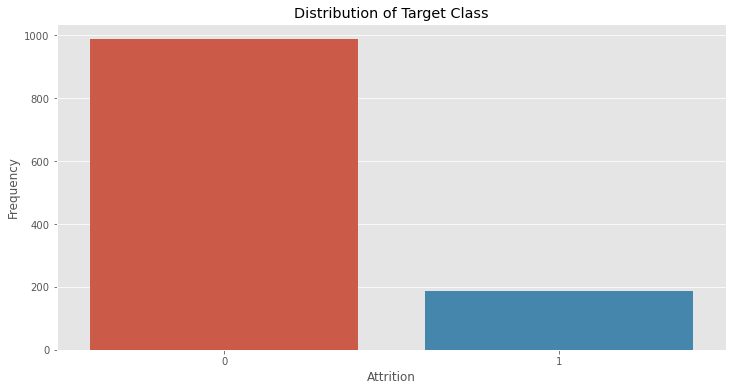

In [105]:
plt.figure(figsize=(12,6))
sns.countplot(y_train)
plt.xlabel("Attrition")
plt.ylabel("Frequency")
plt.title("Distribution of Target Class")
plt.show()

In [106]:
y_train.value_counts()

0    988
1    188
Name: Attrition, dtype: int64

In [107]:
# The target class is imbalanced, let us first use the inbuilt model hyperparameter class_weight to balance the target labels.

### Logistic Regression

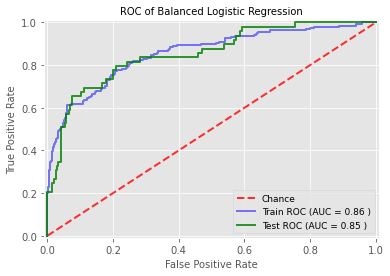

Train Data: Accuracy Score

0.7712585034013606


Train Data: Classification Report

              precision    recall  f1-score   support

           0       0.95      0.77      0.85       988
           1       0.39      0.78      0.52       188

    accuracy                           0.77      1176
   macro avg       0.67      0.78      0.69      1176
weighted avg       0.86      0.77      0.80      1176



Train Data: Kappa Cohen Score

0.3929163596168017


Train Data: Confusion Matrix

[[760 228]
 [ 41 147]]


Train Data: Jaccard Score

0.35336538461538464
Test Data: Accuracy Score

0.7891156462585034


Test Data: Classification Report

              precision    recall  f1-score   support

           0       0.95      0.79      0.86       245
           1       0.43      0.80      0.56        49

    accuracy                           0.79       294
   macro avg       0.69      0.79      0.71       294
weighted avg       0.86      0.79      0.81       294



Test Data: Kappa Cohen

,AUC ROC Train,AUC ROC Test,Acc Train,Acc Test,Prec Train,Prec Test,Rec Train,Rec Test,F1 Train,F1 Test,KCoh Train,KCoh Test,Jacc Train,Jacc Test
Balanced Logistic Regression,0.85557,0.853811,0.771259,0.789116,0.392,0.428571,0.781915,0.795918,0.522202,0.557143,0.392916,0.43465,0.353365,0.386139


In [108]:
# default parameters
logit = LogisticRegression(random_state = 0, max_iter = 1000, class_weight="balanced")

models = [('Balanced Logistic Regression', logit)]

fit_predict_plot(X_train, X_test, y_train, y_test, models) # implementing the model

In [109]:
# We see that the base model of Logistic Regression seems to be better than the best model (Hyper-Parameter Tuned Logistic Regression using Balanced class weights using 47 predictors)
# However both share the same confusion matrix, but differ slightly in other metrics
# Most significant difference that this model is train with 25 independent variables obtained from OLS.

## Hyper-Parameter Tuning: GridSearchCV

### Logistic Regression

In [110]:
# Logistic Regression: Hyper-Parameter Tuning

penalty = ['l1', 'l2', 'elasticnet']
# default is L2

C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

class_weight = ["balanced"]
# balanced mode uses the values of y to automatically adjust 
# weights inversely proportional to class frequencies in the input data

solver = ['liblinear', 'saga']
# liblinear supports L1, L2 regularization
# saga supports Elastic Net


param_grid = dict(penalty=penalty,
                  C=C,
                  class_weight=class_weight,
                  solver=solver)

In [111]:
grid_logit = GridSearchCV(estimator=logit, param_grid=param_grid, scoring='roc_auc', verbose=1, n_jobs=-1, cv=5, return_train_score=True)
grid_logit_result = grid_logit.fit(X_train, y_train)

print('Best Score: ', grid_logit_result.best_score_)
print('Best Params: ', grid_logit_result.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 225 out of 240 | elapsed:    5.8s remaining:    0.3s


Best Score:  0.8269593640953513
Best Params:  {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    6.7s finished


LogisticRegression(C=1, class_weight='balanced', max_iter=1000, random_state=0,
                   solver='liblinear')


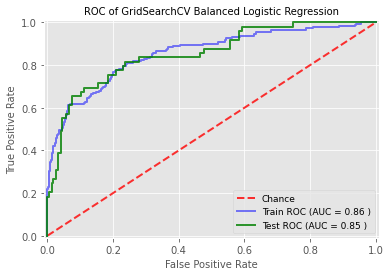

Train Data: Accuracy Score

0.7746598639455783


Train Data: Classification Report

              precision    recall  f1-score   support

           0       0.95      0.77      0.85       988
           1       0.40      0.78      0.53       188

    accuracy                           0.77      1176
   macro avg       0.67      0.78      0.69      1176
weighted avg       0.86      0.77      0.80      1176



Train Data: Kappa Cohen Score

0.3982482698961938


Train Data: Confusion Matrix

[[764 224]
 [ 41 147]]


Train Data: Jaccard Score

0.3567961165048544
Test Data: Accuracy Score

0.782312925170068


Test Data: Classification Report

              precision    recall  f1-score   support

           0       0.95      0.78      0.86       245
           1       0.42      0.78      0.54        49

    accuracy                           0.78       294
   macro avg       0.68      0.78      0.70       294
weighted avg       0.86      0.78      0.80       294



Test Data: Kappa Cohen S

,AUC ROC Train,AUC ROC Test,Acc Train,Acc Test,Prec Train,Prec Test,Rec Train,Rec Test,F1 Train,F1 Test,KCoh Train,KCoh Test,Jacc Train,Jacc Test
Balanced Logistic Regression,0.855570,0.853811,0.771259,0.789116,0.392000,0.428571,0.781915,0.795918,0.522202,0.557143,0.392916,0.434650,0.353365,0.386139
GridSearchCV Balanced Logistic Regression,0.855645,0.854227,0.774660,0.782313,0.396226,0.417582,0.781915,0.775510,0.525939,0.542857,0.398248,0.416413,0.356796,0.372549


In [112]:
print(grid_logit_result.best_estimator_)
best_logit = grid_logit_result.best_estimator_

# default parameters

models = []
models.append(('GridSearchCV Balanced Logistic Regression',best_logit))

fit_predict_plot(X_train,X_test,y_train,y_test,models)

In [113]:
# The above model takes a on FP's, FN, affecting Precision and Recall.
# The best model is the base Logistic Regression model obtained from OLS with 25 predictors and having balanced class weights.

## Bagging

#### Logistic Regression

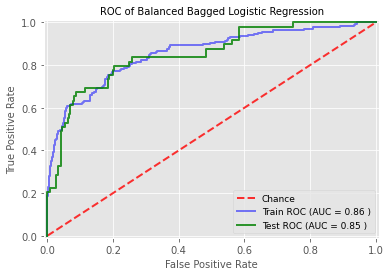

Train Data: Accuracy Score

0.7831632653061225


Train Data: Classification Report

              precision    recall  f1-score   support

           0       0.95      0.79      0.86       988
           1       0.41      0.77      0.53       188

    accuracy                           0.78      1176
   macro avg       0.68      0.78      0.70      1176
weighted avg       0.86      0.78      0.81      1176



Train Data: Kappa Cohen Score

0.40815649867374004


Train Data: Confusion Matrix

[[776 212]
 [ 43 145]]


Train Data: Jaccard Score

0.3625
Test Data: Accuracy Score

0.7959183673469388


Test Data: Classification Report

              precision    recall  f1-score   support

           0       0.95      0.80      0.87       245
           1       0.44      0.78      0.56        49

    accuracy                           0.80       294
   macro avg       0.69      0.79      0.71       294
weighted avg       0.86      0.80      0.82       294



Test Data: Kappa Cohen Score

0.43

,AUC ROC Train,AUC ROC Test,Acc Train,Acc Test,Prec Train,Prec Test,Rec Train,Rec Test,F1 Train,F1 Test,KCoh Train,KCoh Test,Jacc Train,Jacc Test
Balanced Logistic Regression,0.855570,0.853811,0.771259,0.789116,0.392000,0.428571,0.781915,0.795918,0.522202,0.557143,0.392916,0.434650,0.353365,0.386139
GridSearchCV Balanced Logistic Regression,0.855645,0.854227,0.774660,0.782313,0.396226,0.417582,0.781915,0.775510,0.525939,0.542857,0.398248,0.416413,0.356796,0.372549
Balanced Bagged Logistic Regression,0.856394,0.852561,0.783163,0.795918,0.406162,0.436782,0.771277,0.775510,0.532110,0.558824,0.408156,0.439252,0.362500,0.387755


In [114]:
bg_logit = BaggingClassifier(base_estimator=best_logit, n_estimators=50, random_state=0, oob_score=True)

# default parameters

models = []
models.append(('Balanced Bagged Logistic Regression',bg_logit))

fit_predict_plot(X_train,X_test,y_train,y_test,models)

In [115]:
# This model gives us much better accuract for class 0 but takes a hit for recall score due to higher FN's.
# So, the best model is the base Logistic Regression model obtained from OLS with 25 predictors and having balanced class weights.

### Boosting

#### Adaboost Logistic Regression

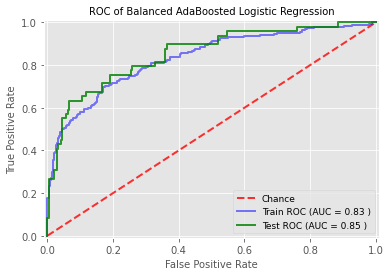

Train Data: Accuracy Score

0.7542517006802721


Train Data: Classification Report

              precision    recall  f1-score   support

           0       0.94      0.76      0.84       988
           1       0.37      0.73      0.49       188

    accuracy                           0.75      1176
   macro avg       0.65      0.75      0.66      1176
weighted avg       0.85      0.75      0.78      1176



Train Data: Kappa Cohen Score

0.3497765397330721


Train Data: Confusion Matrix

[[749 239]
 [ 50 138]]


Train Data: Jaccard Score

0.3231850117096019
Test Data: Accuracy Score

0.7619047619047619


Test Data: Classification Report

              precision    recall  f1-score   support

           0       0.94      0.76      0.84       245
           1       0.39      0.76      0.51        49

    accuracy                           0.76       294
   macro avg       0.66      0.76      0.68       294
weighted avg       0.85      0.76      0.79       294



Test Data: Kappa Cohen 

,AUC ROC Train,AUC ROC Test,Acc Train,Acc Test,Prec Train,Prec Test,Rec Train,Rec Test,F1 Train,F1 Test,KCoh Train,KCoh Test,Jacc Train,Jacc Test
Balanced Logistic Regression,0.855570,0.853811,0.771259,0.789116,0.392000,0.428571,0.781915,0.795918,0.522202,0.557143,0.392916,0.434650,0.353365,0.386139
GridSearchCV Balanced Logistic Regression,0.855645,0.854227,0.774660,0.782313,0.396226,0.417582,0.781915,0.775510,0.525939,0.542857,0.398248,0.416413,0.356796,0.372549
Balanced Bagged Logistic Regression,0.856394,0.852561,0.783163,0.795918,0.406162,0.436782,0.771277,0.775510,0.532110,0.558824,0.408156,0.439252,0.362500,0.387755
Balanced AdaBoosted Logistic Regression,0.832947,0.852728,0.754252,0.761905,0.366048,0.389474,0.734043,0.755102,0.488496,0.513889,0.349777,0.376855,0.323185,0.345794


In [116]:
adb_logit = AdaBoostClassifier(base_estimator=best_logit, n_estimators= 50, random_state=0)

# default parameters

models = []
models.append(('Balanced AdaBoosted Logistic Regression',adb_logit))

fit_predict_plot(X_train,X_test,y_train,y_test,models)

In [117]:
# this model fares poorly for FP but also for FN which is not acceptable.
# So, the best model is the base Logistic Regression model obtained from OLS with 25 predictors and having balanced class weights.

## Class Balancing using SMOTE

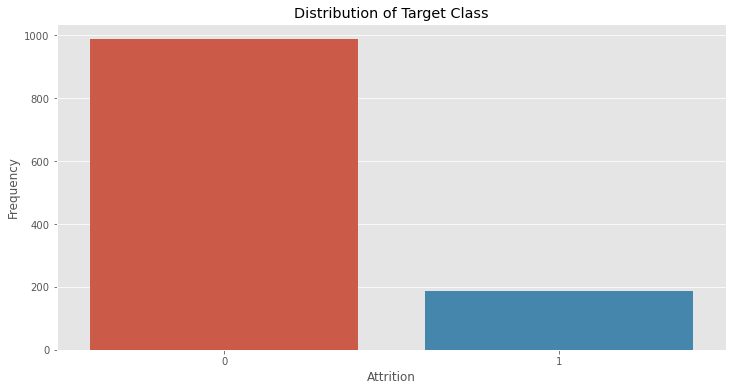

In [118]:
plt.figure(figsize=(12,6))
sns.countplot(y_train)
plt.xlabel("Attrition")
plt.ylabel("Frequency")
plt.title("Distribution of Target Class")
plt.show()

In [119]:
y_train.value_counts()

0    988
1    188
Name: Attrition, dtype: int64

In [120]:
from imblearn.over_sampling import SMOTE

In [121]:
smt = SMOTE()
X_train_smt, y_train_smt = smt.fit_sample(X_train, y_train)

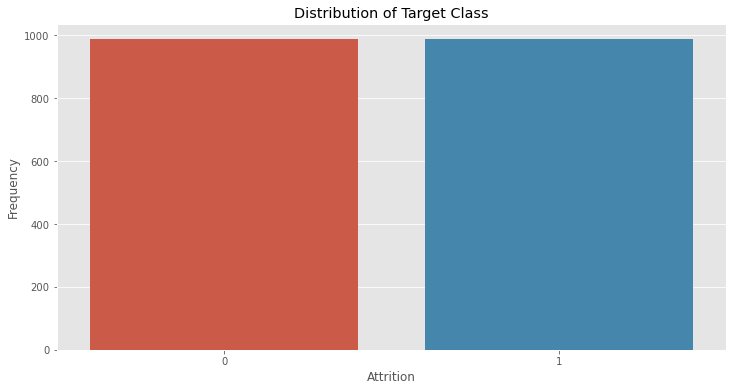

In [122]:
plt.figure(figsize=(12,6))
sns.countplot(y_train_smt)
plt.xlabel("Attrition")
plt.ylabel("Frequency")
plt.title("Distribution of Target Class")
plt.show()

In [123]:
# We have balanced the target labels using SMOTE, let us 

### Logistic Regression

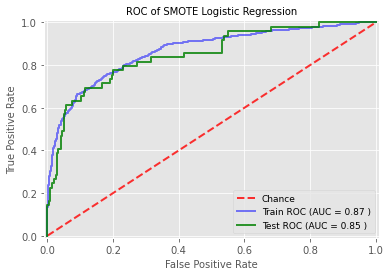

Train Data: Accuracy Score

0.7793522267206477


Train Data: Classification Report

              precision    recall  f1-score   support

           0       0.78      0.77      0.78       988
           1       0.77      0.79      0.78       988

    accuracy                           0.78      1976
   macro avg       0.78      0.78      0.78      1976
weighted avg       0.78      0.78      0.78      1976



Train Data: Kappa Cohen Score

0.5587044534412955


Train Data: Confusion Matrix

[[761 227]
 [209 779]]


Train Data: Jaccard Score

0.6411522633744856
Test Data: Accuracy Score

0.7857142857142857


Test Data: Classification Report

              precision    recall  f1-score   support

           0       0.95      0.79      0.86       245
           1       0.42      0.78      0.55        49

    accuracy                           0.79       294
   macro avg       0.68      0.78      0.70       294
weighted avg       0.86      0.79      0.81       294



Test Data: Kappa Cohen 

,AUC ROC Train,AUC ROC Test,Acc Train,Acc Test,Prec Train,Prec Test,Rec Train,Rec Test,F1 Train,F1 Test,KCoh Train,KCoh Test,Jacc Train,Jacc Test
Balanced Logistic Regression,0.855570,0.853811,0.771259,0.789116,0.392000,0.428571,0.781915,0.795918,0.522202,0.557143,0.392916,0.434650,0.353365,0.386139
GridSearchCV Balanced Logistic Regression,0.855645,0.854227,0.774660,0.782313,0.396226,0.417582,0.781915,0.775510,0.525939,0.542857,0.398248,0.416413,0.356796,0.372549
Balanced Bagged Logistic Regression,0.856394,0.852561,0.783163,0.795918,0.406162,0.436782,0.771277,0.775510,0.532110,0.558824,0.408156,0.439252,0.362500,0.387755
Balanced AdaBoosted Logistic Regression,0.832947,0.852728,0.754252,0.761905,0.366048,0.389474,0.734043,0.755102,0.488496,0.513889,0.349777,0.376855,0.323185,0.345794
SMOTE Logistic Regression,0.866745,0.850729,0.779352,0.785714,0.774354,0.422222,0.788462,0.775510,0.781344,0.546763,0.558704,0.422018,0.641152,0.376238


In [124]:
# default parameters
logit_smote = LogisticRegression(random_state = 0, max_iter = 1000) 

models = [('SMOTE Logistic Regression', logit_smote)]

fit_predict_plot(X_train_smt, X_test, y_train_smt, y_test, models) # implementing the model

In [125]:
# The best model is the base Logistic Regression model obtained from OLS with 25 predictors and having balanced class weights.

## Hyper-Parameter Tuning: GridSearchCV

### Logistic Regression

In [126]:
# Since our top performing models are SVM and Logistic Regression using SMOTE, we will try to improve the results using Hyper-Parameter tuning.

In [127]:
# Logistic Regression: Hyper-Parameter Tuning

penalty = ['l1', 'l2', 'elasticnet']
# default is L2

C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

class_weight = ["balanced"]
# balanced mode uses the values of y to automatically adjust 
# weights inversely proportional to class frequencies in the input data

solver = ['liblinear', 'saga']
# liblinear supports L1, L2 regularization
# saga supports Elastic Net


param_grid = dict(penalty=penalty,
                  C=C,
                  class_weight=class_weight,
                  solver=solver)

In [128]:
grid_logit_smote = GridSearchCV(estimator=logit_smote, param_grid=param_grid, scoring='roc_auc', verbose=1, n_jobs=-1, cv=5, return_train_score=True)
grid_logit_result_smote = grid_logit.fit(X_train_smt, y_train_smt)

print('Best Score: ', grid_logit_result_smote.best_score_)
print('Best Params: ', grid_logit_result_smote.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    0.1s


Best Score:  0.8630214362255586
Best Params:  {'C': 1000, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    5.1s finished


LogisticRegression(C=1000, class_weight='balanced', max_iter=1000,
                   random_state=0, solver='liblinear')


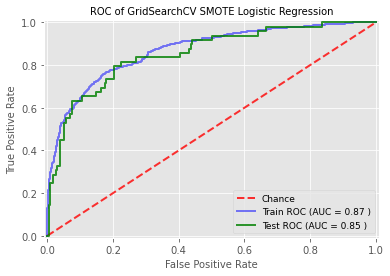

Train Data: Accuracy Score

0.7854251012145749


Train Data: Classification Report

              precision    recall  f1-score   support

           0       0.79      0.78      0.78       988
           1       0.78      0.79      0.79       988

    accuracy                           0.79      1976
   macro avg       0.79      0.79      0.79      1976
weighted avg       0.79      0.79      0.79      1976



Train Data: Kappa Cohen Score

0.5708502024291497


Train Data: Confusion Matrix

[[769 219]
 [205 783]]


Train Data: Jaccard Score

0.6487158243579122
Test Data: Accuracy Score

0.7959183673469388


Test Data: Classification Report

              precision    recall  f1-score   support

           0       0.95      0.80      0.87       245
           1       0.44      0.80      0.57        49

    accuracy                           0.80       294
   macro avg       0.69      0.80      0.72       294
weighted avg       0.87      0.80      0.82       294



Test Data: Kappa Cohen 

,AUC ROC Train,AUC ROC Test,Acc Train,Acc Test,Prec Train,Prec Test,Rec Train,Rec Test,F1 Train,F1 Test,KCoh Train,KCoh Test,Jacc Train,Jacc Test
Balanced Logistic Regression,0.855570,0.853811,0.771259,0.789116,0.392000,0.428571,0.781915,0.795918,0.522202,0.557143,0.392916,0.434650,0.353365,0.386139
GridSearchCV Balanced Logistic Regression,0.855645,0.854227,0.774660,0.782313,0.396226,0.417582,0.781915,0.775510,0.525939,0.542857,0.398248,0.416413,0.356796,0.372549
Balanced Bagged Logistic Regression,0.856394,0.852561,0.783163,0.795918,0.406162,0.436782,0.771277,0.775510,0.532110,0.558824,0.408156,0.439252,0.362500,0.387755
Balanced AdaBoosted Logistic Regression,0.832947,0.852728,0.754252,0.761905,0.366048,0.389474,0.734043,0.755102,0.488496,0.513889,0.349777,0.376855,0.323185,0.345794
SMOTE Logistic Regression,0.866745,0.850729,0.779352,0.785714,0.774354,0.422222,0.788462,0.775510,0.781344,0.546763,0.558704,0.422018,0.641152,0.376238
GridSearchCV SMOTE Logistic Regression,0.869447,0.853978,0.785425,0.795918,0.781437,0.438202,0.792510,0.795918,0.786935,0.565217,0.570850,0.446154,0.648716,0.393939


In [129]:
print(grid_logit_result_smote.best_estimator_)
best_logit_smote = grid_logit_result_smote.best_estimator_

# default parameters

models = []
models.append(('GridSearchCV SMOTE Logistic Regression',best_logit_smote))

fit_predict_plot(X_train_smt,X_test,y_train_smt,y_test,models)

In [130]:
# There is an increased number of FP's
# The best model is the base Logistic Regression model obtained from OLS with 25 predictors and having balanced class weights.

### Bagging

In [131]:
# We will use the SMOTE base models, for Ensemble Techniques

#### Logistic Regression

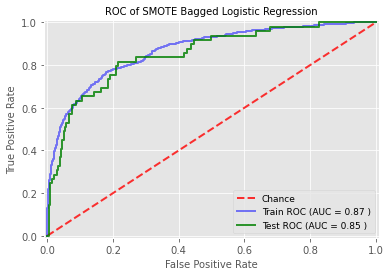

Train Data: Accuracy Score

0.7828947368421053


Train Data: Classification Report

              precision    recall  f1-score   support

           0       0.79      0.78      0.78       988
           1       0.78      0.79      0.78       988

    accuracy                           0.78      1976
   macro avg       0.78      0.78      0.78      1976
weighted avg       0.78      0.78      0.78      1976



Train Data: Kappa Cohen Score

0.5657894736842105


Train Data: Confusion Matrix

[[768 220]
 [209 779]]


Train Data: Jaccard Score

0.6448675496688742
Test Data: Accuracy Score

0.7891156462585034


Test Data: Classification Report

              precision    recall  f1-score   support

           0       0.95      0.79      0.86       245
           1       0.43      0.78      0.55        49

    accuracy                           0.79       294
   macro avg       0.69      0.78      0.71       294
weighted avg       0.86      0.79      0.81       294



Test Data: Kappa Cohen 

,AUC ROC Train,AUC ROC Test,Acc Train,Acc Test,Prec Train,Prec Test,Rec Train,Rec Test,F1 Train,F1 Test,KCoh Train,KCoh Test,Jacc Train,Jacc Test
Balanced Logistic Regression,0.855570,0.853811,0.771259,0.789116,0.392000,0.428571,0.781915,0.795918,0.522202,0.557143,0.392916,0.434650,0.353365,0.386139
GridSearchCV Balanced Logistic Regression,0.855645,0.854227,0.774660,0.782313,0.396226,0.417582,0.781915,0.775510,0.525939,0.542857,0.398248,0.416413,0.356796,0.372549
Balanced Bagged Logistic Regression,0.856394,0.852561,0.783163,0.795918,0.406162,0.436782,0.771277,0.775510,0.532110,0.558824,0.408156,0.439252,0.362500,0.387755
Balanced AdaBoosted Logistic Regression,0.832947,0.852728,0.754252,0.761905,0.366048,0.389474,0.734043,0.755102,0.488496,0.513889,0.349777,0.376855,0.323185,0.345794
SMOTE Logistic Regression,0.866745,0.850729,0.779352,0.785714,0.774354,0.422222,0.788462,0.775510,0.781344,0.546763,0.558704,0.422018,0.641152,0.376238
GridSearchCV SMOTE Logistic Regression,0.869447,0.853978,0.785425,0.795918,0.781437,0.438202,0.792510,0.795918,0.786935,0.565217,0.570850,0.446154,0.648716,0.393939
SMOTE Bagged Logistic Regression,0.869814,0.852728,0.782895,0.789116,0.779780,0.426966,0.788462,0.775510,0.784097,0.550725,0.565789,0.427692,0.644868,0.380000


In [132]:
bg_logit_smote = BaggingClassifier(base_estimator=best_logit_smote, n_estimators=50, random_state=0, oob_score=True)

# default parameters

models = []
models.append(('SMOTE Bagged Logistic Regression',bg_logit_smote))

fit_predict_plot(X_train_smt,X_test,y_train_smt,y_test,models)

In [133]:
# Higher number of FP's

### Boosting

#### Adaboost Logistic Regression

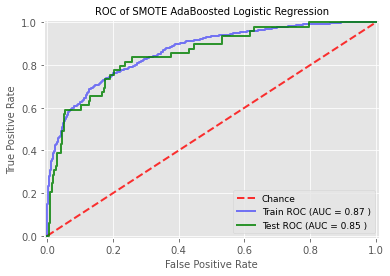

Train Data: Accuracy Score

0.7692307692307693


Train Data: Classification Report

              precision    recall  f1-score   support

           0       0.78      0.75      0.77       988
           1       0.76      0.79      0.77       988

    accuracy                           0.77      1976
   macro avg       0.77      0.77      0.77      1976
weighted avg       0.77      0.77      0.77      1976



Train Data: Kappa Cohen Score

0.5384615384615384


Train Data: Confusion Matrix

[[744 244]
 [212 776]]


Train Data: Jaccard Score

0.6298701298701299
Test Data: Accuracy Score

0.782312925170068


Test Data: Classification Report

              precision    recall  f1-score   support

           0       0.95      0.78      0.86       245
           1       0.42      0.80      0.55        49

    accuracy                           0.78       294
   macro avg       0.68      0.79      0.70       294
weighted avg       0.86      0.78      0.81       294



Test Data: Kappa Cohen S

,AUC ROC Train,AUC ROC Test,Acc Train,Acc Test,Prec Train,Prec Test,Rec Train,Rec Test,F1 Train,F1 Test,KCoh Train,KCoh Test,Jacc Train,Jacc Test
Balanced Logistic Regression,0.855570,0.853811,0.771259,0.789116,0.392000,0.428571,0.781915,0.795918,0.522202,0.557143,0.392916,0.434650,0.353365,0.386139
GridSearchCV Balanced Logistic Regression,0.855645,0.854227,0.774660,0.782313,0.396226,0.417582,0.781915,0.775510,0.525939,0.542857,0.398248,0.416413,0.356796,0.372549
Balanced Bagged Logistic Regression,0.856394,0.852561,0.783163,0.795918,0.406162,0.436782,0.771277,0.775510,0.532110,0.558824,0.408156,0.439252,0.362500,0.387755
Balanced AdaBoosted Logistic Regression,0.832947,0.852728,0.754252,0.761905,0.366048,0.389474,0.734043,0.755102,0.488496,0.513889,0.349777,0.376855,0.323185,0.345794
SMOTE Logistic Regression,0.866745,0.850729,0.779352,0.785714,0.774354,0.422222,0.788462,0.775510,0.781344,0.546763,0.558704,0.422018,0.641152,0.376238
GridSearchCV SMOTE Logistic Regression,0.869447,0.853978,0.785425,0.795918,0.781437,0.438202,0.792510,0.795918,0.786935,0.565217,0.570850,0.446154,0.648716,0.393939
SMOTE Bagged Logistic Regression,0.869814,0.852728,0.782895,0.789116,0.779780,0.426966,0.788462,0.775510,0.784097,0.550725,0.565789,0.427692,0.644868,0.380000
SMOTE AdaBoosted Logistic Regression,0.865327,0.852312,0.769231,0.782313,0.760784,0.419355,0.785425,0.795918,0.772908,0.549296,0.538462,0.423423,0.629870,0.378641


In [134]:
adb_logit_smote = AdaBoostClassifier(base_estimator=best_logit_smote, n_estimators= 50, random_state=0)

# default parameters

models = []
models.append(('SMOTE AdaBoosted Logistic Regression',adb_logit_smote))

fit_predict_plot(X_train_smt,X_test,y_train_smt,y_test,models)

In [135]:
# The best model is the base Logistic Regression model obtained from OLS with 25 predictors and having balanced class weights.

In [136]:
dfObj

,AUC ROC Train,AUC ROC Test,Acc Train,Acc Test,Prec Train,Prec Test,Rec Train,Rec Test,F1 Train,F1 Test,KCoh Train,KCoh Test,Jacc Train,Jacc Test
Balanced Logistic Regression,0.855570,0.853811,0.771259,0.789116,0.392000,0.428571,0.781915,0.795918,0.522202,0.557143,0.392916,0.434650,0.353365,0.386139
GridSearchCV Balanced Logistic Regression,0.855645,0.854227,0.774660,0.782313,0.396226,0.417582,0.781915,0.775510,0.525939,0.542857,0.398248,0.416413,0.356796,0.372549
Balanced Bagged Logistic Regression,0.856394,0.852561,0.783163,0.795918,0.406162,0.436782,0.771277,0.775510,0.532110,0.558824,0.408156,0.439252,0.362500,0.387755
Balanced AdaBoosted Logistic Regression,0.832947,0.852728,0.754252,0.761905,0.366048,0.389474,0.734043,0.755102,0.488496,0.513889,0.349777,0.376855,0.323185,0.345794
SMOTE Logistic Regression,0.866745,0.850729,0.779352,0.785714,0.774354,0.422222,0.788462,0.775510,0.781344,0.546763,0.558704,0.422018,0.641152,0.376238
GridSearchCV SMOTE Logistic Regression,0.869447,0.853978,0.785425,0.795918,0.781437,0.438202,0.792510,0.795918,0.786935,0.565217,0.570850,0.446154,0.648716,0.393939
SMOTE Bagged Logistic Regression,0.869814,0.852728,0.782895,0.789116,0.779780,0.426966,0.788462,0.775510,0.784097,0.550725,0.565789,0.427692,0.644868,0.380000
SMOTE AdaBoosted Logistic Regression,0.865327,0.852312,0.769231,0.782313,0.760784,0.419355,0.785425,0.795918,0.772908,0.549296,0.538462,0.423423,0.629870,0.378641


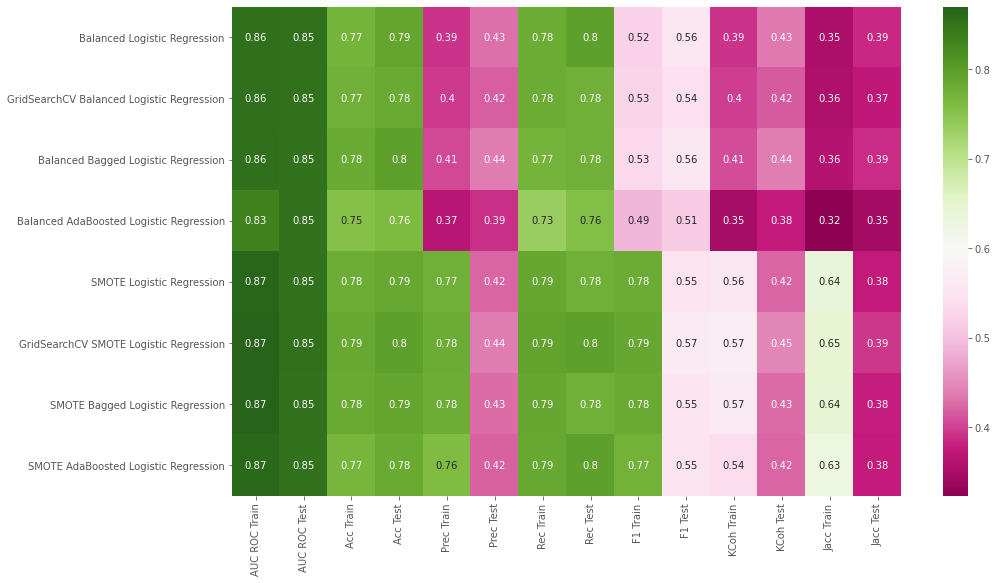

In [137]:
plt.figure(figsize=(15,9))
sns.heatmap(dfObj, annot=True, cmap="PiYG")
plt.show()

# Feature Engineering

## Recursive Feature Elimination (RFE)

In [138]:
X.shape

(1470, 25)

In [139]:
from sklearn.feature_selection import RFE

# best_logit_rfe = AdaBoostClassifier(base_estimator=best_logit, n_estimators= 50, random_state=0)
# best_logit_rfe.fit(X,y)
#stop the search when only the last feature is left
rfe = RFE(best_logit, verbose =3 )
rfe.fit(X,y)

Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.


RFE(estimator=LogisticRegression(C=1, class_weight='balanced', max_iter=1000,
                                 random_state=0, solver='liblinear'),
    verbose=3)

In [140]:
print("Overall Accuracy using RFE: ", rfe.score(X,y))

Overall Accuracy using RFE:  0.7517006802721088


In [141]:
print("Number of Features: ", rfe.n_features_)

Number of Features:  12


In [142]:
rfe.support_

array([False,  True, False,  True, False,  True,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True])

In [143]:
rfe.ranking_

array([14,  1, 13,  1,  2,  1,  1, 10,  1,  5, 12,  6,  4, 11,  7,  8,  9,
        3,  1,  1,  1,  1,  1,  1,  1])

In [144]:
print("Selected Features: ")
colcheck = pd.Series(rfe.support_, index = list(X.columns))
colcheck[colcheck == True].index

Selected Features: 


Index(['BusinessTravel', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobSatisfaction', 'OverTime', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Medical',
       'MaritalStatus_Single', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Sales Representative'],
      dtype='object')

In [145]:
print("Features sorted by their rank:")
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), X.columns)))

Features sorted by their rank:
[(1, 'BusinessTravel'), (1, 'Department_Sales'), (1, 'EducationField_Life Sciences'), (1, 'EducationField_Medical'), (1, 'EnvironmentSatisfaction'), (1, 'JobInvolvement'), (1, 'JobRole_Human Resources'), (1, 'JobRole_Laboratory Technician'), (1, 'JobRole_Sales Representative'), (1, 'JobSatisfaction'), (1, 'MaritalStatus_Single'), (1, 'OverTime'), (2, 'Gender'), (3, 'Department_Research & Development'), (4, 'WorkLifeBalance'), (5, 'RelationshipSatisfaction'), (6, 'TrainingTimesLastYear'), (7, 'YearsInCurrentRole'), (8, 'YearsSinceLastPromotion'), (9, 'YearsWithCurrManager'), (10, 'NumCompaniesWorked'), (11, 'YearsAtCompany'), (12, 'TotalWorkingYears'), (13, 'DistanceFromHome'), (14, 'Age')]


In [146]:
# RFE has selected the top 23 features to be used for the model.

In [147]:
X = df1[['BusinessTravel', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobSatisfaction', 'OverTime', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Medical',
       'MaritalStatus_Single', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Sales Representative']]
y = df1['Attrition']

In [148]:
# RFE has selected the top 23 features to be used for the model.

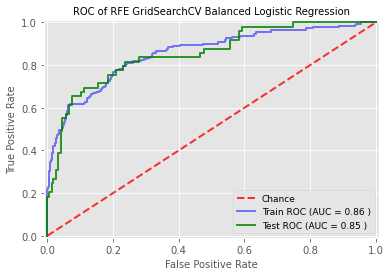

Train Data: Accuracy Score

0.7746598639455783


Train Data: Classification Report

              precision    recall  f1-score   support

           0       0.95      0.77      0.85       988
           1       0.40      0.78      0.53       188

    accuracy                           0.77      1176
   macro avg       0.67      0.78      0.69      1176
weighted avg       0.86      0.77      0.80      1176



Train Data: Kappa Cohen Score

0.3982482698961938


Train Data: Confusion Matrix

[[764 224]
 [ 41 147]]


Train Data: Jaccard Score

0.3567961165048544
Test Data: Accuracy Score

0.782312925170068


Test Data: Classification Report

              precision    recall  f1-score   support

           0       0.95      0.78      0.86       245
           1       0.42      0.78      0.54        49

    accuracy                           0.78       294
   macro avg       0.68      0.78      0.70       294
weighted avg       0.86      0.78      0.80       294



Test Data: Kappa Cohen S

,AUC ROC Train,AUC ROC Test,Acc Train,Acc Test,Prec Train,Prec Test,Rec Train,Rec Test,F1 Train,F1 Test,KCoh Train,KCoh Test,Jacc Train,Jacc Test
Balanced Logistic Regression,0.855570,0.853811,0.771259,0.789116,0.392000,0.428571,0.781915,0.795918,0.522202,0.557143,0.392916,0.434650,0.353365,0.386139
GridSearchCV Balanced Logistic Regression,0.855645,0.854227,0.774660,0.782313,0.396226,0.417582,0.781915,0.775510,0.525939,0.542857,0.398248,0.416413,0.356796,0.372549
Balanced Bagged Logistic Regression,0.856394,0.852561,0.783163,0.795918,0.406162,0.436782,0.771277,0.775510,0.532110,0.558824,0.408156,0.439252,0.362500,0.387755
Balanced AdaBoosted Logistic Regression,0.832947,0.852728,0.754252,0.761905,0.366048,0.389474,0.734043,0.755102,0.488496,0.513889,0.349777,0.376855,0.323185,0.345794
SMOTE Logistic Regression,0.866745,0.850729,0.779352,0.785714,0.774354,0.422222,0.788462,0.775510,0.781344,0.546763,0.558704,0.422018,0.641152,0.376238
GridSearchCV SMOTE Logistic Regression,0.869447,0.853978,0.785425,0.795918,0.781437,0.438202,0.792510,0.795918,0.786935,0.565217,0.570850,0.446154,0.648716,0.393939
SMOTE Bagged Logistic Regression,0.869814,0.852728,0.782895,0.789116,0.779780,0.426966,0.788462,0.775510,0.784097,0.550725,0.565789,0.427692,0.644868,0.380000
SMOTE AdaBoosted Logistic Regression,0.865327,0.852312,0.769231,0.782313,0.760784,0.419355,0.785425,0.795918,0.772908,0.549296,0.538462,0.423423,0.629870,0.378641
RFE GridSearchCV Balanced Logistic Regression,0.855645,0.854227,0.774660,0.782313,0.396226,0.417582,0.781915,0.775510,0.525939,0.542857,0.398248,0.416413,0.356796,0.372549


In [149]:
# rfe_adb_logit_smote = AdaBoostClassifier(base_estimator=logit_smote, n_estimators= 50, random_state=0)

# default parameters

models = []
models.append(('RFE GridSearchCV Balanced Logistic Regression',best_logit))

fit_predict_plot(X_train,X_test,y_train,y_test,models)

In [150]:
dfObj

,AUC ROC Train,AUC ROC Test,Acc Train,Acc Test,Prec Train,Prec Test,Rec Train,Rec Test,F1 Train,F1 Test,KCoh Train,KCoh Test,Jacc Train,Jacc Test
Balanced Logistic Regression,0.855570,0.853811,0.771259,0.789116,0.392000,0.428571,0.781915,0.795918,0.522202,0.557143,0.392916,0.434650,0.353365,0.386139
GridSearchCV Balanced Logistic Regression,0.855645,0.854227,0.774660,0.782313,0.396226,0.417582,0.781915,0.775510,0.525939,0.542857,0.398248,0.416413,0.356796,0.372549
Balanced Bagged Logistic Regression,0.856394,0.852561,0.783163,0.795918,0.406162,0.436782,0.771277,0.775510,0.532110,0.558824,0.408156,0.439252,0.362500,0.387755
Balanced AdaBoosted Logistic Regression,0.832947,0.852728,0.754252,0.761905,0.366048,0.389474,0.734043,0.755102,0.488496,0.513889,0.349777,0.376855,0.323185,0.345794
SMOTE Logistic Regression,0.866745,0.850729,0.779352,0.785714,0.774354,0.422222,0.788462,0.775510,0.781344,0.546763,0.558704,0.422018,0.641152,0.376238
GridSearchCV SMOTE Logistic Regression,0.869447,0.853978,0.785425,0.795918,0.781437,0.438202,0.792510,0.795918,0.786935,0.565217,0.570850,0.446154,0.648716,0.393939
SMOTE Bagged Logistic Regression,0.869814,0.852728,0.782895,0.789116,0.779780,0.426966,0.788462,0.775510,0.784097,0.550725,0.565789,0.427692,0.644868,0.380000
SMOTE AdaBoosted Logistic Regression,0.865327,0.852312,0.769231,0.782313,0.760784,0.419355,0.785425,0.795918,0.772908,0.549296,0.538462,0.423423,0.629870,0.378641
RFE GridSearchCV Balanced Logistic Regression,0.855645,0.854227,0.774660,0.782313,0.396226,0.417582,0.781915,0.775510,0.525939,0.542857,0.398248,0.416413,0.356796,0.372549


In [151]:
dfObj.shape

(9, 14)

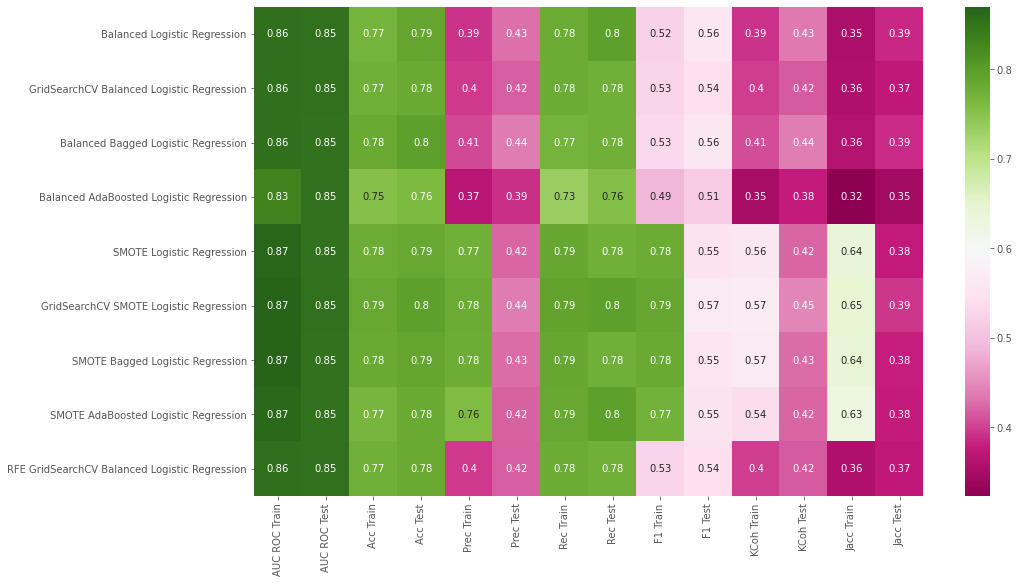

In [152]:
plt.figure(figsize=(15,9))
sns.heatmap(dfObj, annot=True, cmap="PiYG")
plt.show()

In [153]:
# The best model is the base Logistic Regression model obtained from OLS with 25 predictors and having balanced class weights.
# This model gives us the highest TPR (sensitivity),lowest FPR (1-specificity), best F1 score, confusion matrix, etc and seems to be the most favourable choice.
# Confusion matrix: [[193  52]
#                   [ 10  39]]
# TPR = 39/49  = 0.79
# FPR = 52/245 = 0.22
# F1 Score = 0.557
# AUC-ROC Accuracy = 0.853811
# Accuracy = 0.789
# Precision = 0.428
# Recall = 0.796
# The most significant predictors (25) are:
# 'Age', 'BusinessTravel', 'DistanceFromHome', 'EnvironmentSatisfaction',
# 'Gender', 'JobInvolvement', 'JobSatisfaction', 'NumCompaniesWorked',
# 'OverTime', 'RelationshipSatisfaction', 'TotalWorkingYears',
# 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
# 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
# 'Department_Research & Development', 'Department_Sales',
# 'EducationField_Life Sciences', 'EducationField_Medical',
# 'MaritalStatus_Single', 'JobRole_Human Resources',
# 'JobRole_Laboratory Technician', 'JobRole_Sales Representative'